## Importing & Loading Libraries

In [1]:
# In case it yfinance module is not installed
# !pip install yfinance

import yfinance as yf

from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Ref: https://towardsdatascience.com/8-commonly-used-pandas-display-options-you-should-know-a832365efa95
# ADJUST COLUMN WIDTH IN PANDAS TO SHOW ALL TEXT
# (FOR MODEL PERFORMANCE DISPLAY LATER)

pd.set_option('display.max_colwidth', None)

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats

%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import yfinance as yf

from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
# Ref: https://towardsdatascience.com/8-commonly-used-pandas-display-options-you-should-know-a832365efa95
# ADJUST COLUMN WIDTH IN PANDAS TO SHOW ALL TEXT
# (FOR MODEL PERFORMANCE DISPLAY LATER)

pd.set_option('display.max_colwidth', None)

In [8]:
# PRE-SET PATH TO images FOLDER TO SAVE PLOTS LATER
directory_to_img = os.path.join('..', '..', 'images')

In [9]:
# SET SEED FOR REPRODUCIBILITY
seed = 2022

In [10]:
# SELECT START AND END DATE
start = datetime(2017, 11, 9)
end = datetime(2022, 7, 13)


tckr = 'XMR-USD' # Using it for Monero

ticker = yf.Ticker(tckr)
df = ticker.history(start=start, 
                    end=end, 
                    interval="1d")

In [342]:
# Checking the data
n=df.head(10)

import pandas as pd
import dataframe_image as dfi

dfi.export(n, 'table_c.png')

objc[23810]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5d2b5ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/104.0.5112.79/Libraries/libGLESv2.dylib (0x10a361590). One of the two will be used. Which one is undefined.
[0818/214611.559437:INFO:headless_shell.cc(660)] Written to file /var/folders/xx/h5xnb_fn2hj7z297mdw669vw0000gn/T/tmpugexxpon/temp.png.


In [12]:
df.tail(10)

Open        High         Low       Close     Volume  \
Date                                                                    
2022-07-03  116.008270  117.412521  114.703957  116.368416   60471638   
2022-07-04  116.370834  124.133194  115.049660  124.015518   72535864   
2022-07-05  123.976990  124.992874  118.752716  122.339622   89872229   
2022-07-06  122.363937  126.687569  121.200478  125.494568  107952769   
2022-07-07  125.533325  131.388611  125.255814  130.436829   87061683   
2022-07-08  130.469330  133.547897  125.617218  125.617218   81208946   
2022-07-09  125.585106  128.924927  125.246979  127.173157   60121922   
2022-07-10  127.191696  129.157379  120.876244  129.157379   98369503   
2022-07-11  129.129349  132.657150  125.744003  127.019791  163613480   
2022-07-12  127.022034  129.183105  123.136009  123.185577  106710927   

            Dividends  Stock Splits  
Date                                 
2022-07-03          0             0  
2022-07-04          0             0  
2022-07-05          0             0  
2022-07-06          0             0  
2022-07-07          0             0  
2022-07-08          0             0  
2022-07-09          0             0  
2022-07-10          0             0  
2022-07-11          0             0  
2022-07-12          0             0

When you talk about volatility, it measures the dispersions over the said peorod of time. The more the extent of dispersions, the higher the volatility. It is usually associated with higher risk but greater returns due to the risk induced.

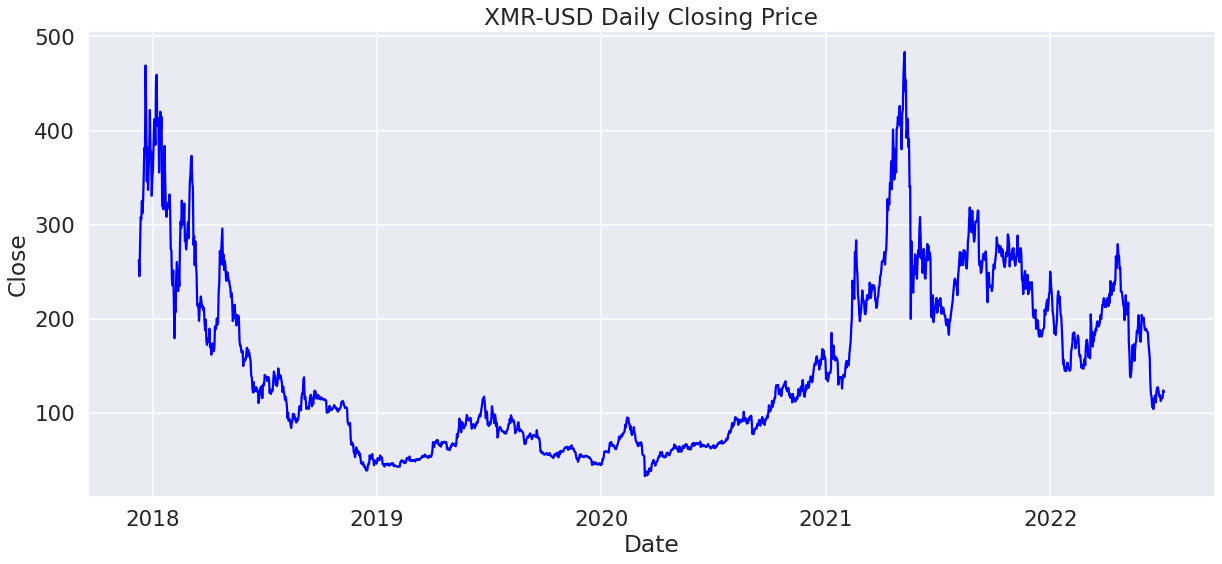

In [330]:
# CHANGE CONTEXT TO poster TO INCREASE FONT SIZES
sns.set_context("talk", font_scale=1.3)

# PLOT OUT ETH-USE'S CLOSING PRICES SINCE 2015
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,8))
    sns.lineplot(x=df.index, y=df.Close, color='blue')
    ax.set_title('XMR-USD Daily Closing Price')    

# plt.tight_layout()
plt.savefig("close.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=50)

In [14]:
# CALCULATE PRICE RETURNS AS DAILY PERCENTAGE CHANGE USING pct_change()
df['returns'] = 100 * df.Close.pct_change().dropna()

For most practical purposes, it is preferable to use log returns than returns as it eliminates most non-stationary properties of the time-series data, thus making it stable. They're also additive across time

In [15]:
# CALCULATE LOG RETURNS BASED ON ABOVE FORMULA
df['log_returns'] = np.log(df.Close/df.Close.shift(1))

In [16]:
# DROPPING THE 1ST ROW OF DATA 
# BECAUSE I SHIFTED IT FORWARD TO CALCULATE RETURNS/LOG RETURNS
df.dropna(inplace=True)

In [17]:
# Checking missing values
df.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
returns         0
log_returns     0
dtype: int64

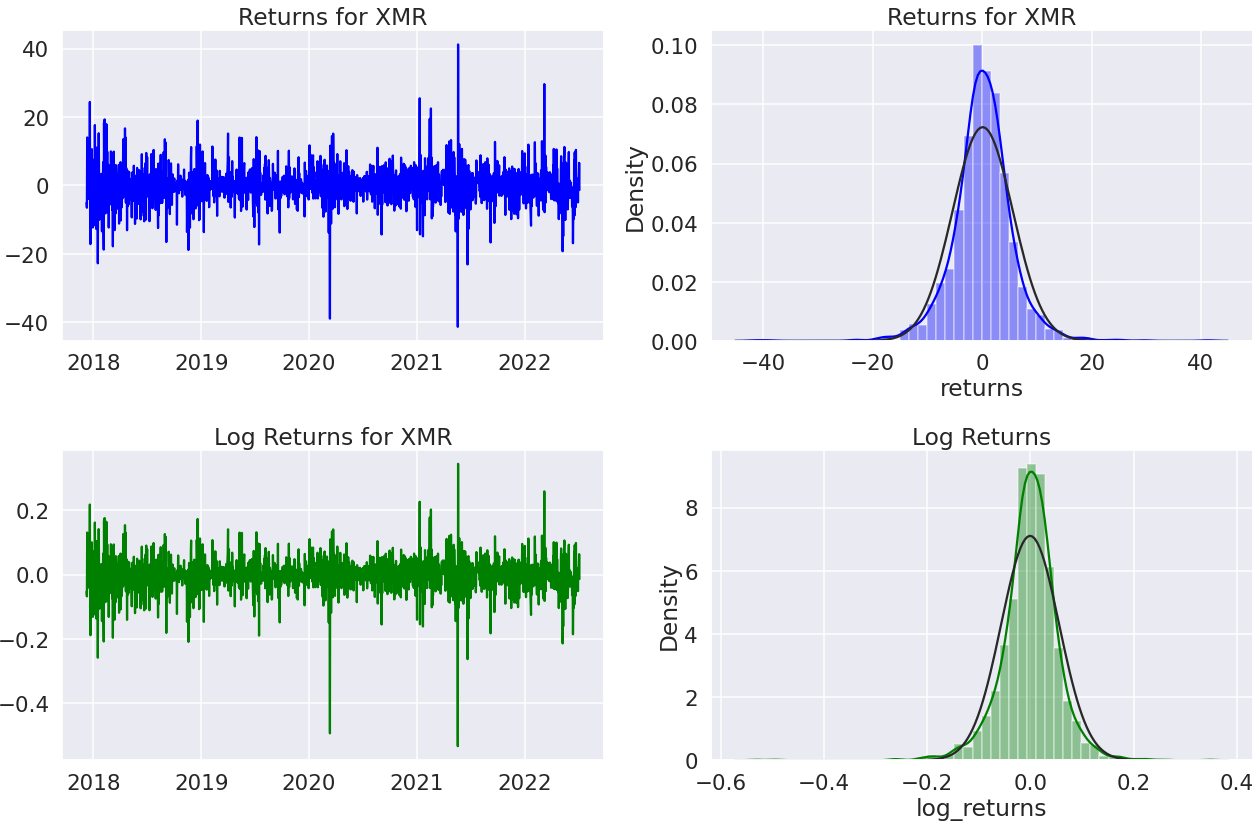

In [331]:
# PLOT DISTRIBUTION PLOTS OF RETURNS & LOG RETURNS
# AND VISUALLY COMPARE THEM WITH THE STANDARD NORMAL DISTRIBUTION
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(df.returns, color='blue')
    axes[0][0].set_title('Returns for XMR')

    sns.distplot(df.returns, norm_hist=True, fit=stats.norm, color='blue',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Returns for XMR')

    axes[1][0].plot(df.log_returns, color='green')
    axes[1][0].set_title('Log Returns for XMR')

    sns.distplot(df.log_returns, norm_hist=True, fit=stats.norm, color='green',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Log Returns')
    plt.tight_layout()
    plt.savefig("returns_logreturns.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=50)
    fig.show();

The returns and the log returns show almost 
- symmetrical distribution
- positive kurtosis (leptokurtic) - higher peak with thicker tails than the standard normal distribution.

In [19]:
df.returns.describe()

count    1706.000000
mean        0.159672
std         5.586041
min       -41.385965
25%        -2.573934
50%         0.182910
75%         2.992533
max        41.192489
Name: returns, dtype: float64

In [20]:
df.log_returns.describe()

count    1706.000000
mean        0.000012
std         0.056713
min        -0.534196
25%        -0.026076
50%         0.001827
75%         0.029486
max         0.344954
Name: log_returns, dtype: float64

In [21]:
# CREATE A FUNCTION THAT CALCULATE REALIZED VOLATILITY
# FROM SAILY LOG RETURNS
def realized_volatility_daily(series_log_return):
    """
    Get the daily realized volatility which is calculated as the square root
    of sum of squares of log returns within a specific window interval 
    """
    n = len(series_log_return)
    return np.sqrt(np.sum(series_log_return**2)/(n - 1))

For this specific project I'll experiment with an interval window of 30 days (equivalent to roughly 1 month of trading for cryptocurrencies). 

The goal here is to forecast the average realized volatility of the next n_future 7 days using a number of immediate past/historical datapoints (n_past)

In [22]:
intervals = [7, 30, 60, 180, 365]
vols_df = {}

# ITERATE OVER intervals LIST
for i in intervals:
    # GET DAILY LOG RETURNS USING THAT INTERVAL
    vols = df.log_returns.rolling(window=i)\
                         .apply(realized_volatility_daily).values

    vols_df[i] = vols

# CONVERT vols_df FROM DICTIONARY TO PANDAS DATAFRAME
vols_df = pd.DataFrame(vols_df, columns=intervals, index=df.index)

In [23]:
vols_df.head(4)

7    30   60   180  365
Date                               
2017-11-10  NaN  NaN  NaN  NaN  NaN
2017-11-11  NaN  NaN  NaN  NaN  NaN
2017-11-12  NaN  NaN  NaN  NaN  NaN
2017-11-13  NaN  NaN  NaN  NaN  NaN

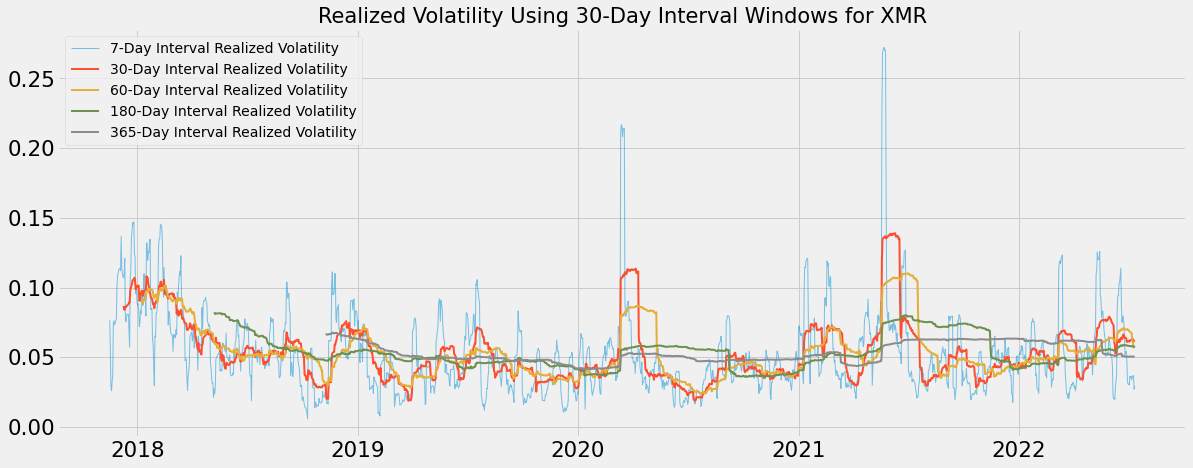

In [332]:
# CHANGING MATPLOTLIB STYLE
plt.style.use(['fivethirtyeight'])

fig, ax = plt.subplots(figsize=(18,7))

for i in intervals:
    if i == 7:
        alpha = 0.5
        lw = 1
    else:
        alpha = 1.0
        lw = 2
    ax.plot(vols_df[i], label=f'{i}-Day Interval Realized Volatility', 
            alpha=alpha, lw=lw)

ax.set_title('Realized Volatility Using 30-Day Interval Windows for XMR', fontsize=21)

plt.legend(loc='best', prop={'size': 14})
plt.savefig("diff_intervals.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=50)

plt.show();

The reason for choosing the 'interval_window' as 30 days is because the 7 day interval is extremely noisy to conclude any meaninngful pateterns, whilst the longer durations of more than 30 in a way smoothes down the volatility

In [25]:
INTERVAL_WINDOW = 30
n_future = 7

# GET BACKWARD LOOKING REALIZED VOLATILITY
df['vol_current'] = df.log_returns.rolling(window=INTERVAL_WINDOW)\
                                   .apply(realized_volatility_daily)

# GET FORWARD LOOKING REALIZED VOLATILITY 
df['vol_future'] = df.log_returns.shift(-n_future)\
                                 .rolling(window=INTERVAL_WINDOW)\
                                 .apply(realized_volatility_daily)

In [26]:
df.head(6)

Open        High         Low       Close     Volume  \
Date                                                                    
2017-11-10  121.344002  121.665001  101.757004  105.585999   84614000   
2017-11-11  105.750000  127.106003  103.877998  119.615997  107708000   
2017-11-12  119.597000  133.675003  110.617996  123.856003  144948000   
2017-11-13  128.960007  136.528000  120.921997  123.402000  116200000   
2017-11-14  123.615997  124.200996  118.625999  122.352997   53544800   
2017-11-15  122.240997  124.722000  119.192001  121.374001   49976700   

            Dividends  Stock Splits    returns  log_returns  vol_current  \
Date                                                                       
2017-11-10          0             0 -12.579898    -0.134445          NaN   
2017-11-11          0             0  13.287746     0.124761          NaN   
2017-11-12          0             0   3.544681     0.034833          NaN   
2017-11-13          0             0  -0.366557    -0.003672          NaN   
2017-11-14          0             0  -0.850070    -0.008537          NaN   
2017-11-15          0             0  -0.800141    -0.008034          NaN   

            vol_future  
Date                    
2017-11-10         NaN  
2017-11-11         NaN  
2017-11-12         NaN  
2017-11-13         NaN  
2017-11-14         NaN  
2017-11-15         NaN

In [27]:
df.describe()

Open         High          Low        Close        Volume  \
count  1706.000000  1706.000000  1706.000000  1706.000000  1.706000e+03   
mean    149.553821   155.612891   142.873488   149.512786  2.868877e+08   
std      91.725015    96.771601    85.943073    91.667097  1.121197e+09   
min      33.084614    36.645374    26.703888    33.010323  1.016030e+07   
25%      68.690945    70.241230    67.120899    68.718859  6.663065e+07   
50%     122.352970   126.575783   118.825592   122.538498  1.240431e+08   
75%     215.064838   223.713192   204.278431   214.802513  2.207970e+08   
max     483.709991   517.620239   453.390991   483.583618  2.895912e+10   

       Dividends  Stock Splits      returns  log_returns  vol_current  \
count     1706.0        1706.0  1706.000000  1706.000000  1677.000000   
mean         0.0           0.0     0.159672     0.000012     0.053187   
std          0.0           0.0     5.586041     0.056713     0.022044   
min          0.0           0.0   -41.385965    -0.534196     0.018738   
25%          0.0           0.0    -2.573934    -0.026076     0.037445   
50%          0.0           0.0     0.182910     0.001827     0.047418   
75%          0.0           0.0     2.992533     0.029486     0.063614   
max          0.0           0.0    41.192489     0.344954     0.138917   

        vol_future  
count  1670.000000  
mean      0.053050  
std       0.021988  
min       0.018738  
25%       0.037416  
50%       0.047323  
75%       0.063302  
max       0.138917

In [28]:
df = df.drop(['Dividends', 'Stock Splits'], axis=1) # Since they don't store any information

In [29]:
df.describe()

Open         High          Low        Close        Volume  \
count  1706.000000  1706.000000  1706.000000  1706.000000  1.706000e+03   
mean    149.553821   155.612891   142.873488   149.512786  2.868877e+08   
std      91.725015    96.771601    85.943073    91.667097  1.121197e+09   
min      33.084614    36.645374    26.703888    33.010323  1.016030e+07   
25%      68.690945    70.241230    67.120899    68.718859  6.663065e+07   
50%     122.352970   126.575783   118.825592   122.538498  1.240431e+08   
75%     215.064838   223.713192   204.278431   214.802513  2.207970e+08   
max     483.709991   517.620239   453.390991   483.583618  2.895912e+10   

           returns  log_returns  vol_current   vol_future  
count  1706.000000  1706.000000  1677.000000  1670.000000  
mean      0.159672     0.000012     0.053187     0.053050  
std       5.586041     0.056713     0.022044     0.021988  
min     -41.385965    -0.534196     0.018738     0.018738  
25%      -2.573934    -0.026076     0.037445     0.037416  
50%       0.182910     0.001827     0.047418     0.047323  
75%       2.992533     0.029486     0.063614     0.063302  
max      41.192489     0.344954     0.138917     0.138917

In [30]:
# DROPPING ALL NaN VALUES
df.dropna(inplace=True)

# EDA

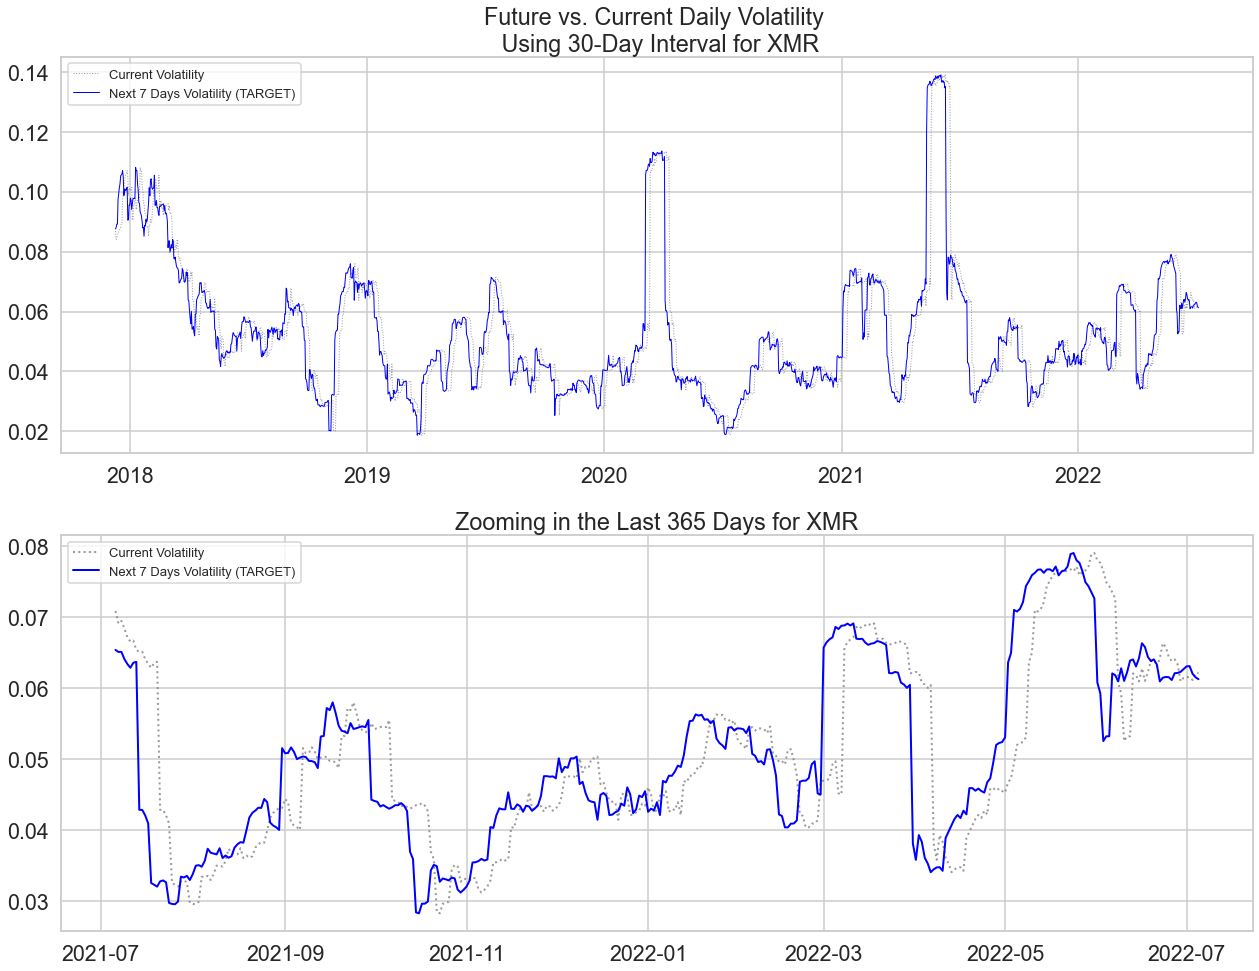

In [334]:
n_zoom = 365
sns.set_context("talk", font_scale=1.3)
# plt.style.use(['seaborn'])

# VISUALIZE REALIZED CURRENT VS. FUTURE VOLATILITY
with sns.axes_style("whitegrid"):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,14))

    ax1.plot(df.vol_current, alpha=.8, lw=1, color='gray', ls=':',
            label='Current Volatility')
    ax1.plot(df.vol_future, lw=1, color='blue',
            label=f'Next {n_future} Days Volatility (TARGET)')

    ax2.plot(df.vol_current[-n_zoom:], alpha=.8, lw=2, color='gray', ls=':',
            label='Current Volatility')
    ax2.plot(df.vol_future[-n_zoom:], lw=2, color='blue',
            label=f'Next {n_future} Days Volatility (TARGET)')

    ax1.title.set_text(f'Future vs. Current Daily Volatility \n Using {INTERVAL_WINDOW}-Day Interval for XMR')
    ax2.title.set_text(f'Zooming in the Last {n_zoom} Days for XMR')

    ax1.legend(loc='upper left', prop={'size': 13}, frameon=True)
    ax2.legend(loc='upper left', prop={'size': 13}, frameon=True)
    plt.tight_layout()
   
    plt.savefig("daily_vol.jpg", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=50)
    plt.show();

In the graph above, the blue line is the target future that I want to match up but the dotted gray line is the current volatility in real-time. This visualisation is how current volatility is shifted backward to become the future values that we aim for.

## Volatility Grouped by Month

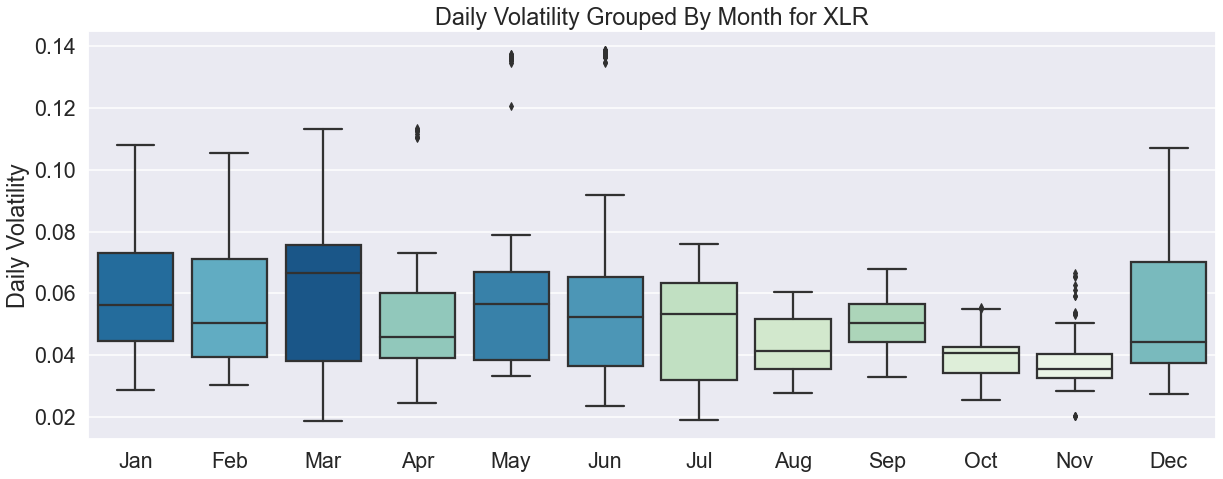

In [335]:
# PRESORT MONTHS IN CHRONOLOGICAL ORDER 
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 
                  'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']

# GROUP vol_current BY MONTH AND TAKE THE MEAN
data = df.groupby(by=[df.index.month_name()]).vol_current.mean()

# ABBREVIATE MONTH NAME
data.index = [x[:3] for x in data.index]

# SELECT PALETTE
pal = sns.color_palette("GnBu", len(data))

# SORT MONTH BY AVERAGE vol_current
rank = data.argsort().argsort().reindex(ordered_months)

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,7))
    
    sns.boxplot(x=[x[:3] for x in df.index.month_name()], 
                y=df.vol_current, 
                palette=np.array(pal)[rank],
                order=ordered_months)
    ax.set(xlabel='', 
           ylabel='Daily Volatility', 
           title='Daily Volatility Grouped By Month for XLR')
    plt.savefig("vol_by_month.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=50)
  
    plt.show()

In [33]:
df.vol_current.sort_values(ascending=False)[:50]

Date
2021-06-10    0.138917
2021-06-08    0.138717
2021-06-07    0.138684
2021-06-02    0.138638
2021-06-05    0.138504
2021-06-09    0.138366
2021-06-03    0.138115
2021-06-06    0.137848
2021-06-04    0.137643
2021-05-31    0.137628
2021-05-30    0.137445
2021-06-01    0.137391
2021-06-13    0.137103
2021-05-29    0.136837
2021-05-24    0.136822
2021-06-15    0.136605
2021-06-11    0.136601
2021-06-12    0.136521
2021-06-14    0.136514
2021-05-25    0.136368
2021-05-28    0.136073
2021-05-27    0.135893
2021-05-22    0.135818
2021-05-23    0.135802
2021-05-21    0.135435
2021-05-26    0.135287
2021-06-17    0.135023
2021-05-20    0.134662
2021-06-16    0.134635
2021-05-19    0.120548
2020-04-06    0.113554
2020-03-23    0.113133
2020-03-30    0.113047
2020-03-24    0.113019
2020-03-31    0.113006
2020-04-03    0.112939
2020-04-05    0.112799
2020-04-04    0.112769
2020-03-26    0.112738
2020-04-02    0.112667
2020-03-29    0.112610
2020-04-01    0.112557
2020-03-25    0.112235
2020-0

## Daily Volatility Grouped by Year

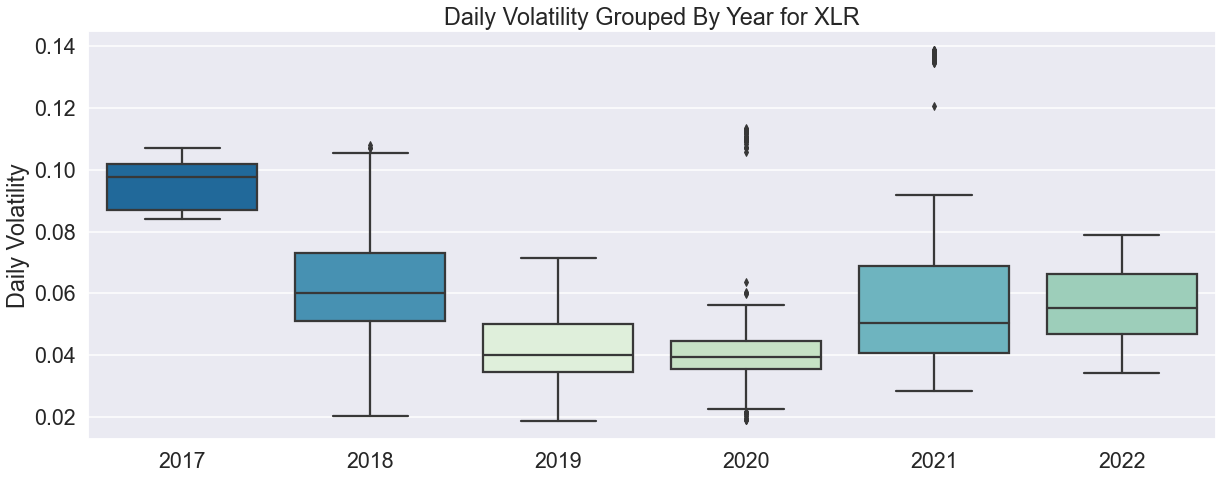

In [336]:
# GROUP vol_current BY YEAR AND TAKE THE MEAN
data = df.groupby(by=[df.index.year]).vol_current.mean()

# SELECT PALETTE
pal = sns.color_palette("GnBu", len(data))

# SORT MONTH BY AVERAGE vol_current
rank = data.argsort().argsort()

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,7))
    
    sns.boxplot(x=df.index.year, 
                y=df.vol_current, 
                palette=np.array(pal)[rank])
    ax.set(xlabel='', 
           ylabel='Daily Volatility', 
           title='Daily Volatility Grouped By Year for XLR')
    plt.savefig("vol_by_year.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=50)
    plt.show()

Here, you can see that the years of 2018 and 2021 show the highest volatility with outliers present in 2020 and 2021.

## Daily Volatility Distribution

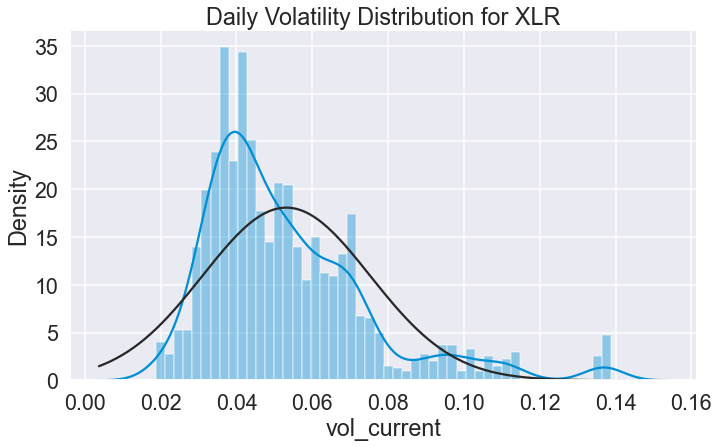

In [337]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(df.vol_current, norm_hist=True, fit=stats.norm,
                bins=50, ax=ax)
    plt.title('Daily Volatility Distribution for XLR')
    plt.savefig("vol_dist.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=50)
    plt.show();

The distribution of daily is lightly right skewed, with a small number of larger values to the right.
Here, the mode is lesser than median that is in turn lesser than mean

## Returns/Log Returns Stationarity Checking

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
# LOG RETURNS
adfuller_results = adfuller(df.log_returns.dropna())

print(f'ADF Statistic: {adfuller_results[0]}')
print(f'p-value: {adfuller_results[1]}')
print('Critical Values:')
for key, value in adfuller_results[4].items():
    print(f'{key}: {value:.4f}')

ADF Statistic: -19.811866598011832
p-value: 0.0
Critical Values:
1%: -3.4343
5%: -2.8633
10%: -2.5677


In [38]:
# RETURNS
adfuller_results = adfuller(df.returns.dropna())

print(f'ADF Statistic: {adfuller_results[0]}')
print(f'p-value: {adfuller_results[1]}')
print('Critical Values:')
for key, value in adfuller_results[4].items():
    print(f'{key}: {value:.4f}')

ADF Statistic: -20.033573564861438
p-value: 0.0
Critical Values:
1%: -3.4343
5%: -2.8633
10%: -2.5677


 Using a significant level alpha of 0.05, the p-value here for both Returns and Log Returns are significantly smaller than alpha, so there is enough evidence to reject the Null Hypothesis which is that Returns and Log Returns are not dependant on time/trend

## Train-Validation-Test Splits

There are 1670 total usable datapoints from December 2017 to June 2022. So ETH is open 24.7 as it is not traded on regulated exchange. 1 year in a way covers trading days worth 365 instead of 252 days for other stocks and commonidies.

The data would be split the following ways:

- Final Model Testing for most recent 30 days from 6th June, 2022 to 5 July, 2022
- Validation Data worth 365 days for validation and model tuning
- The Training data which is worth 1275 days

In [39]:
# PRE-DETERMINE DESIRED TEST & VALIDATION SIZES
test_size = 30
val_size = 365

# CONVERT TO INDICES
split_time_1 = len(df) - (val_size + test_size)
split_time_2 = len(df) - test_size

# GET CORRESPONDING DATETIME INDICES FOR EACH SET
train_idx = df.index[:split_time_1]
val_idx = df.index[split_time_1:split_time_2]
test_idx = df.index[split_time_2:]

In [40]:
print(f'TRAINING \tFrom: {train_idx[0]} \tto: {train_idx[-1]} \t{len(train_idx)} days')
print(f'VALIDATION \tFrom: {val_idx[0]} \tto: {val_idx[-1]} \t{len(val_idx)} days')
print(f'TEST \t\tFrom: {test_idx[0]} \tto: {test_idx[-1]} \t{len(test_idx)} days')

TRAINING 	From: 2017-12-09 00:00:00 	to: 2021-06-05 00:00:00 	1275 days
VALIDATION 	From: 2021-06-06 00:00:00 	to: 2022-06-05 00:00:00 	365 days
TEST 		From: 2022-06-06 00:00:00 	to: 2022-07-05 00:00:00 	30 days


In [41]:
# SPLIT FORWARD VOLATILITY INTO 3 PARTS 
# (this would be the target)
y_train = df.vol_future[train_idx]
y_val = df.vol_future[val_idx]
y_test = df.vol_future[test_idx]

In [42]:
# SPLIT CURRENT DAILY REALIZED VOLATILITY INTO 3 PARTS 
# (this would be the input for baseline, random walk, and NN models)
x_train = df.vol_current[train_idx]
x_val = df.vol_current[val_idx]
x_test = df.vol_current[test_idx]

In [43]:
# SPLIT RETURNS INTO 3 PARTS
# (this would be the input for GARCH models)
r_train = df.returns[train_idx]
r_val = df.returns[val_idx]
r_test = df.returns[test_idx]

In [44]:
# SPLIT LOG RETURNS INTO 3 PARTS
# (mostly for visualization)
lr_train = df.log_returns[train_idx]
lr_val = df.log_returns[val_idx]
lr_test = df.log_returns[test_idx]

In [45]:
y_train.describe()

count    1275.000000
mean        0.053118
std         0.023464
min         0.018738
25%         0.036887
50%         0.046489
75%         0.063542
max         0.138917
Name: vol_future, dtype: float64

In [46]:
x_train.describe()

count    1275.000000
mean        0.052832
std         0.022735
min         0.018738
25%         0.036887
50%         0.046489
75%         0.063542
max         0.138638
Name: vol_current, dtype: float64

In [47]:
y_train.head(4)

Date
2017-12-09    0.087544
2017-12-10    0.088005
2017-12-11    0.089126
2017-12-12    0.089131
Name: vol_future, dtype: float64

In [48]:
x_train.head(4)

Date
2017-12-09    0.086809
2017-12-10    0.084088
2017-12-11    0.084414
2017-12-12    0.086060
Name: vol_current, dtype: float64

In [49]:
# SPLIT FORWARD VOLATILITY INTO 3 PARTS 
# (this would be the target)
y_train = df.vol_future[train_idx]
y_val = df.vol_future[val_idx]
y_test = df.vol_future[test_idx]

In [50]:
y_train.describe()

count    1275.000000
mean        0.053118
std         0.023464
min         0.018738
25%         0.036887
50%         0.046489
75%         0.063542
max         0.138917
Name: vol_future, dtype: float64

In [51]:
y_train.head()

Date
2017-12-09    0.087544
2017-12-10    0.088005
2017-12-11    0.089126
2017-12-12    0.089131
2017-12-13    0.097508
Name: vol_future, dtype: float64

## Data Preprocessing

### Feature Normalisation

As various types of models are to be built based on different algorithmns, it's better to normalise the volatilies using the MinMaxScaler to standardize the predictions generated among different models

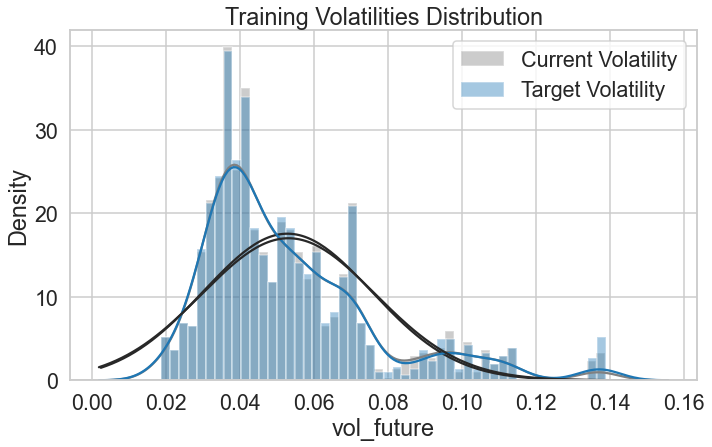

In [52]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(x_train, norm_hist=True, fit=stats.norm, 
                 color='gray', 
                 bins=50, ax=ax, label='Current Volatility')
    sns.distplot(y_train, norm_hist=True, fit=stats.norm,
                 color='tab:blue', 
                 bins=50, ax=ax, label='Target Volatility')
    plt.title('Training Volatilities Distribution')
    plt.legend()
    plt.savefig("vol_dist.png", 
bbox_inches='tight', 
               transparent=True,
               pad_inches=50)
    plt.show();

In [53]:
def transform_volatility_to_scaler(scaler, tf_series):
    '''
    Transform a series to a fitted scaler
    '''
    idx = tf_series.index
    output = pd.Series(scaler.transform(tf_series.values.reshape(-1,1))[:,0],
                       index=idx)
    return output

In [54]:
# INITIATE SCALER
scaler_vol = MinMaxScaler()

# FIT SCALER TO CURRENT VOLATILITY IN TRAINING SET
scaler_vol = scaler_vol.fit(x_train.values.reshape(-1,1))

In [55]:
# TRANSFORM TRAINING CURRENT & FUTURE VOLATILITIES 
x_train_scaled = transform_volatility_to_scaler(scaler_vol, x_train)
y_train_scaled = transform_volatility_to_scaler(scaler_vol, y_train)

# TRANSFORMING VALIDATION CURRENT & FUTURE VOLATILITIES
x_val_scaled = transform_volatility_to_scaler(scaler_vol, x_val)
y_val_scaled = transform_volatility_to_scaler(scaler_vol, y_val)

# TRANSFORMING TEST CURRENT & FUTURE VOLATILITIES
x_test_scaled = transform_volatility_to_scaler(scaler_vol, x_test)
y_test_scaled = transform_volatility_to_scaler(scaler_vol, y_test)

In [56]:
x_train.head(10)

Date
2017-12-09    0.086809
2017-12-10    0.084088
2017-12-11    0.084414
2017-12-12    0.086060
2017-12-13    0.086069
2017-12-14    0.086814
2017-12-15    0.087125
2017-12-16    0.087544
2017-12-17    0.088005
2017-12-18    0.089126
Name: vol_current, dtype: float64

In [57]:
y_train.head(10)

Date
2017-12-09    0.087544
2017-12-10    0.088005
2017-12-11    0.089126
2017-12-12    0.089131
2017-12-13    0.097508
2017-12-14    0.099522
2017-12-15    0.101363
2017-12-16    0.102665
2017-12-17    0.105254
2017-12-18    0.105581
Name: vol_future, dtype: float64

In [58]:
x_train_scaled.head(10)

Date
2017-12-09    0.567727
2017-12-10    0.545035
2017-12-11    0.547755
2017-12-12    0.561486
2017-12-13    0.561559
2017-12-14    0.567773
2017-12-15    0.570368
2017-12-16    0.573862
2017-12-17    0.577704
2017-12-18    0.587054
dtype: float64

In [59]:
y_train_scaled.head(10)

Date
2017-12-09    0.573862
2017-12-10    0.577704
2017-12-11    0.587054
2017-12-12    0.587093
2017-12-13    0.656964
2017-12-14    0.673761
2017-12-15    0.689115
2017-12-16    0.699975
2017-12-17    0.721569
2017-12-18    0.724296
dtype: float64

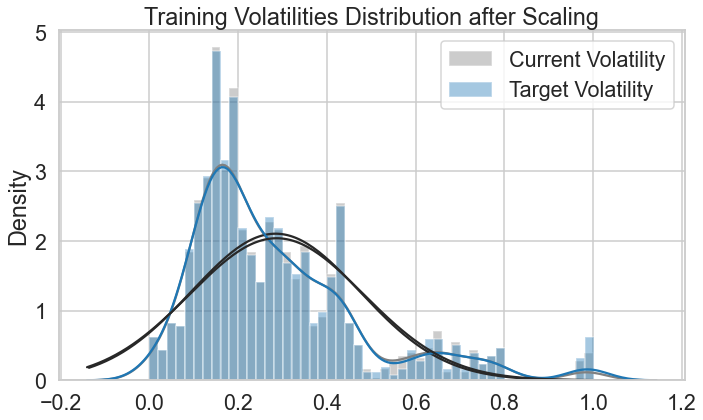

In [60]:
# PLOTTING VOLATILITIES AFTER SCALING
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(x_train_scaled, norm_hist=True, fit=stats.norm, 
                 color='gray', 
                 bins=50, ax=ax, label='Current Volatility')
    sns.distplot(y_train_scaled, norm_hist=True, fit=stats.norm,
                 color='tab:blue', 
                 bins=50, ax=ax, label='Target Volatility')
    plt.title('Training Volatilities Distribution after Scaling')
    plt.legend()
    plt.savefig("vol_dist.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=50)
    plt.show();

## Train-Validation-Test Visualisation

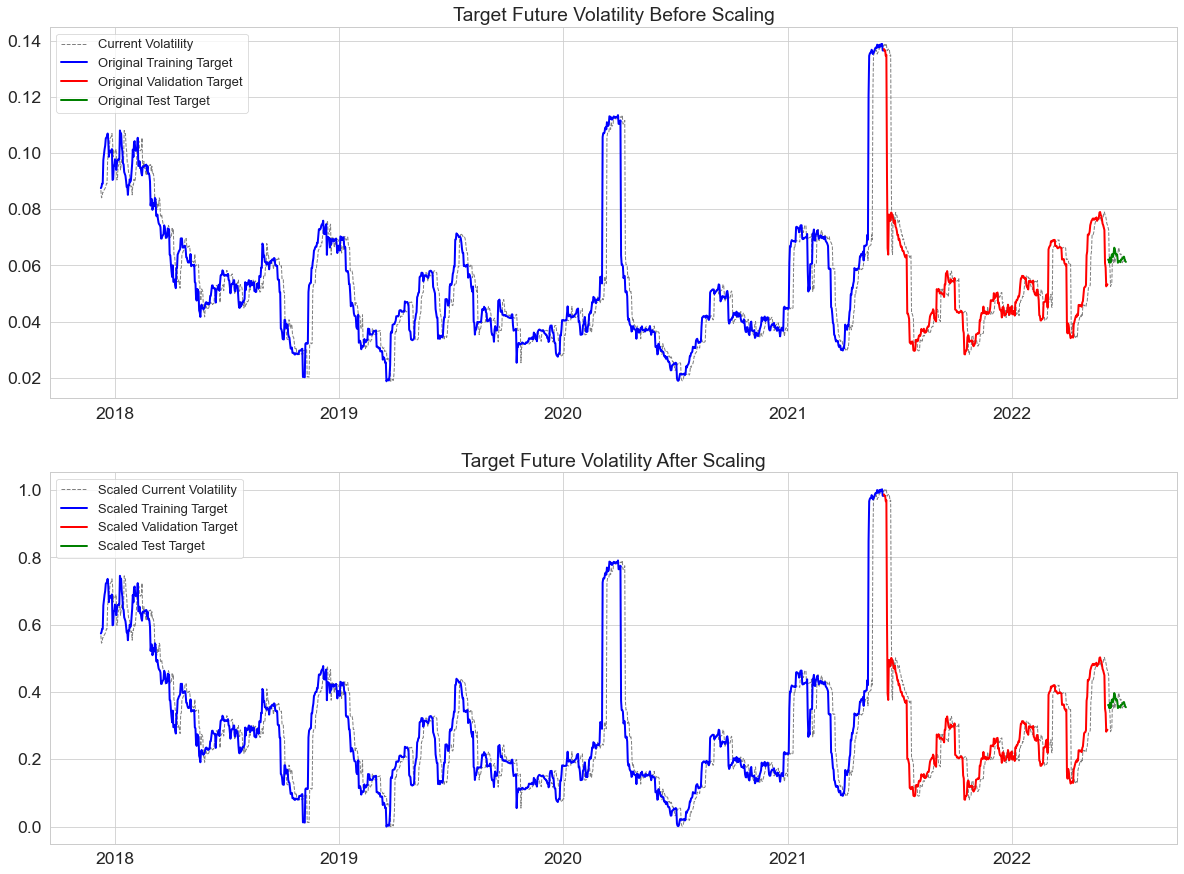

In [61]:
sns.set_context("paper", font_scale=2)

# VISUALIZE TRAIN/VALIDATION/TEST vol_future BEFORE & AFTER TRAINING
with sns.axes_style("whitegrid"):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,14))

    ax1.plot(df.vol_current, lw=1, color='gray', ls='--',
                label='Current Volatility')
    ax1.plot(y_train, color='blue', label='Original Training Target', lw=2)
    ax1.plot(y_val, color='red', label='Original Validation Target', lw=2)
    ax1.plot(y_test, color='green', label='Original Test Target', lw=2)

    ax1.title.set_text('Target Future Volatility Before Scaling')

    ax2.plot(transform_volatility_to_scaler(scaler_vol, df.vol_current), 
                lw=1, color='gray', ls='--',
                label='Scaled Current Volatility')
    ax2.plot(y_train_scaled, color='blue', label='Scaled Training Target', lw=2)
    ax2.plot(y_val_scaled, color='red', label='Scaled Validation Target', lw=2)
    ax2.plot(y_test_scaled, color='green', label='Scaled Test Target', lw=2)

    ax2.title.set_text('Target Future Volatility After Scaling')

    ax1.legend(loc='upper left', prop={'size': 13}, frameon=True)
    ax2.legend(loc='upper left', prop={'size': 13}, frameon=True)
    plt.savefig("train_val_test_org_scled.png.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=50)
    plt.show();

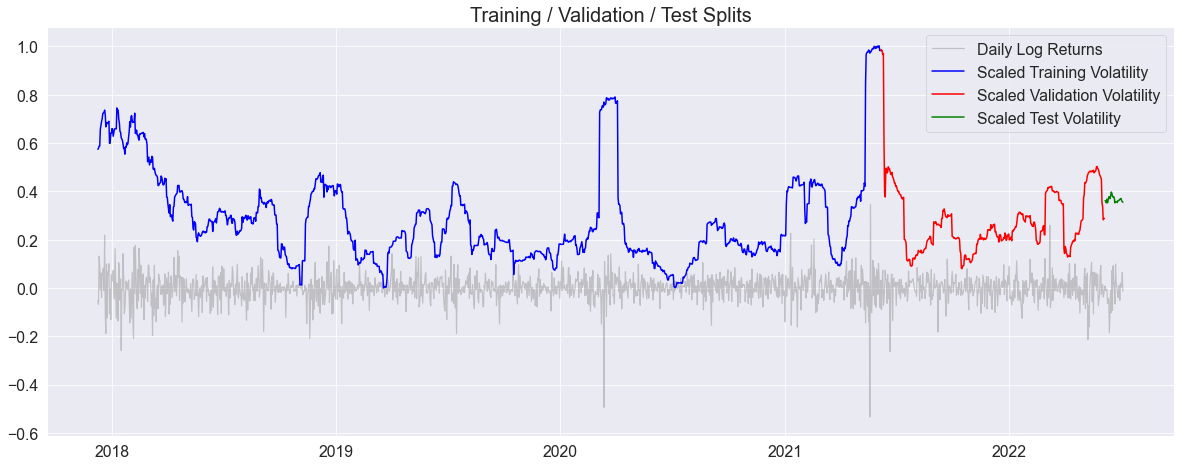

In [62]:
sns.set_context("paper", font_scale=1.8)
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(18,7))

    plt.plot(df.log_returns, color='gray', label='Daily Log Returns', alpha=0.4)

    plt.plot(y_train_scaled, color='blue', 
             label='Scaled Training Volatility', lw=1.5)
    plt.plot(y_val_scaled, color='red', 
             label='Scaled Validation Volatility', lw=1.5)
    plt.plot(y_test_scaled, color='green', 
             label='Scaled Test Volatility', lw=1.5)

    plt.plot()
    plt.title('Training / Validation / Test Splits', fontsize=20)
    plt.legend(frameon=True)
    plt.savefig("train_val_test.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=50)

    plt.show();

## Modelling

### Performance Metrics

The whole purpose of forecasting is to predict future based on currently available information and there are problems of overfitting and underfitting that occur. The main goal of cross-valisation is also to ensure that we minimise overfitting, especially in financial markets twhere stakes are pretty high.

The two main metrics to be used are RMSPE.

Timescaling is very important in the calculation of volatility due to the level of freedom in frequency/interval window selection. Therefore I think RMSPE would help capture degree of errors compared to desired target values better than other metrics. Also RMSPE would punish large errors more than regular MAPE (Mean Absolute Percentage Error), which is what I want to do here.

RMSE and RMSPE would be tracked across different models' performance on validation set forecasting to indicate their abilities to generalize on out-of-sample data.

In [63]:
# DEFINE ROOT MEAN SQUARED PERCENTAGE ERROR FUNCTION
def RMSPE(y_true, y_pred):
    """
    Compute Root Mean Squared Percentage Error between 2 arrays
    """
    output = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))
    return output

In [64]:
# DEFINE ROOT MEAN SQUARED ERROR FUNCTION
def RMSE(y_true, y_pred):
    """
    Compute Root Mean Squared Error between 2 arrays
    """
    output = np.sqrt(mse(y_true, y_pred))
    return output

In [65]:
# INITIATE A DATAFRAME FOR MODEL PERFORMANCE TRACKING & COMPARISON 
perf_df = pd.DataFrame(columns=['Model', 'Validation RMSPE', 'Validation RMSE'])

In [66]:
# A FUNCTION THAT LOGS MODEL NAME, RMSE AND RMPSE INTO perf_df
# FOR EASY COMPARISON LATER
def log_perf(y_true, y_pred, model_name):
    perf_df.loc[len(perf_df.index)] = [model_name, 
                                       RMSPE(y_true, y_pred), 
                                       RMSE(y_true, y_pred)]
    return perf_df

In [67]:
# PLOTTING MODEL PREDICTIONS VS. TARGET VALUES
def viz_model(y_true, y_pred, model_name):
    sns.set_context("paper", font_scale=1.7)
    plt.rcParams["axes.grid"] = False

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(18,7))
        plt.plot(x_val_scaled, color='gray',  ls=':',
                label=f"Scaled Current Daily Volatility")
        
        plt.plot(y_true, color='blue', lw=2, 
                label=f"Target Volatility")
        plt.plot(y_pred, color='orange', lw=2.5,
                label=f'Forecasted Volatility')
        
        # plt.plot(lr_val, color='gray', alpha=0.4,
        #         label='Daily Log Returns')

        plt.title(f'{model_name} \non Validation Data')
        plt.legend(loc='best', frameon=True)

## Model #1- Baseline Model

One of the essential characteristics of Volatility is it's mean-revert over the long term. Therfore my first baseline model his would be a very simple one that only outputs the average current realized volatility of the whole training set as predictions everything.

In [68]:
# CALCULATE THE MEAN OF SCALED TRAINING DATA
mean_train_vol = x_train_scaled.mean()
mean_train_vol

0.2843548385522066

In [69]:
# CREATE SERIES OF PREDICTIONS FOR BASELINE MODEL ON VALIDATION SET
baseline_preds = np.ones(len(val_idx)) * mean_train_vol
baseline_preds = pd.Series(baseline_preds, index=lr_val.index)



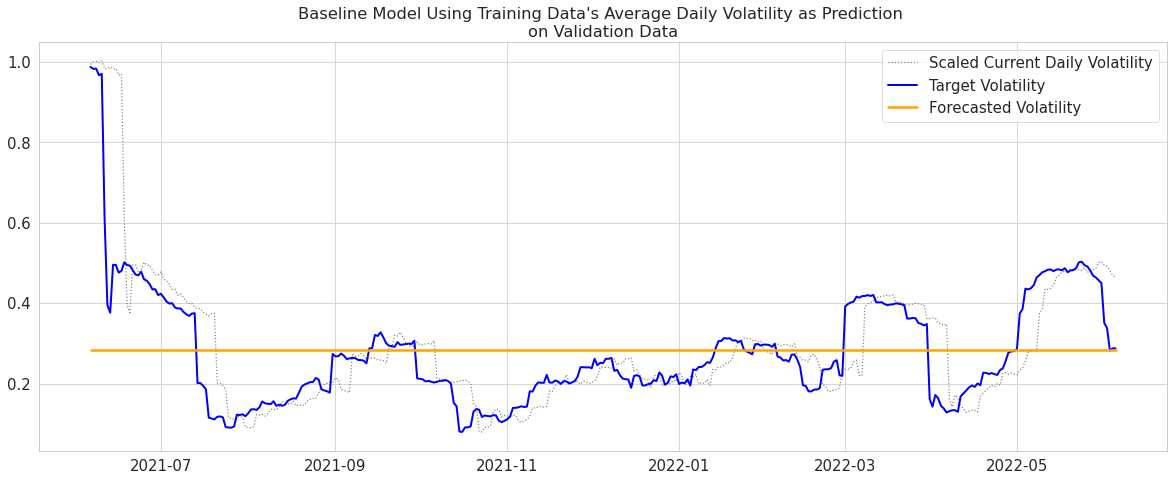

In [70]:
viz_model(y_val_scaled, baseline_preds, 
          f"Baseline Model Using Training Data's Average Daily Volatility as Prediction")
plt.savefig("baseline.jpg", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=50)
plt.show();

In [71]:
log_perf(y_val_scaled, baseline_preds, 'Mean Baseline')

Model  Validation RMSPE  Validation RMSE
0  Mean Baseline          0.659298         0.139745

## Model #2- GARCH

## Basic GARCH

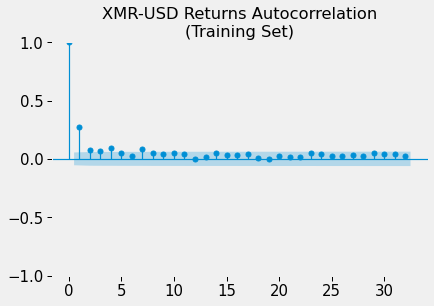

In [72]:
# VISUALIZE AUTOCORRELATION OF SQUARED RETURNS
plot_acf(r_train**2, 
          title=f'{tckr.upper()} Returns Autocorrelation\n(Training Set)');

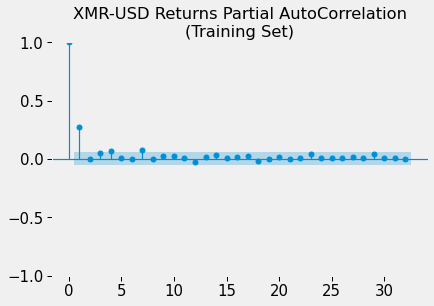

In [73]:
# VISUALIZE PARTIAL AUTOCORRELATION OF SQUARED RETURNS
plot_pacf(r_train**2, 
          title=f'{tckr.upper()} Returns Partial AutoCorrelation\n(Training Set)');

The autocorrelation plots seem to indicate that there's only significant correlation up to the 7th lags, and the ones following don't seem to be too significant.

GARCH models are trained on percent returns. (One of the reasons I decided to normalize the volatilities across the board is because I am still not 100% sure which timescale GARCH conditional volatility is calculated in (likely daily), and still haven't figured out why the outputs here seem to be on a totally different scale compared to the volatilities previously calculated. Once I scale them, they match up much more nicely).

In [74]:
df.describe()

Open         High          Low        Close        Volume  \
count  1670.000000  1670.000000  1670.000000  1670.000000  1.670000e+03   
mean    149.368772   155.308159   142.694368   149.238582  2.904277e+08   
std      92.459360    97.478586    86.639965    92.349535  1.132871e+09   
min      33.084614    36.645374    26.703888    33.010323  1.016030e+07   
25%      68.260761    69.990538    66.609571    68.261690  6.663065e+07   
50%     120.774166   124.922836   116.686668   120.775150  1.256759e+08   
75%     216.778561   224.959274   206.170273   215.457462  2.222378e+08   
max     483.709991   517.620239   453.390991   483.583618  2.895912e+10   

           returns  log_returns  vol_current   vol_future  
count  1670.000000  1670.000000  1670.000000  1670.000000  
mean      0.106247    -0.000489     0.053149     0.053050  
std       5.517007     0.056153     0.022082     0.021988  
min     -41.385965    -0.534196     0.018738     0.018738  
25%      -2.598683    -0.026330     0.037416     0.037416  
50%       0.170202     0.001701     0.047323     0.047323  
75%       2.926678     0.028847     0.063685     0.063302  
max      41.192489     0.344954     0.138917     0.138917

In [75]:
from arch import arch_model


### GARCH MODEL with (P,Q)= (7,7)

In [76]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

arch_1 = arch_model(r_train,vol='GARCH', p=7, q=7)
result_1 = arch_1.fit(disp='off')
print()
print(result_1.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3883.81
Distribution:                  Normal   AIC:                           7799.61
Method:            Maximum Likelihood   BIC:                           7882.03
                                        No. Observations:                 1275
Date:                Thu, Aug 18 2022   Df Residuals:                     1274
Time:                        02:26:00   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2487      0.125      1.991  4.652e-02 [3.828e-

All the coefficient look statistically significant <0.05, most of the coefficients are not statistically significant because P > |t|. Therefore, maybe reducing the p and q values might help 

### GARCH MODEL with (P,Q)= (1,1)

In [77]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

arch_1 = arch_model(r_train,vol='GARCH', p=1, q=1)
result_1 = arch_1.fit(disp='off')
print()
print(result_1.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3897.00
Distribution:                  Normal   AIC:                           7801.99
Method:            Maximum Likelihood   BIC:                           7822.60
                                        No. Observations:                 1275
Date:                Thu, Aug 18 2022   Df Residuals:                     1274
Time:                        02:26:00   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.2420      0.125      1.935  5.305e-02 [-3.1

All coefficients look statistically significant now.

After being fitted to the training data (percent returns), the GARCH model forecast contains an estimated conditional volatility attribute for the training portion of the time series. I am going to scale the fitted conditional volatility arrays, plot it out and compare it to the realized volatility calculated above (also scaled) x_train_scaled.

In [78]:
def scale_tf_cond_vol(model_result):
    '''
    Scale & Transform Conditional Volatility 
    Estimated by ARCH Models
    '''
    # OBTAIN ESTIMATED CONDITIONAL VOLATILITY FROM MODEL RESULT
    cond_vol = model_result.conditional_volatility

    # INITIATE SCALER
    scaler = MinMaxScaler()

    # FIT SCALER TO MODEL'S ESTIMATED CONDITIONAL VOLATILITY
    scaler = scaler.fit(cond_vol.values.reshape(-1,1))

    scaled_cond_vol = transform_volatility_to_scaler(scaler, cond_vol)
    return scaler, scaled_cond_vol

In [79]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_garch, scaled_cond_vol = scale_tf_cond_vol(result_1)

In [80]:
# VISUALIZE MODEL'S ESTIMATED CONDITIONAL VOLATILITY 
# WITH SCALED vol_current CALCULATED ABOVE
def viz_cond_vol(cond_vol_series, model_name):
    with sns.axes_style("darkgrid"):
        fig, ax = plt.subplots(figsize=(18,7))

        ax.plot(x_train_scaled, color='blue', lw=2,
                label=f'Scaled {INTERVAL_WINDOW}-Day Interval Daily Realized Volatility')
        ax.plot(cond_vol_series, color='orange', lw=2,
                label=f'Scaled {model_name} Estimated Conditional Volatility')
        ax.set_title('Training Set')
        plt.legend()
        plt.show();

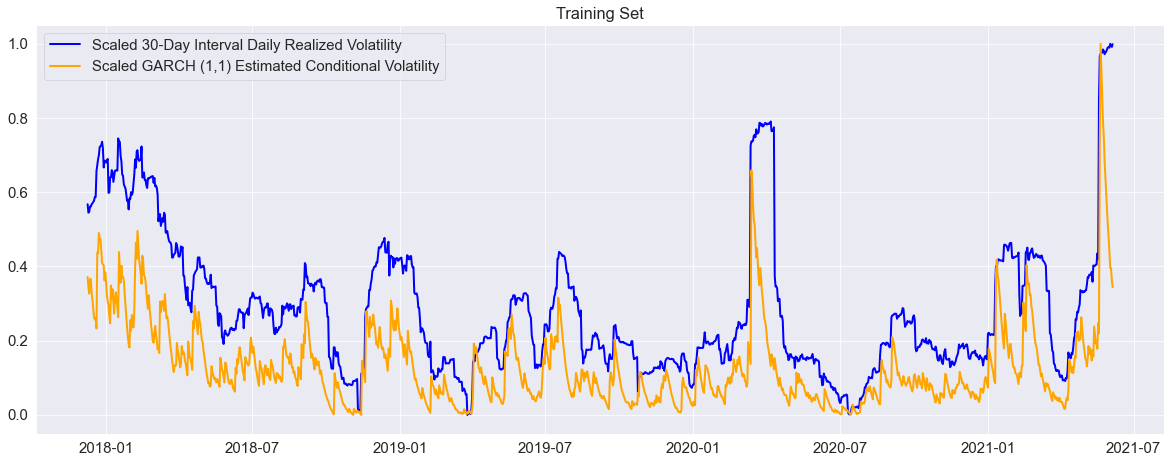

In [81]:
viz_cond_vol(scaled_cond_vol, 'GARCH (1,1)')

In [82]:
# ROLLING FORECAST
# INITIALIZING rolling_forecast
rolling_forecasts = []
idx = df.index

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx]
    
    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, vol='GARCH', p=1,q=1,
                       dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    # GET THE SQRT OF AVERAGE n_future DAYS VARIANCE
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

gm_1_preds = pd.Series(rolling_forecasts, index=val_idx)

In [83]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
gm_1_preds_scaled = transform_volatility_to_scaler(scaler_garch, gm_1_preds)

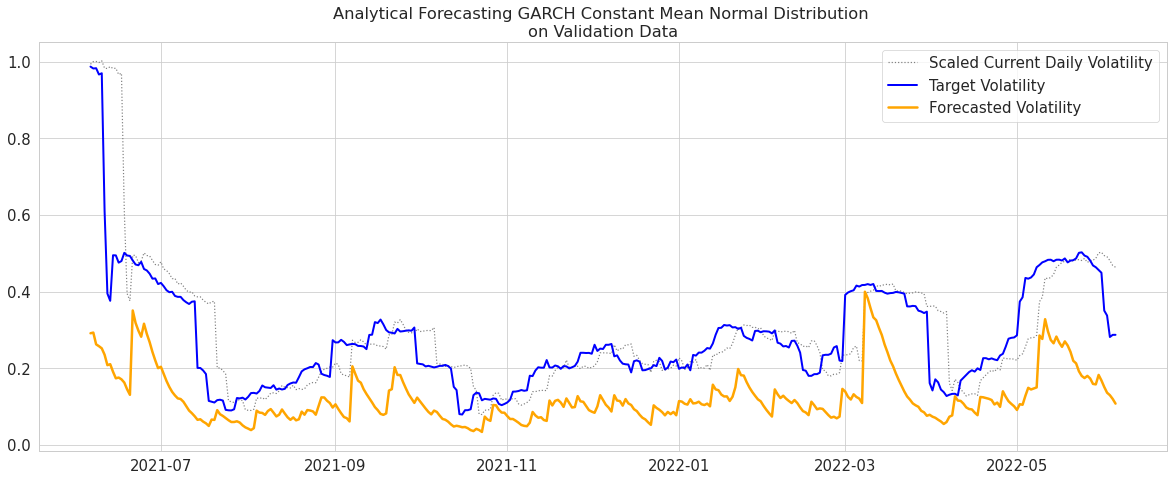

In [84]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, gm_1_preds_scaled, 
          'Analytical Forecasting GARCH Constant Mean Normal Distribution')

In [85]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, gm_1_preds_scaled, 
         'GARCH (1,1), Constant Mean, Normal Dist')

Model  Validation RMSPE  Validation RMSE
0                            Mean Baseline          0.659298         0.139745
1  GARCH (1,1), Constant Mean, Normal Dist          0.554754         0.183075

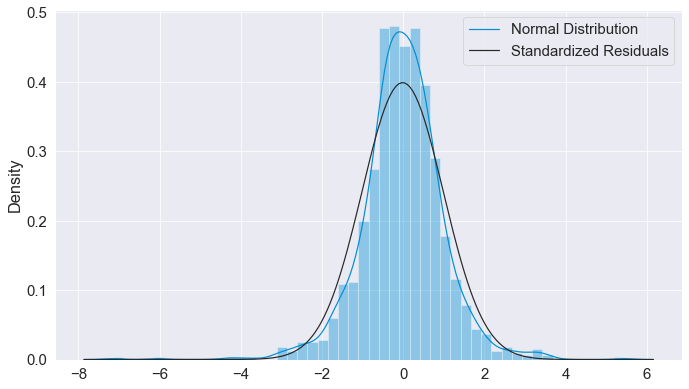

In [86]:
# Inspecting the residuals
gm_resid = result_1.resid
gm_std = result_1.conditional_volatility

# STANDARDIZING RESIDUALS
gm_std_resid = gm_resid / gm_std

# VISUALIZING STANDARDIZED RESIDUALS VS. A NORMAL DISTRIBUTION
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,6))
    sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50)
    plt.legend(('Normal Distribution', 'Standardized Residuals'))
    plt.show();


By default, basic GARCH is based on some assumptions that the residuals and the mean return are both normally distributed. However, more often than not, financial time series data does not follow a normal distribution, and it's more likely to observe extreme positive and negative values that are far away from the mean.

Fortunately, there're certain parameters that can be specified in the arch_model library to make it more representative of real financial data:

'dist' can be set to t for Student's T or skewt for skewed Student's T distribution (Student's T distribution is also symmetric and bell-shaped like normal distribution; however it has higher peak and fatter tails allowing more values lying further away from the mean).
Looking at the plot above of the standardized residuals, I think I can try skewed Student's T for the next fit.

The basic GARCH model assumes that positive and negative news have similar impact on volatility, but although the impact is usually symmetric from the model's point of view, the negative impacts tend to affect the volatility more than the positive ones so GJR-GARCH is another model that accounts for the assymmetry of such shock responses.

In [87]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

gjr_gm = arch_model(r_train, p=1, q=1, o=1, 
                    vol='GARCH', dist='skewt')
result_2 = gjr_gm.fit(disp='off')
print(result_2.summary())

                         Constant Mean - GJR-GARCH Model Results                         
Dep. Variable:                           returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GJR-GARCH   Log-Likelihood:               -3814.46
Distribution:      Standardized Skew Student's t   AIC:                           7642.93
Method:                       Maximum Likelihood   BIC:                           7678.98
                                                   No. Observations:                 1275
Date:                           Thu, Aug 18 2022   Df Residuals:                     1274
Time:                                   02:26:17   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
--------------------------------------

In [88]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_gjr, scaled_gjr_cond_vol = scale_tf_cond_vol(result_2)

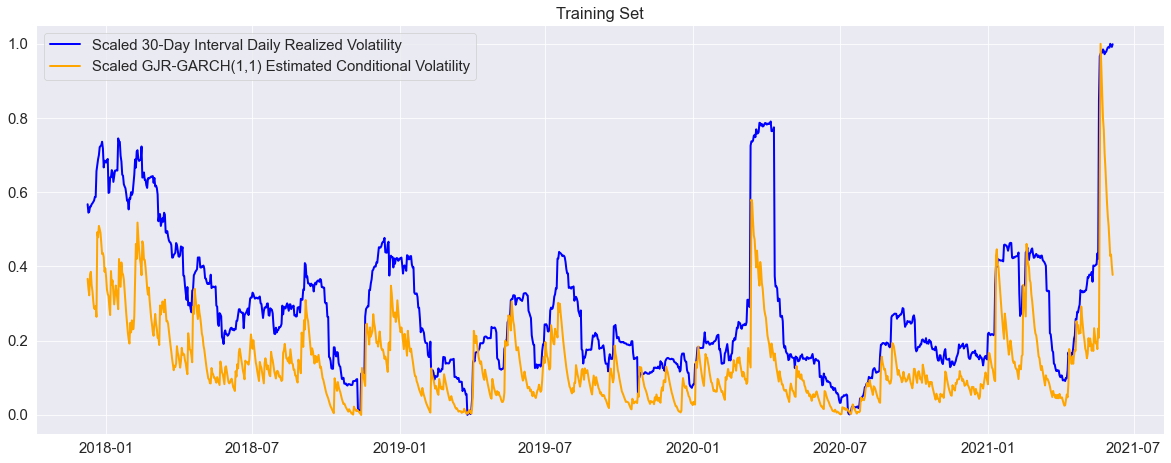

In [89]:
viz_cond_vol(scaled_gjr_cond_vol, 'GJR-GARCH(1,1)')

In [90]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, q=1, o=1, 
                       vol='GARCH', dist='skewt')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

gjr_1_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [91]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
gjr_1_preds_scaled = transform_volatility_to_scaler(scaler_gjr, gjr_1_preds)

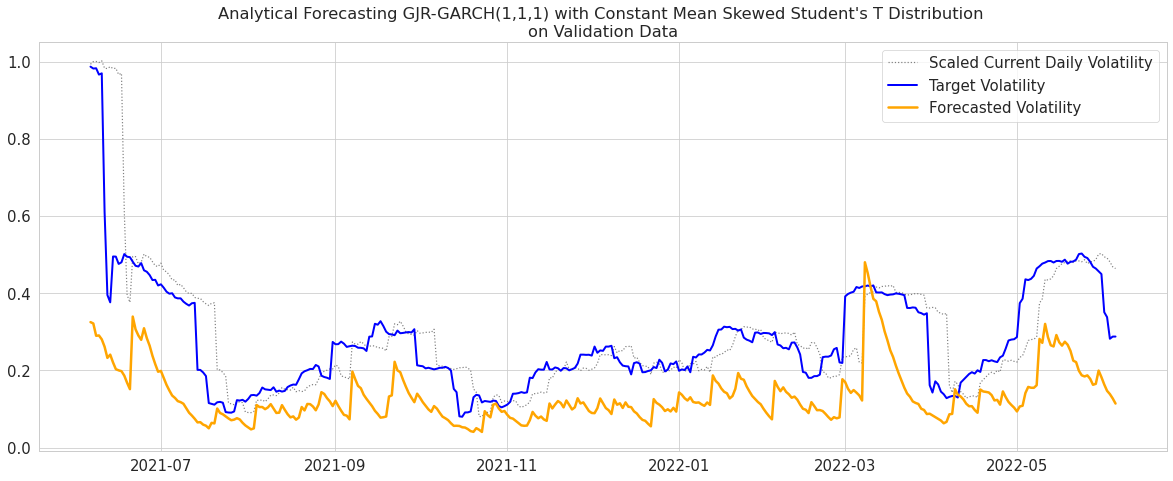

In [92]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, gjr_1_preds_scaled,
          "Analytical Forecasting GJR-GARCH(1,1,1) with Constant Mean Skewed Student's T Distribution")

In [93]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, gjr_1_preds_scaled,
         "Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist")

Model  Validation RMSPE  \
0                                           Mean Baseline          0.659298   
1                 GARCH (1,1), Constant Mean, Normal Dist          0.554754   
2  Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist          0.520993   

   Validation RMSE  
0         0.139745  
1         0.183075  
2         0.175141

## Model #3- ARCH

In [94]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

arch_1 = arch_model(r_train,vol='ARCH', p=1)
result_3 = arch_1.fit(disp='off')
print()
print(result_3.summary())


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3983.97
Distribution:                  Normal   AIC:                           7973.93
Method:            Maximum Likelihood   BIC:                           7989.38
                                        No. Observations:                 1275
Date:                Thu, Aug 18 2022   Df Residuals:                     1274
Time:                        02:26:56   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1475      0.148      0.995      0.320 [ -0.143,  0.4

In [95]:
def scale_tf_cond_vol(model_result):
    '''
    Scale & Transform Conditional Volatility 
    Estimated by ARCH Models
    '''
    # OBTAIN ESTIMATED CONDITIONAL VOLATILITY FROM MODEL RESULT
    cond_vol = model_result.conditional_volatility

    # INITIATE SCALER
    scaler = MinMaxScaler()

    # FIT SCALER TO MODEL'S ESTIMATED CONDITIONAL VOLATILITY
    scaler = scaler.fit(cond_vol.values.reshape(-1,1))

    scaled_cond_vol = transform_volatility_to_scaler(scaler, cond_vol)
    return scaler, scaled_cond_vol

In [96]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_arch, scaled_cond_vol = scale_tf_cond_vol(result_3)

In [97]:
# VISUALIZE MODEL'S ESTIMATED CONDITIONAL VOLATILITY 
# WITH SCALED vol_current CALCULATED ABOVE
def viz_cond_vol(cond_vol_series, model_name):
    with sns.axes_style("darkgrid"):
        fig, ax = plt.subplots(figsize=(18,7))

        ax.plot(x_train_scaled, color='blue', lw=2,
                label=f'Scaled {INTERVAL_WINDOW}-Day Interval Daily Realized Volatility')
        ax.plot(cond_vol_series, color='green', lw=2,
                label=f'Scaled {model_name} Estimated Conditional Volatility')
        ax.set_title('Training Set')
        plt.legend()
        plt.show();

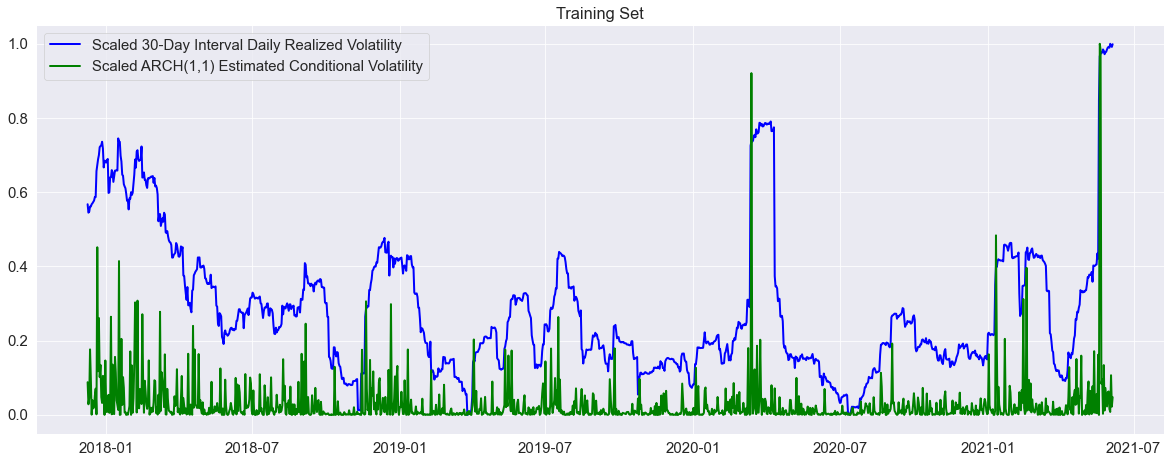

In [98]:
viz_cond_vol(scaled_cond_vol, 'ARCH(1,1)')

In [99]:
# ONE STEP EXPANDING WINDOW FORECAST
# INITIALIZING rolling_forecast
rolling_forecasts = []
idx = df.index

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx]
    
    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, vol='ARCH', p=7,
                       dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    # GET THE SQRT OF AVERAGE n_future DAYS VARIANCE
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

arch_1_preds = pd.Series(rolling_forecasts, index=val_idx)

In [100]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
arch_1_preds_scaled = transform_volatility_to_scaler(scaler_arch, arch_1_preds)

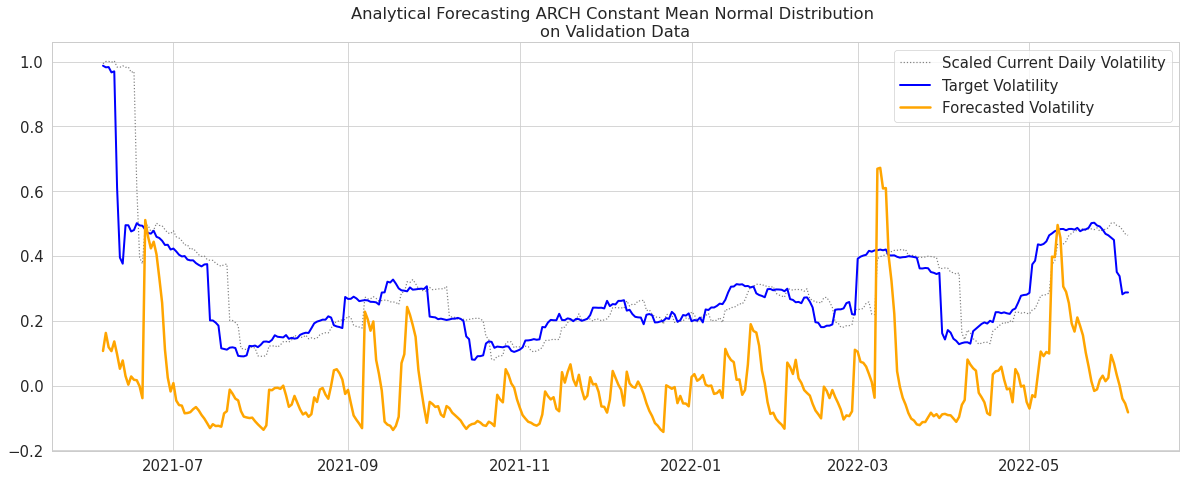

In [101]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, arch_1_preds_scaled, 
          'Analytical Forecasting ARCH Constant Mean Normal Distribution')

In [102]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, gm_1_preds_scaled, 
         'ARCH(1,1), Constant Mean, Normal Dist')

Model  Validation RMSPE  \
0                                           Mean Baseline          0.659298   
1                 GARCH (1,1), Constant Mean, Normal Dist          0.554754   
2  Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist          0.520993   
3                   ARCH(1,1), Constant Mean, Normal Dist          0.554754   

   Validation RMSE  
0         0.139745  
1         0.183075  
2         0.175141  
3         0.183075

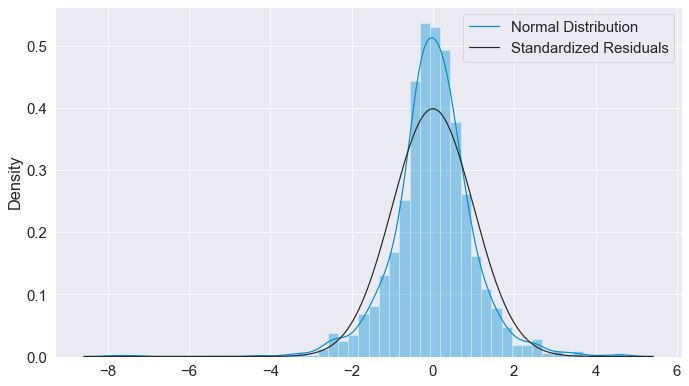

In [103]:
# INSPECTING THE RESIDUALS
gm_resid = result_3.resid
gm_std = result_3.conditional_volatility

# STANDARDIZING RESIDUALS
gm_std_resid = gm_resid / gm_std

# VISUALIZING STANDARDIZED RESIDUALS VS. A NORMAL DISTRIBUTION
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,6))
    sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50)
    plt.legend(('Normal Distribution', 'Standardized Residuals'))
    plt.show();

In [104]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

arch_2 = arch_model(r_train, p=1, q=1,
                 dist='skewt')
result_4 = arch_2.fit(disp='off')
print()
print(result_4.summary())


                           Constant Mean - GARCH Model Results                           
Dep. Variable:                           returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -3815.31
Distribution:      Standardized Skew Student's t   AIC:                           7642.61
Method:                       Maximum Likelihood   BIC:                           7673.51
                                                   No. Observations:                 1275
Date:                           Thu, Aug 18 2022   Df Residuals:                     1274
Time:                                   02:27:27   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
-------------------------------------

In [105]:
def scale_tf_cond_vol(model_result):
    '''
    Scale & Transform Conditional Volatility 
    Estimated by GARCH Models
    '''
    # OBTAIN ESTIMATED CONDITIONAL VOLATILITY FROM MODEL RESULT
    cond_vol = model_result.conditional_volatility

    # INITIATE SCALER
    scaler = MinMaxScaler()

    # FIT SCALER TO MODEL'S ESTIMATED CONDITIONAL VOLATILITY
    scaler = scaler.fit(cond_vol.values.reshape(-1,1))

    scaled_cond_vol = transform_volatility_to_scaler(scaler, cond_vol)
    return scaler, scaled_cond_vol

In [106]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_arch_2, scaled_cond_vol = scale_tf_cond_vol(result_4)

In [107]:
# VISUALIZE MODEL'S ESTIMATED CONDITIONAL VOLATILITY 
# WITH SCALED vol_current CALCULATED ABOVE
def viz_cond_vol(cond_vol_series, model_name):
    with sns.axes_style("darkgrid"):
        fig, ax = plt.subplots(figsize=(18,7))

        ax.plot(x_train_scaled, color='blue', lw=2,
                label=f'Scaled {INTERVAL_WINDOW}-Day Interval Daily Realized Volatility')
        ax.plot(cond_vol_series, color='green', lw=2,
                label=f'Scaled {model_name} Estimated Conditional Volatility')
        ax.set_title('Training Set')
        plt.legend()
        plt.show();

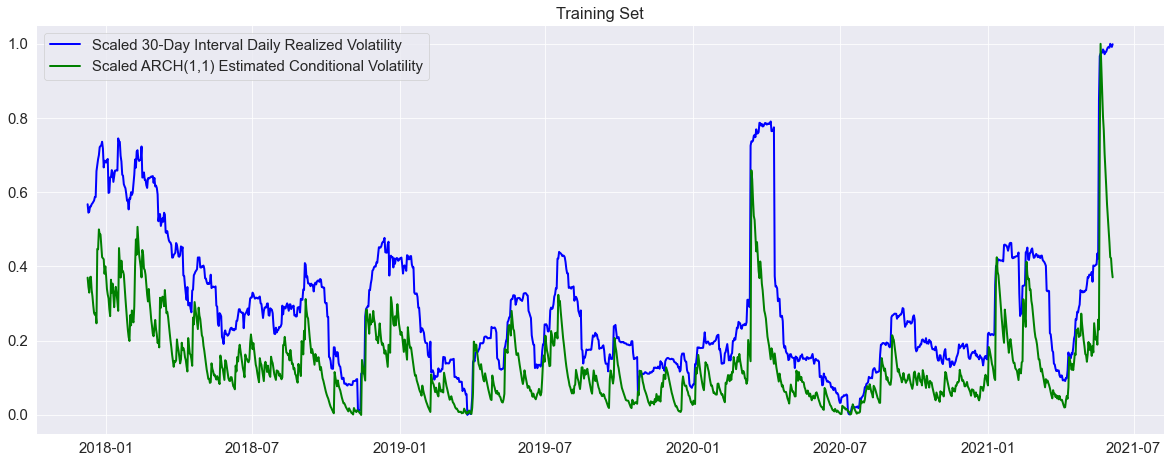

In [108]:
viz_cond_vol(scaled_cond_vol, 'ARCH(1,1)')

In [109]:
# ONE STEP EXPANDING WINDOW FORECAST
# INITIALIZING rolling_forecast
rolling_forecasts = []
idx = df.index

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx]
    
    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, vol='ARCH', p=1, q=1,
                       dist='skewt')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    # GET THE SQRT OF AVERAGE n_future DAYS VARIANCE
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

arch_2_preds = pd.Series(rolling_forecasts, index=val_idx)

In [110]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
arch_2_preds_scaled = transform_volatility_to_scaler(scaler_arch_2, arch_2_preds)

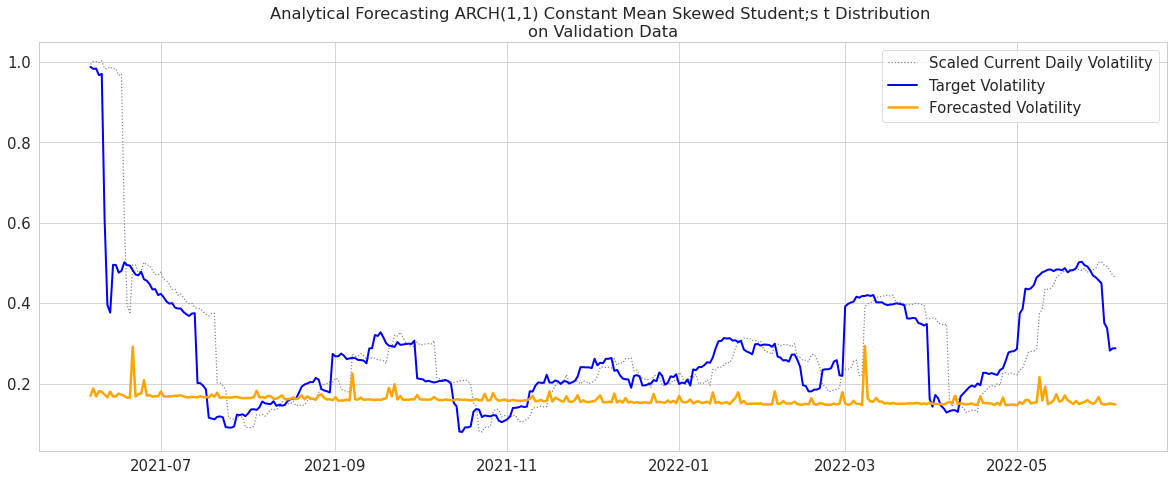

In [111]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, arch_2_preds_scaled, 
          'Analytical Forecasting ARCH(1,1) Constant Mean Skewed Student;s t Distribution')

In [112]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, arch_2_preds_scaled, 
         'ARCH(1,1), Constant Mean, Skewed Student t Dist')

Model  Validation RMSPE  \
0                                           Mean Baseline          0.659298   
1                 GARCH (1,1), Constant Mean, Normal Dist          0.554754   
2  Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist          0.520993   
3                   ARCH(1,1), Constant Mean, Normal Dist          0.554754   
4         ARCH(1,1), Constant Mean, Skewed Student t Dist          0.448152   

   Validation RMSE  
0         0.139745  
1         0.183075  
2         0.175141  
3         0.183075  
4         0.180987

## Model #4- TARCH

In [113]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

t_gm = arch_model(r_train, p=1, o=1, q=1, power=1.0,
                  dist='skewt')
result_5 = t_gm.fit(disp='off')
print(result_5.summary())

                        Constant Mean - TARCH/ZARCH Model Results                        
Dep. Variable:                           returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           TARCH/ZARCH   Log-Likelihood:               -3812.83
Distribution:      Standardized Skew Student's t   AIC:                           7639.65
Method:                       Maximum Likelihood   BIC:                           7675.71
                                                   No. Observations:                 1275
Date:                           Thu, Aug 18 2022   Df Residuals:                     1274
Time:                                   02:27:49   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
--------------------------------------------

In [114]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_tarch, scaled_tarch_cond_vol = scale_tf_cond_vol(result_5)

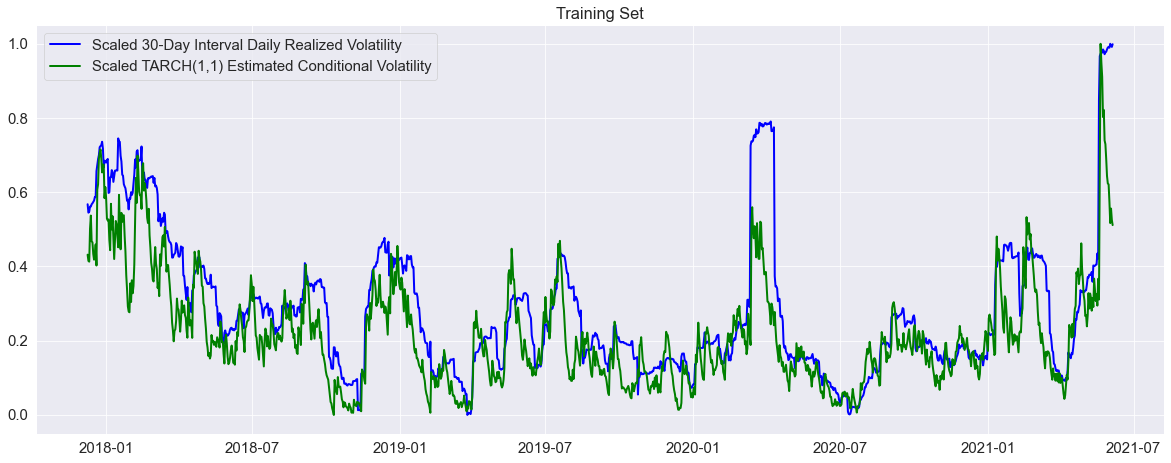

In [115]:
viz_cond_vol(scaled_tarch_cond_vol, 'TARCH(1,1)')

TARCH models do not have closed-form (analytical) forecasts for horizons larger than 1, and so simulation or bootstrapping is required.

Bootstrap-based forecasts are nearly identical to simulation-based forecasts except that the values used to simulate the process are computed from historical data rather than using the assumed distribution of the residuals. Forecasts produced using this method also return an ARCHModelForecastSimulation containing information about the simulated paths.

In [116]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, o=1, q=1, power=1.0,
                       dist='skewt')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING BOOTSTRAP METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False,
                             method='bootstrap').variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

t_bs_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

TARCH one-step forecasting seems to produce some convergence issues. I still want to look at the results though.

In [117]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
t_bs_preds_scaled = transform_volatility_to_scaler(scaler_tarch, t_bs_preds)

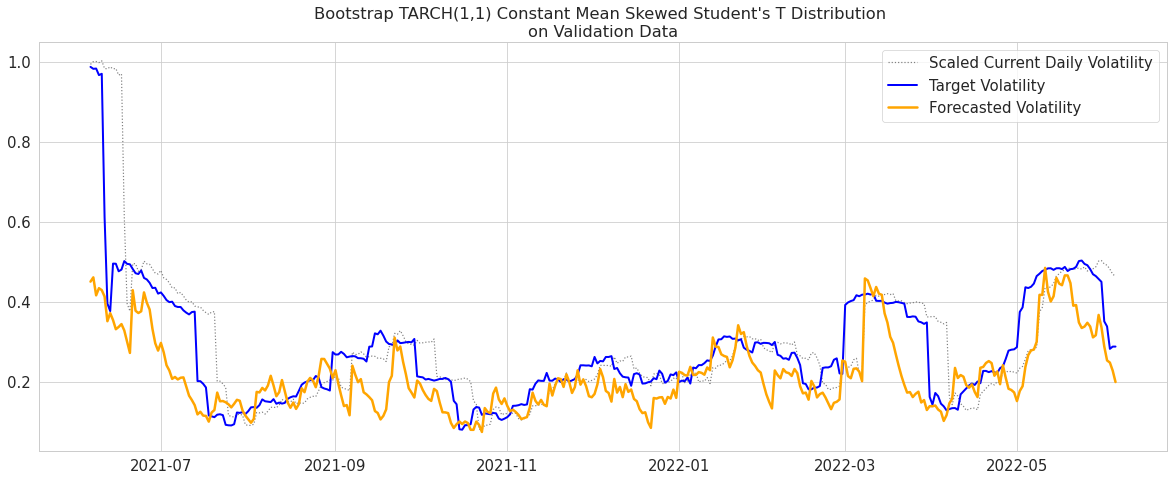

In [118]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, t_bs_preds_scaled, 
          "Bootstrap TARCH(1,1) Constant Mean Skewed Student's T Distribution")

In [119]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, t_bs_preds_scaled, 
         "Bootstrap TARCH(1,1), Constant Mean, Skewt Dist")

Model  Validation RMSPE  \
0                                           Mean Baseline          0.659298   
1                 GARCH (1,1), Constant Mean, Normal Dist          0.554754   
2  Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist          0.520993   
3                   ARCH(1,1), Constant Mean, Normal Dist          0.554754   
4         ARCH(1,1), Constant Mean, Skewed Student t Dist          0.448152   
5         Bootstrap TARCH(1,1), Constant Mean, Skewt Dist          0.302612   

   Validation RMSE  
0         0.139745  
1         0.183075  
2         0.175141  
3         0.183075  
4         0.180987  
5         0.109863

## Simulation-based Forecasting for TARCH (1,1)

In [120]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, o=1, q=1, power=1.0,
                       dist='skewt')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING SIMULATION METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False,
                             method='simulation').variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

t_sm_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [121]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
t_sm_preds_scaled = transform_volatility_to_scaler(scaler_tarch, t_sm_preds)

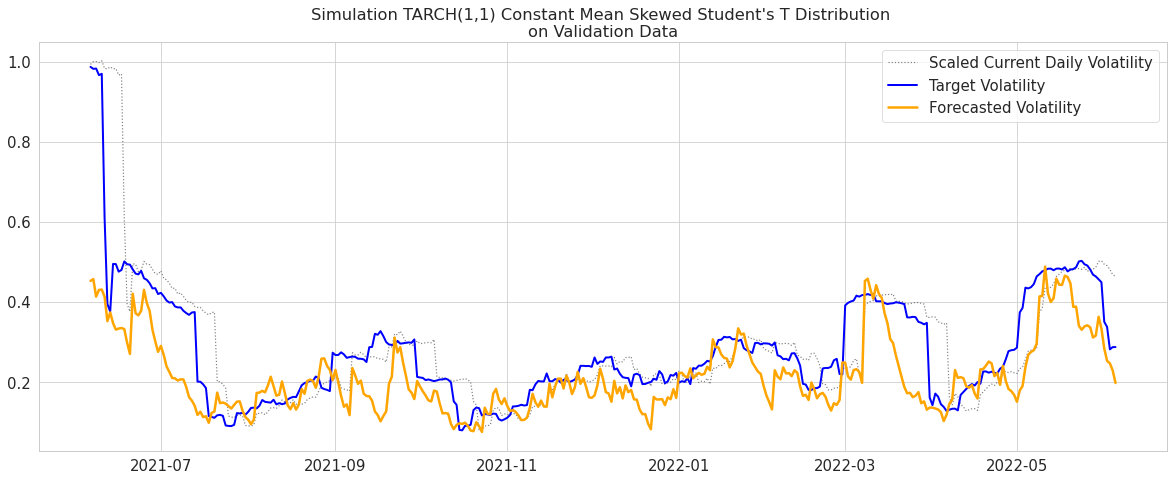

In [122]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, t_sm_preds_scaled, 
          "Simulation TARCH(1,1) Constant Mean Skewed Student's T Distribution")

In [123]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, t_sm_preds_scaled, 
         "Simulation TARCH(1,1), Constant Mean, Skewt Dist")

Model  Validation RMSPE  \
0                                           Mean Baseline          0.659298   
1                 GARCH (1,1), Constant Mean, Normal Dist          0.554754   
2  Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist          0.520993   
3                   ARCH(1,1), Constant Mean, Normal Dist          0.554754   
4         ARCH(1,1), Constant Mean, Skewed Student t Dist          0.448152   
5         Bootstrap TARCH(1,1), Constant Mean, Skewt Dist          0.302612   
6        Simulation TARCH(1,1), Constant Mean, Skewt Dist          0.303471   

   Validation RMSE  
0         0.139745  
1         0.183075  
2         0.175141  
3         0.183075  
4         0.180987  
5         0.109863  
6         0.110372

Among the 2 forecasting methods, bootstrap seems to perform better on TARCH(1,1). It's probably because bootstrap uses historical data in to compute rather than using the assumed distribution of the residuals.

## Model #4- EGARCH

In [124]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

egarch_gm = arch_model(r_train, p=1, q=1, o=1, 
                    vol='EGARCH', dist='skewt')
result_6 = egarch_gm.fit(disp='off')
print(result_6.summary())

                           Constant Mean - EGARCH Model Results                          
Dep. Variable:                           returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                EGARCH   Log-Likelihood:               -3812.01
Distribution:      Standardized Skew Student's t   AIC:                           7638.01
Method:                       Maximum Likelihood   BIC:                           7674.07
                                                   No. Observations:                 1275
Date:                           Thu, Aug 18 2022   Df Residuals:                     1274
Time:                                   02:29:04   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
--------------------------------------

In [125]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_egarch, scaled_egarch_cond_vol = scale_tf_cond_vol(result_6)

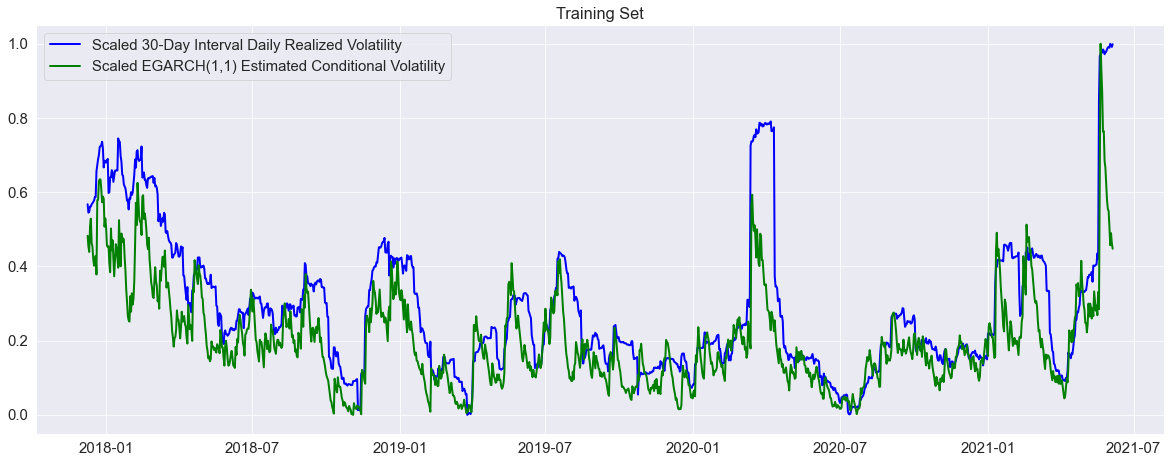

In [126]:
viz_cond_vol(scaled_egarch_cond_vol, 'EGARCH(1,1)')

In [127]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, o=1, q=1,
                       dist='skewt')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING SIMULATION METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

e_sm_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [128]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
e_sm_preds_scaled = transform_volatility_to_scaler(scaler_egarch, e_sm_preds)

In [129]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
#e_sm_preds_scaled = transform_volatility_to_scaler(scaler_tarch, e_sm_preds)

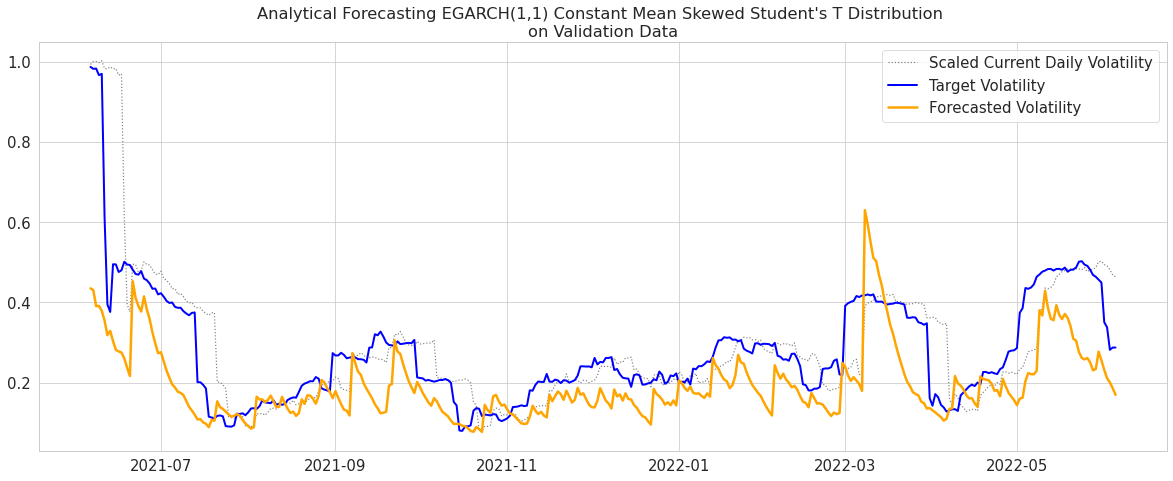

In [130]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, e_sm_preds_scaled, 
          "Analytical Forecasting EGARCH(1,1) Constant Mean Skewed Student's T Distribution")

In [131]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, e_sm_preds_scaled, 
         "Analytical EGARCH(1,1), Constant Mean, Skewt Dist")

Model  Validation RMSPE  \
0                                           Mean Baseline          0.659298   
1                 GARCH (1,1), Constant Mean, Normal Dist          0.554754   
2  Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist          0.520993   
3                   ARCH(1,1), Constant Mean, Normal Dist          0.554754   
4         ARCH(1,1), Constant Mean, Skewed Student t Dist          0.448152   
5         Bootstrap TARCH(1,1), Constant Mean, Skewt Dist          0.302612   
6        Simulation TARCH(1,1), Constant Mean, Skewt Dist          0.303471   
7       Analytical EGARCH(1,1), Constant Mean, Skewt Dist          0.338984   

   Validation RMSE  
0         0.139745  
1         0.183075  
2         0.175141  
3         0.183075  
4         0.180987  
5         0.109863  
6         0.110372  
7         0.126899

In [132]:
perf_df.sort_values(by='Validation RMSPE', ascending=True)

Model  Validation RMSPE  \
5         Bootstrap TARCH(1,1), Constant Mean, Skewt Dist          0.302612   
6        Simulation TARCH(1,1), Constant Mean, Skewt Dist          0.303471   
7       Analytical EGARCH(1,1), Constant Mean, Skewt Dist          0.338984   
4         ARCH(1,1), Constant Mean, Skewed Student t Dist          0.448152   
2  Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist          0.520993   
1                 GARCH (1,1), Constant Mean, Normal Dist          0.554754   
3                   ARCH(1,1), Constant Mean, Normal Dist          0.554754   
0                                           Mean Baseline          0.659298   

   Validation RMSE  
5         0.109863  
6         0.110372  
7         0.126899  
4         0.180987  
2         0.175141  
1         0.183075  
3         0.183075  
0         0.139745

In [133]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

arch_2 = arch_model(r_train,vol='ARCH', p=1,
                   dist='t')
result_7 = arch_2.fit(disp='off')
print()
print(result_7.summary())


                         Constant Mean - ARCH Model Results                         
Dep. Variable:                      returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -3869.02
Distribution:      Standardized Student's t   AIC:                           7746.04
Method:                  Maximum Likelihood   BIC:                           7766.64
                                              No. Observations:                 1275
Date:                      Thu, Aug 18 2022   Df Residuals:                     1274
Time:                              02:29:38   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu    

In [134]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_arch, scaled_cond_vol = scale_tf_cond_vol(result_7)

In [135]:
# VISUALIZE MODEL'S ESTIMATED CONDITIONAL VOLATILITY 
# WITH SCALED vol_current CALCULATED ABOVE
def viz_cond_vol(cond_vol_series, model_name):
    with sns.axes_style("darkgrid"):
        fig, ax = plt.subplots(figsize=(18,7))

        ax.plot(x_train_scaled, color='blue', lw=2,
                label=f'Scaled {INTERVAL_WINDOW}-Day Interval Daily Realized Volatility')
        ax.plot(cond_vol_series, color='green', lw=2,
                label=f'Scaled {model_name} Estimated Conditional Volatility')
        ax.set_title('Training Set')
        plt.legend()
        plt.show();

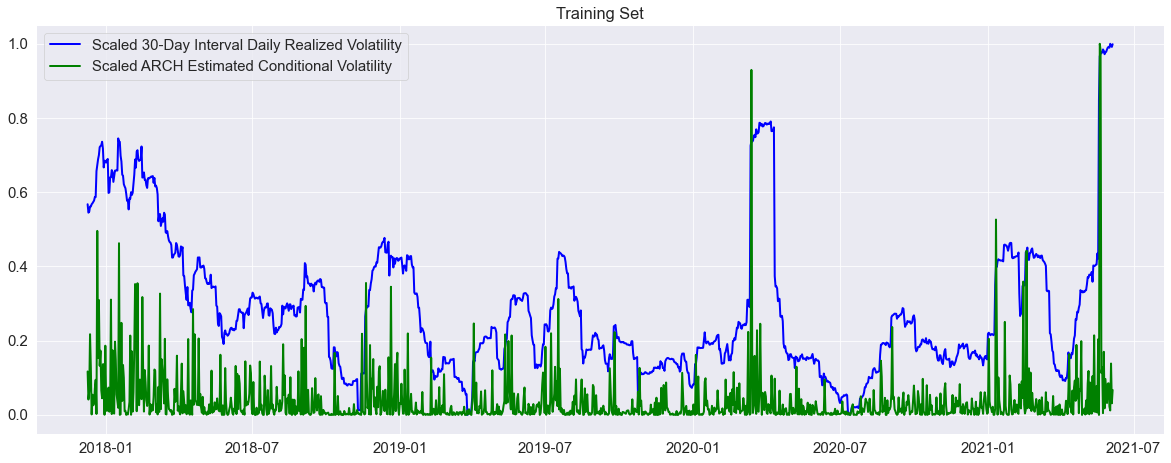

In [136]:
viz_cond_vol(scaled_cond_vol, 'ARCH')

In [137]:
# ONE STEP EXPANDING WINDOW FORECAST
# INITIALIZING rolling_forecast
rolling_forecasts = []
idx = df.index

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx]
    
    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, vol='ARCH', p=1,
                       dist='t')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    # GET THE SQRT OF AVERAGE n_future DAYS VARIANCE
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

arch_2_preds = pd.Series(rolling_forecasts, index=val_idx)

In [138]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
arch_2_preds_scaled = transform_volatility_to_scaler(scaler_arch, arch_2_preds)

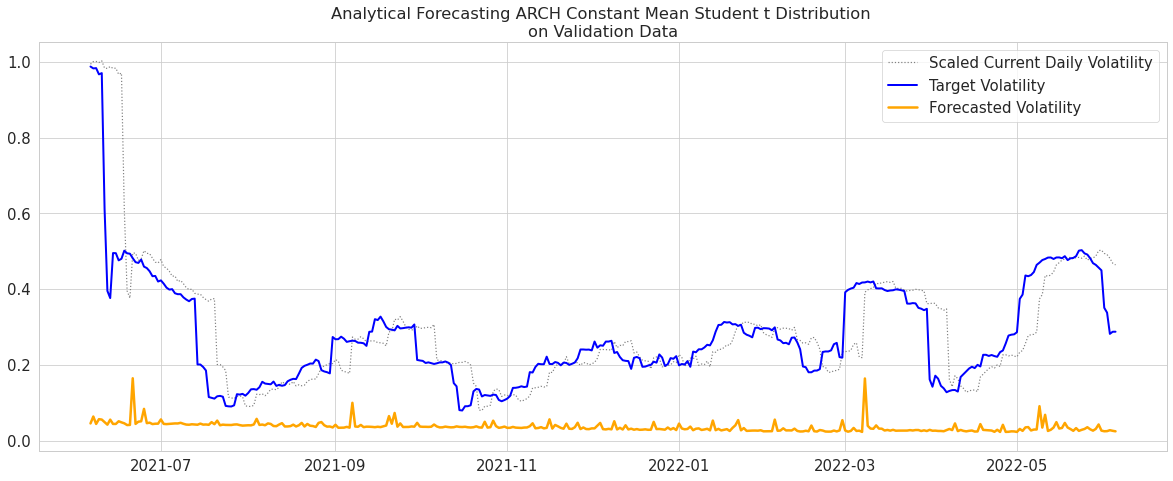

In [139]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, arch_2_preds_scaled, 
          'Analytical Forecasting ARCH Constant Mean Student t Distribution')

In [140]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, arch_2_preds_scaled, 
         'ARCH, Constant Mean, Student t Dist')

Model  Validation RMSPE  \
0                                           Mean Baseline          0.659298   
1                 GARCH (1,1), Constant Mean, Normal Dist          0.554754   
2  Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist          0.520993   
3                   ARCH(1,1), Constant Mean, Normal Dist          0.554754   
4         ARCH(1,1), Constant Mean, Skewed Student t Dist          0.448152   
5         Bootstrap TARCH(1,1), Constant Mean, Skewt Dist          0.302612   
6        Simulation TARCH(1,1), Constant Mean, Skewt Dist          0.303471   
7       Analytical EGARCH(1,1), Constant Mean, Skewt Dist          0.338984   
8                     ARCH, Constant Mean, Student t Dist          0.842267   

   Validation RMSE  
0         0.139745  
1         0.183075  
2         0.175141  
3         0.183075  
4         0.180987  
5         0.109863  
6         0.110372  
7         0.126899  
8         0.277471

In [141]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

arch_3 = arch_model(r_train,vol='ARCH', p=1,
                   dist='skewt')
result_8 = arch_3.fit(disp='off')
print()
print(result_8.summary())


                            Constant Mean - ARCH Model Results                           
Dep. Variable:                           returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                  ARCH   Log-Likelihood:               -3868.85
Distribution:      Standardized Skew Student's t   AIC:                           7747.70
Method:                       Maximum Likelihood   BIC:                           7773.45
                                                   No. Observations:                 1275
Date:                           Thu, Aug 18 2022   Df Residuals:                     1274
Time:                                   02:29:56   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------

In [142]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_arch, scaled_cond_vol = scale_tf_cond_vol(result_8)

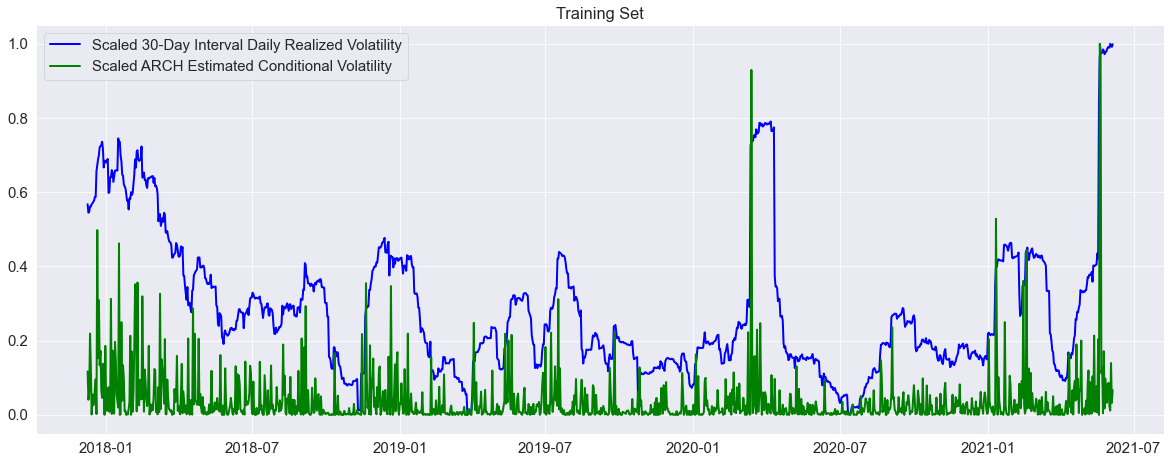

In [143]:
viz_cond_vol(scaled_cond_vol, 'ARCH')

In [144]:
# ONE STEP EXPANDING WINDOW FORECAST
# INITIALIZING rolling_forecast
rolling_forecasts = []
idx = df.index

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx]
    
    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, vol='ARCH', p=1,
                       dist='skewt')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    # GET THE SQRT OF AVERAGE n_future DAYS VARIANCE
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

arch_3_preds = pd.Series(rolling_forecasts, index=val_idx)

In [145]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
arch_3_preds_scaled = transform_volatility_to_scaler(scaler_arch, arch_3_preds)

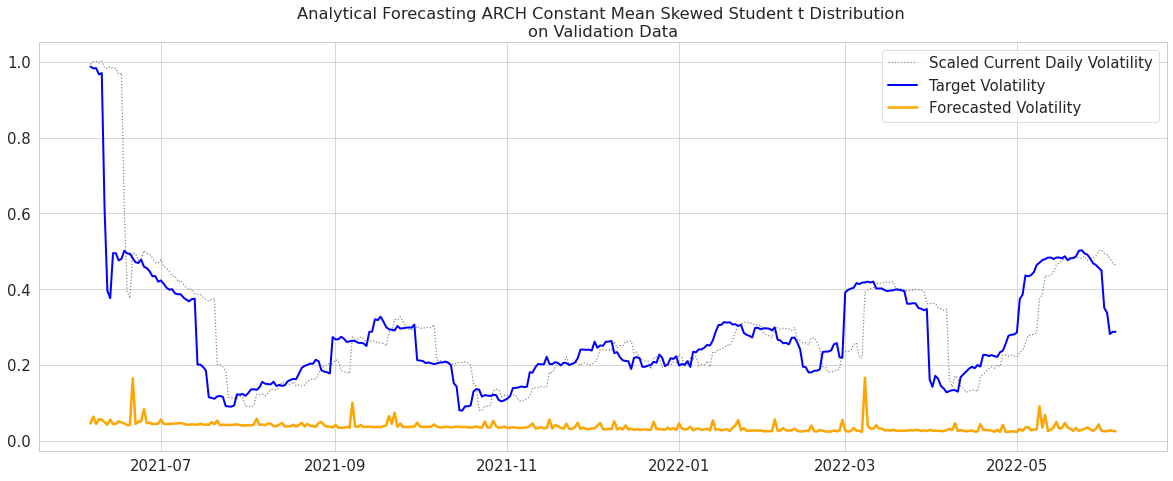

In [146]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, arch_3_preds_scaled, 
          'Analytical Forecasting ARCH Constant Mean Skewed Student t Distribution')

In [147]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, arch_3_preds_scaled, 
         'ARCH, Constant Mean,Skewed Student t Dist')

Model  Validation RMSPE  \
0                                           Mean Baseline          0.659298   
1                 GARCH (1,1), Constant Mean, Normal Dist          0.554754   
2  Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist          0.520993   
3                   ARCH(1,1), Constant Mean, Normal Dist          0.554754   
4         ARCH(1,1), Constant Mean, Skewed Student t Dist          0.448152   
5         Bootstrap TARCH(1,1), Constant Mean, Skewt Dist          0.302612   
6        Simulation TARCH(1,1), Constant Mean, Skewt Dist          0.303471   
7       Analytical EGARCH(1,1), Constant Mean, Skewt Dist          0.338984   
8                     ARCH, Constant Mean, Student t Dist          0.842267   
9               ARCH, Constant Mean,Skewed Student t Dist          0.840806   

   Validation RMSE  
0         0.139745  
1         0.183075  
2         0.175141  
3         0.183075  
4         0.180987  
5         0.109863  
6         0.110372  
7         0.126899  
8         0.277471  
9         0.277167

In [148]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

gm_3 = arch_model(r_train, p=1, q=1,
                 dist='t')
result_9 = gm_3.fit(disp='off')
print()
print(result_9.summary())


                        Constant Mean - GARCH Model Results                         
Dep. Variable:                      returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -3815.40
Distribution:      Standardized Student's t   AIC:                           7640.79
Method:                  Maximum Likelihood   BIC:                           7666.55
                                              No. Observations:                 1275
Date:                      Thu, Aug 18 2022   Df Residuals:                     1274
Time:                              02:30:18   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu    

In [149]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_garch, scaled_cond_vol = scale_tf_cond_vol(result_9)

In [150]:
# VISUALIZE MODEL'S ESTIMATED CONDITIONAL VOLATILITY 
# WITH SCALED vol_current CALCULATED ABOVE
def viz_cond_vol(cond_vol_series, model_name):
    with sns.axes_style("darkgrid"):
        fig, ax = plt.subplots(figsize=(18,7))

        ax.plot(x_train_scaled, color='blue', lw=2,
                label=f'Scaled {INTERVAL_WINDOW}-Day Interval Daily Realized Volatility')
        ax.plot(cond_vol_series, color='green', lw=2,
                label=f'Scaled {model_name} Estimated Conditional Volatility')
        ax.set_title('Training Set')
        plt.legend()
        plt.show();

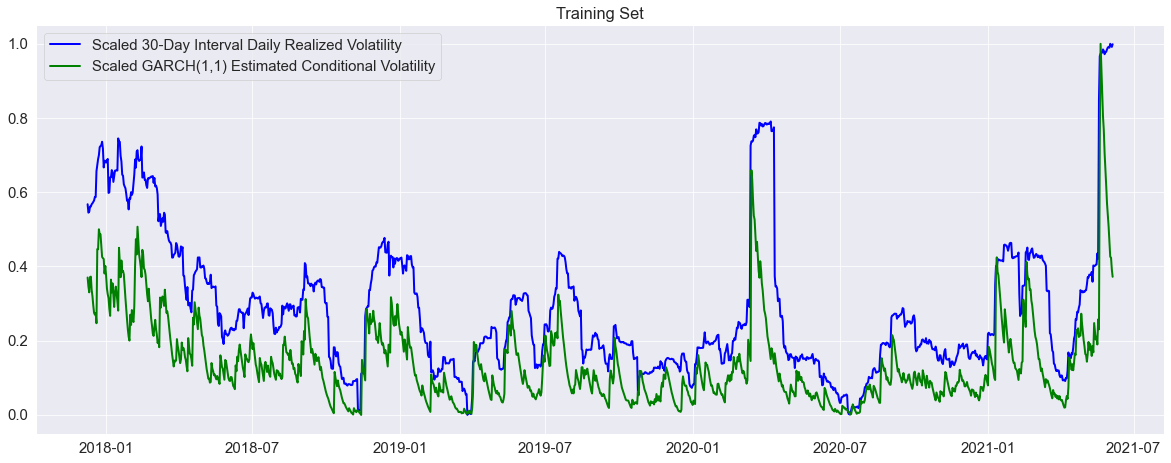

In [151]:
viz_cond_vol(scaled_cond_vol, 'GARCH(1,1)')

In [152]:
# ONE STEP EXPANDING WINDOW FORECAST
# INITIALIZING rolling_forecast
rolling_forecasts = []
idx = df.index

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx]
    
    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, vol='GARCH', p=1, q=1,
                       dist='t')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    # GET THE SQRT OF AVERAGE n_future DAYS VARIANCE
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

gm_3_preds = pd.Series(rolling_forecasts, index=val_idx)

In [153]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
gm_3_preds_scaled = transform_volatility_to_scaler(scaler_garch, gm_3_preds)

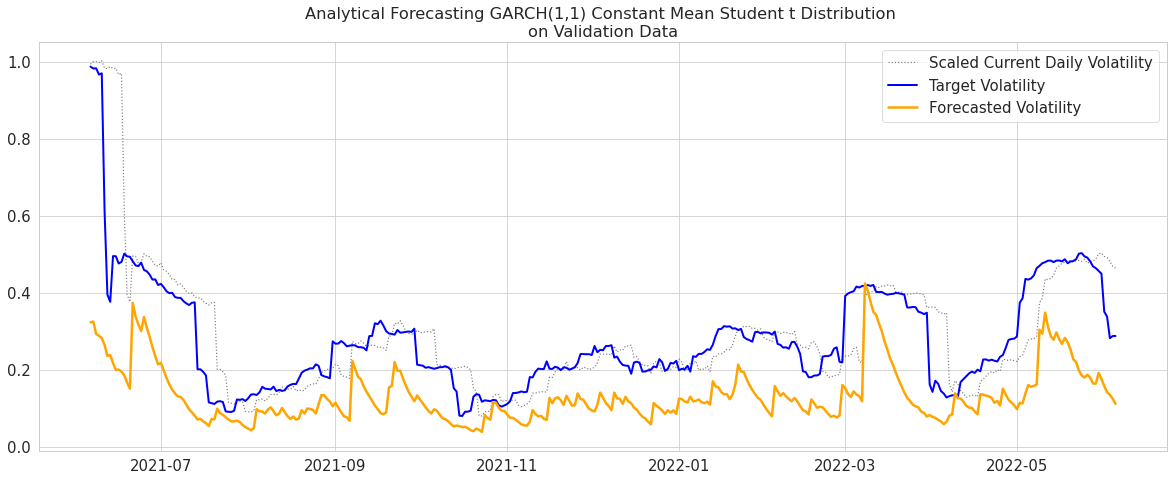

In [154]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, gm_3_preds_scaled, 
          'Analytical Forecasting GARCH(1,1) Constant Mean Student t Distribution')

In [155]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, gm_3_preds_scaled, 
         'GARCH(1,1), Constant Mean, Student t Dist')

Model  Validation RMSPE  \
0                                            Mean Baseline          0.659298   
1                  GARCH (1,1), Constant Mean, Normal Dist          0.554754   
2   Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist          0.520993   
3                    ARCH(1,1), Constant Mean, Normal Dist          0.554754   
4          ARCH(1,1), Constant Mean, Skewed Student t Dist          0.448152   
5          Bootstrap TARCH(1,1), Constant Mean, Skewt Dist          0.302612   
6         Simulation TARCH(1,1), Constant Mean, Skewt Dist          0.303471   
7        Analytical EGARCH(1,1), Constant Mean, Skewt Dist          0.338984   
8                      ARCH, Constant Mean, Student t Dist          0.842267   
9                ARCH, Constant Mean,Skewed Student t Dist          0.840806   
10               GARCH(1,1), Constant Mean, Student t Dist          0.522773   

    Validation RMSE  
0          0.139745  
1          0.183075  
2          0.175141  
3          0.183075  
4          0.180987  
5          0.109863  
6          0.110372  
7          0.126899  
8          0.277471  
9          0.277167  
10         0.174257

In [156]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

gjr_gm1 = arch_model(r_train, p=1, q=1, o=1, 
                    vol='GARCH')
result_10 = gjr_gm1.fit(disp='off')
print(result_10.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3895.67
Distribution:                  Normal   AIC:                           7801.34
Method:            Maximum Likelihood   BIC:                           7827.09
                                        No. Observations:                 1275
Date:                Thu, Aug 18 2022   Df Residuals:                     1274
Time:                        02:30:35   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1946      0.128      1.519      0.129 [-5.65

In [157]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_gjr, scaled_gjr_cond_vol = scale_tf_cond_vol(result_10)

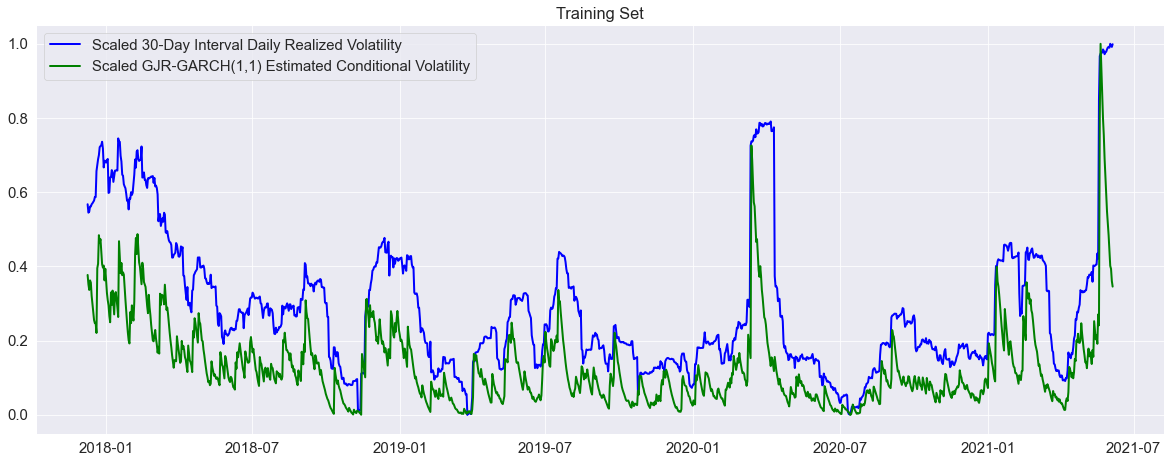

In [158]:
viz_cond_vol(scaled_gjr_cond_vol, 'GJR-GARCH(1,1)')

In [159]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, q=1, o=1, 
                       vol='GARCH')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

gjr_2_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [160]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
gjr_2_preds_scaled = transform_volatility_to_scaler(scaler_gjr, gjr_2_preds)

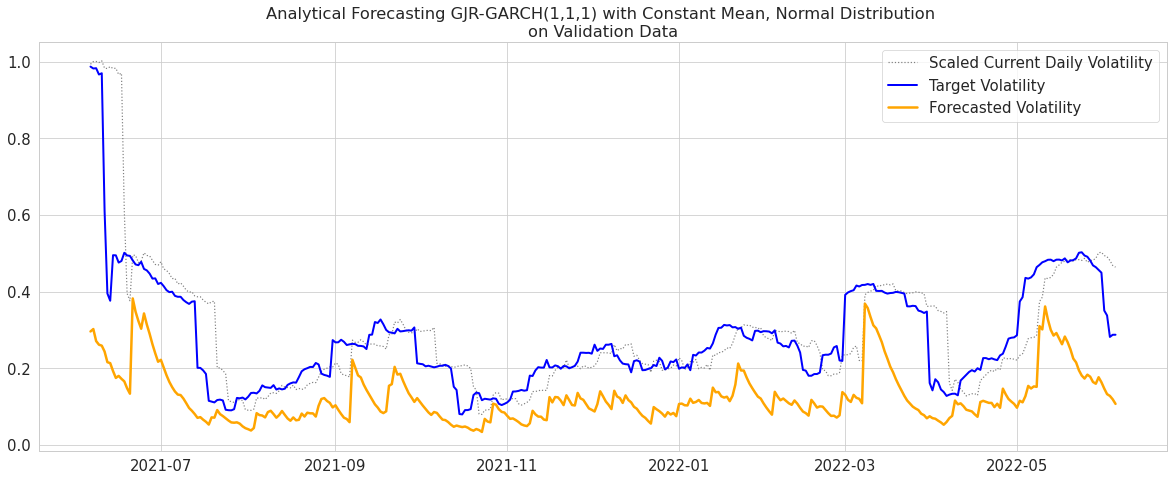

In [161]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, gjr_2_preds_scaled, 
          "Analytical Forecasting GJR-GARCH(1,1,1) with Constant Mean, Normal Distribution")

In [162]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, gjr_2_preds_scaled, 
         "Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist")

Model  Validation RMSPE  \
0                                             Mean Baseline          0.659298   
1                   GARCH (1,1), Constant Mean, Normal Dist          0.554754   
2    Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist          0.520993   
3                     ARCH(1,1), Constant Mean, Normal Dist          0.554754   
4           ARCH(1,1), Constant Mean, Skewed Student t Dist          0.448152   
5           Bootstrap TARCH(1,1), Constant Mean, Skewt Dist          0.302612   
6          Simulation TARCH(1,1), Constant Mean, Skewt Dist          0.303471   
7         Analytical EGARCH(1,1), Constant Mean, Skewt Dist          0.338984   
8                       ARCH, Constant Mean, Student t Dist          0.842267   
9                 ARCH, Constant Mean,Skewed Student t Dist          0.840806   
10                GARCH(1,1), Constant Mean, Student t Dist          0.522773   
11  Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist          0.552331   

    Validation RMSE  
0          0.139745  
1          0.183075  
2          0.175141  
3          0.183075  
4          0.180987  
5          0.109863  
6          0.110372  
7          0.126899  
8          0.277471  
9          0.277167  
10         0.174257  
11         0.181174

In [163]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

gjr_gm2 = arch_model(r_train, p=1, q=1, o=1, 
                    vol='GARCH',dist='t')
result_11 = gjr_gm2.fit(disp='off')
print(result_11.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                      returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -3814.51
Distribution:      Standardized Student's t   AIC:                           7641.01
Method:                  Maximum Likelihood   BIC:                           7671.92
                                              No. Observations:                 1275
Date:                      Thu, Aug 18 2022   Df Residuals:                     1274
Time:                              02:30:50   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [164]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_gjr, scaled_gjr_cond_vol = scale_tf_cond_vol(result_11)

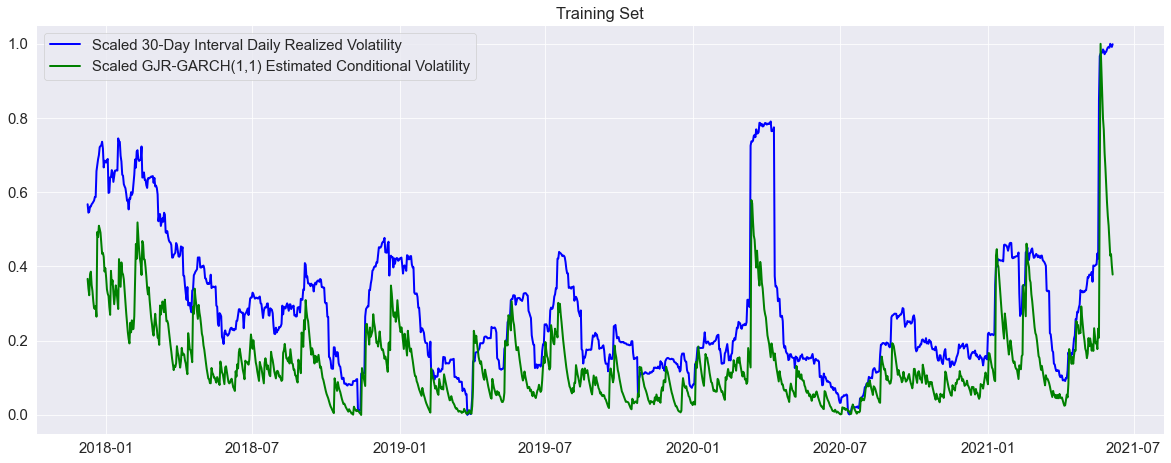

In [165]:
viz_cond_vol(scaled_gjr_cond_vol, 'GJR-GARCH(1,1)')

In [166]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, q=1, o=1, 
                       vol='GARCH',dist='t')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

gjr_3_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [167]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
gjr_3_preds_scaled = transform_volatility_to_scaler(scaler_gjr, gjr_3_preds)

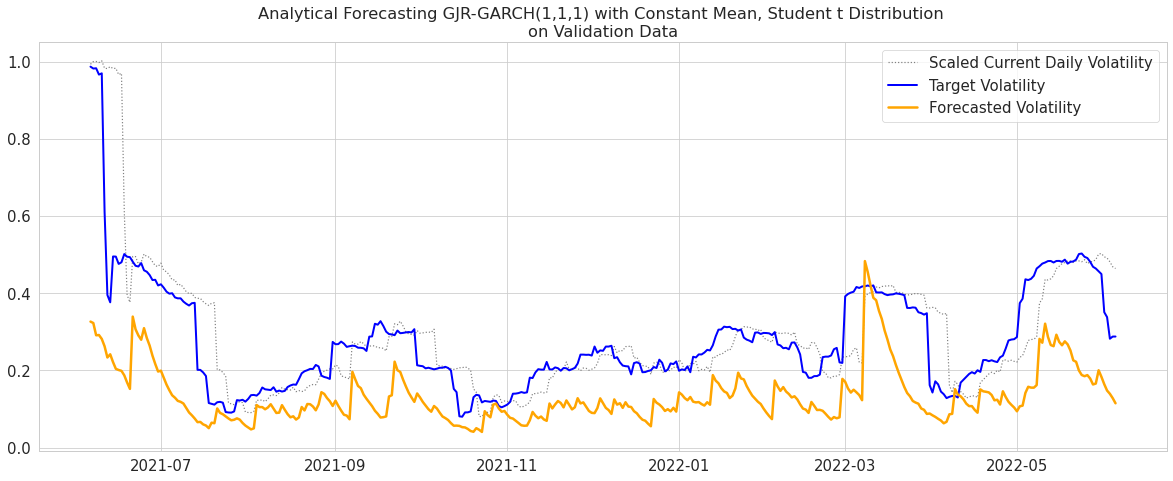

In [168]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, gjr_3_preds_scaled, 
          "Analytical Forecasting GJR-GARCH(1,1,1) with Constant Mean, Student t Distribution")

In [169]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, gjr_3_preds_scaled, 
         "Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist")

Model  \
0                                                Mean Baseline   
1                      GARCH (1,1), Constant Mean, Normal Dist   
2       Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                        ARCH(1,1), Constant Mean, Normal Dist   
4              ARCH(1,1), Constant Mean, Skewed Student t Dist   
5              Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6             Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7            Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                          ARCH, Constant Mean, Student t Dist   
9                    ARCH, Constant Mean,Skewed Student t Dist   
10                   GARCH(1,1), Constant Mean, Student t Dist   
11     Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12  Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726

## TARCH

In [170]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

t_gm1 = arch_model(r_train, p=1, o=1, q=1, power=1.0)
result_12 = t_gm1.fit(disp='off')
print(result_12.summary())

                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -3898.75
Distribution:                  Normal   AIC:                           7807.51
Method:            Maximum Likelihood   BIC:                           7833.26
                                        No. Observations:                 1275
Date:                Thu, Aug 18 2022   Df Residuals:                     1274
Time:                        02:31:13   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2482  1.813e-03    136.879      0.000 [  0.245,  0.25

In [171]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_tarch, scaled_tarch_cond_vol = scale_tf_cond_vol(result_12)

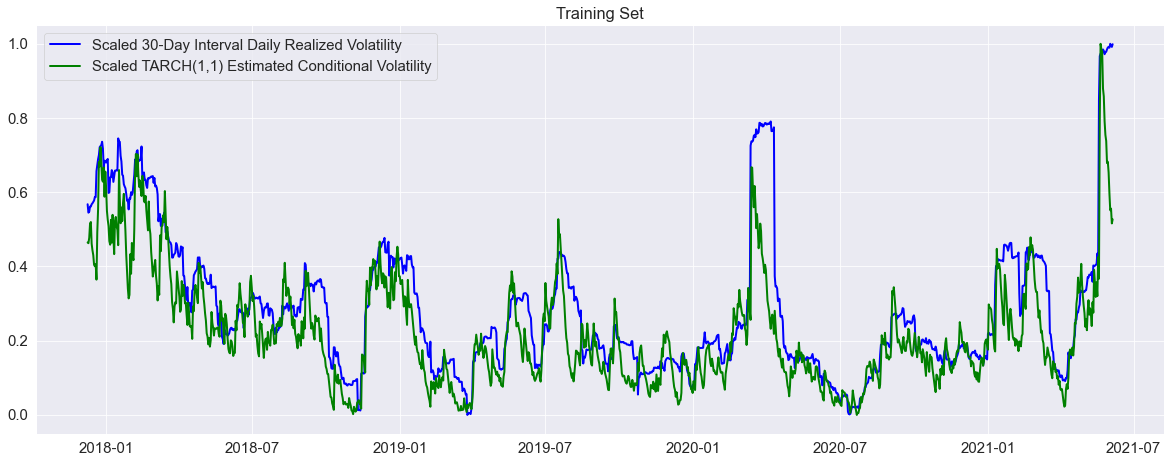

In [172]:
viz_cond_vol(scaled_tarch_cond_vol, 'TARCH(1,1)')

In [173]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, o=1, q=1, power=1.0)
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING BOOTSTRAP METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False,
                            method='bootstrap').variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

t_bs1_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [174]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
t_bs1_preds_scaled = transform_volatility_to_scaler(scaler_tarch, t_bs1_preds)

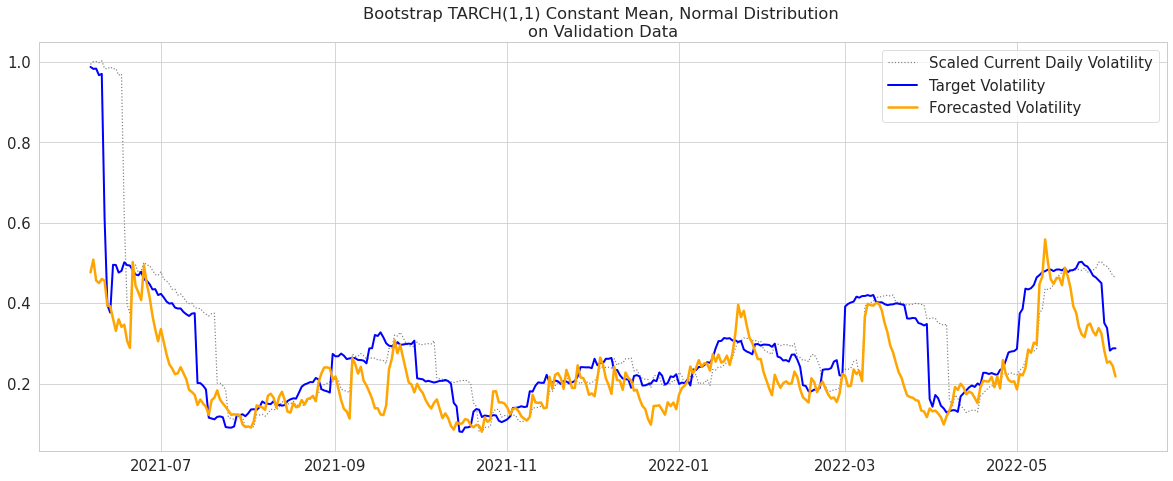

In [175]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, t_bs1_preds_scaled, 
          "Bootstrap TARCH(1,1) Constant Mean, Normal Distribution")

In [176]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, t_bs1_preds_scaled, 
         "Bootstrap TARCH(1,1), Constant Mean, Normal Dist")

Model  \
0                                                Mean Baseline   
1                      GARCH (1,1), Constant Mean, Normal Dist   
2       Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                        ARCH(1,1), Constant Mean, Normal Dist   
4              ARCH(1,1), Constant Mean, Skewed Student t Dist   
5              Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6             Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7            Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                          ARCH, Constant Mean, Student t Dist   
9                    ARCH, Constant Mean,Skewed Student t Dist   
10                   GARCH(1,1), Constant Mean, Student t Dist   
11     Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12  Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   
13            Bootstrap TARCH(1,1), Constant Mean, Normal Dist   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726  
13          0.281446         0.103197

In [177]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, o=1, q=1, power=1.0)
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING SIMULATION METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False,
                             method='simulation').variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

t_sm1_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [178]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
t_sm1_preds_scaled = transform_volatility_to_scaler(scaler_tarch, t_sm1_preds)

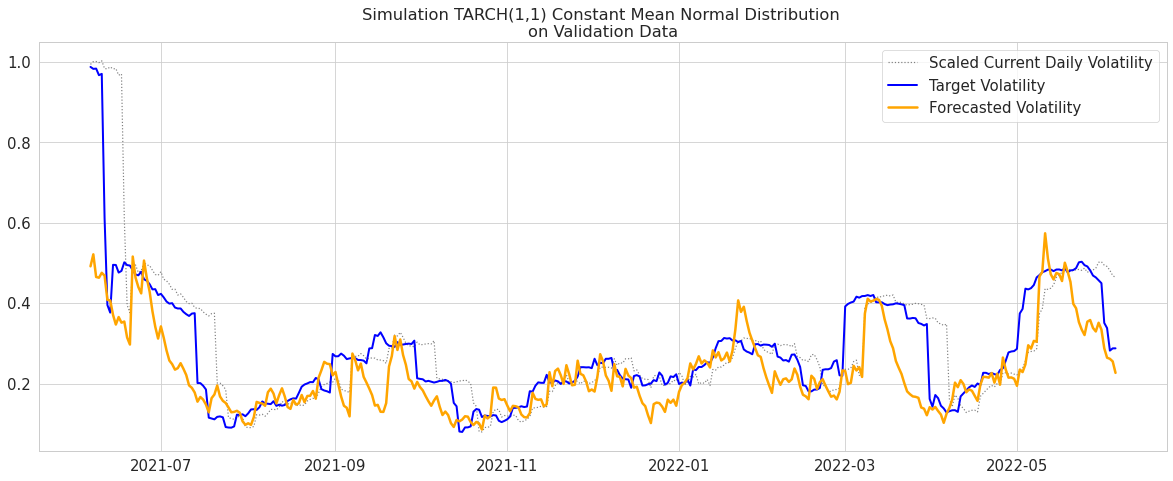

In [179]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, t_sm1_preds_scaled, 
          "Simulation TARCH(1,1) Constant Mean Normal Distribution")

In [180]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, t_sm1_preds_scaled, 
         "Simulation TARCH(1,1), Constant Mean, Normal Dist")

Model  \
0                                                Mean Baseline   
1                      GARCH (1,1), Constant Mean, Normal Dist   
2       Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                        ARCH(1,1), Constant Mean, Normal Dist   
4              ARCH(1,1), Constant Mean, Skewed Student t Dist   
5              Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6             Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7            Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                          ARCH, Constant Mean, Student t Dist   
9                    ARCH, Constant Mean,Skewed Student t Dist   
10                   GARCH(1,1), Constant Mean, Student t Dist   
11     Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12  Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   
13            Bootstrap TARCH(1,1), Constant Mean, Normal Dist   
14           Simulation TARCH(1,1), Constant Mean, Normal Dist   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726  
13          0.281446         0.103197  
14          0.273308         0.098561

In [181]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

t_gm2 = arch_model(r_train, p=1, o=1, q=1, power=1.0,dist='t')
result_13 = t_gm2.fit(disp='off')
print(result_13.summary())

                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                      returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -3812.85
Distribution:      Standardized Student's t   AIC:                           7637.70
Method:                  Maximum Likelihood   BIC:                           7668.60
                                              No. Observations:                 1275
Date:                      Thu, Aug 18 2022   Df Residuals:                     1274
Time:                              02:31:49   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [182]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_tarch, scaled_tarch_cond_vol = scale_tf_cond_vol(result_13)

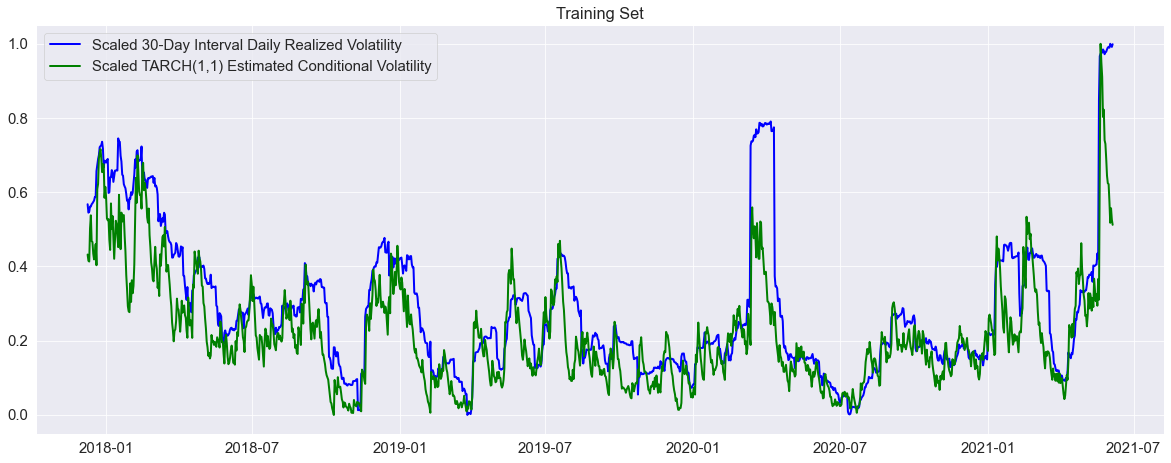

In [183]:
viz_cond_vol(scaled_tarch_cond_vol, 'TARCH(1,1)')

In [184]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, o=1, q=1, power=1.0,dist='t')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING BOOTSTRAP METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False,
                            method='bootstrap').variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

t_bs2_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [185]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
t_bs2_preds_scaled = transform_volatility_to_scaler(scaler_tarch, t_bs2_preds)

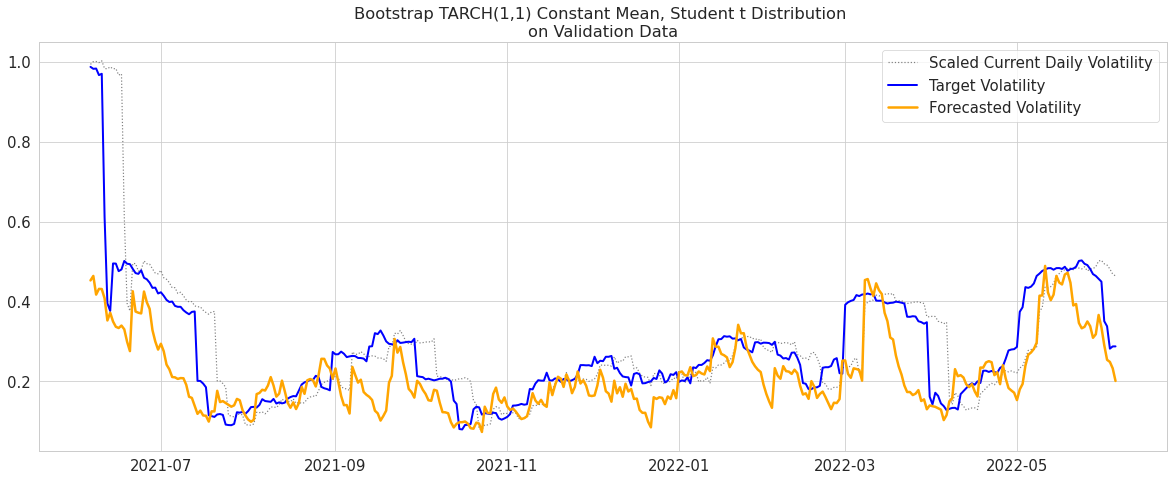

In [186]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, t_bs2_preds_scaled, 
          "Bootstrap TARCH(1,1) Constant Mean, Student t Distribution")

In [187]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, t_bs2_preds_scaled, 
         "Bootstrap TARCH(1,1), Constant Mean, Student Dist")

Model  \
0                                                Mean Baseline   
1                      GARCH (1,1), Constant Mean, Normal Dist   
2       Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                        ARCH(1,1), Constant Mean, Normal Dist   
4              ARCH(1,1), Constant Mean, Skewed Student t Dist   
5              Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6             Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7            Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                          ARCH, Constant Mean, Student t Dist   
9                    ARCH, Constant Mean,Skewed Student t Dist   
10                   GARCH(1,1), Constant Mean, Student t Dist   
11     Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12  Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   
13            Bootstrap TARCH(1,1), Constant Mean, Normal Dist   
14           Simulation TARCH(1,1), Constant Mean, Normal Dist   
15           Bootstrap TARCH(1,1), Constant Mean, Student Dist   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726  
13          0.281446         0.103197  
14          0.273308         0.098561  
15          0.301558         0.109637

In [188]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, o=1, q=1, power=1.0,dist='t')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING SIMULATION METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False,
                             method='simulation').variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

t_sm2_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [189]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
t_sm2_preds_scaled = transform_volatility_to_scaler(scaler_tarch, t_sm2_preds)

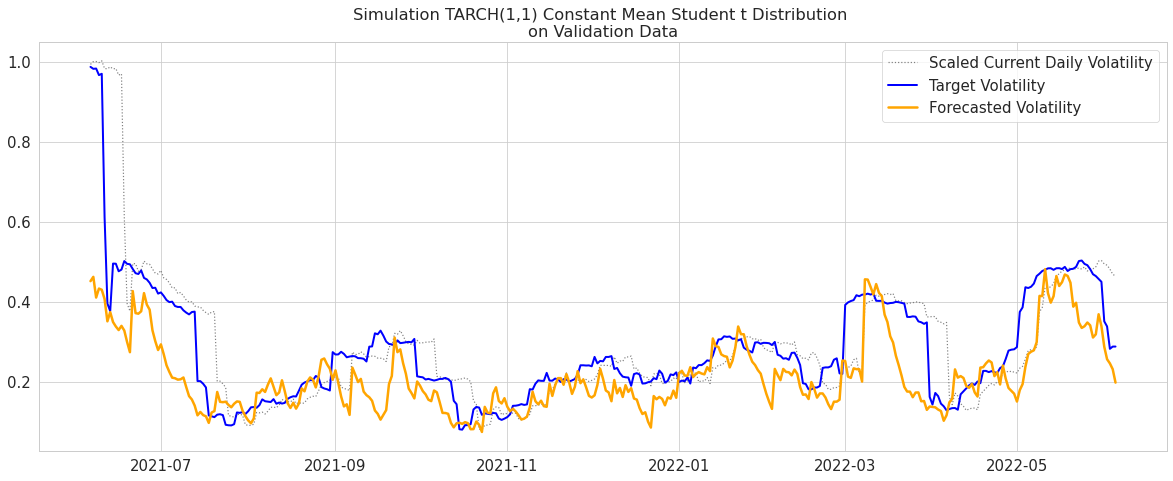

In [190]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, t_sm2_preds_scaled, 
          "Simulation TARCH(1,1) Constant Mean Student t Distribution")

In [191]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, t_sm2_preds_scaled, 
         "Simulation TARCH(1,1), Constant Mean, Student t Dist")

Model  \
0                                                Mean Baseline   
1                      GARCH (1,1), Constant Mean, Normal Dist   
2       Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                        ARCH(1,1), Constant Mean, Normal Dist   
4              ARCH(1,1), Constant Mean, Skewed Student t Dist   
5              Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6             Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7            Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                          ARCH, Constant Mean, Student t Dist   
9                    ARCH, Constant Mean,Skewed Student t Dist   
10                   GARCH(1,1), Constant Mean, Student t Dist   
11     Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12  Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   
13            Bootstrap TARCH(1,1), Constant Mean, Normal Dist   
14           Simulation TARCH(1,1), Constant Mean, Normal Dist   
15           Bootstrap TARCH(1,1), Constant Mean, Student Dist   
16        Simulation TARCH(1,1), Constant Mean, Student t Dist   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726  
13          0.281446         0.103197  
14          0.273308         0.098561  
15          0.301558         0.109637  
16          0.302569         0.110078

In [192]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

egarch_gm1 = arch_model(r_train, p=1, q=1, o=1, 
                    vol='EGARCH', dist='t')
result_14 = egarch_gm1.fit(disp='off')
print(result_14.summary())

                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                      returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -3812.03
Distribution:      Standardized Student's t   AIC:                           7636.06
Method:                  Maximum Likelihood   BIC:                           7666.96
                                              No. Observations:                 1275
Date:                      Thu, Aug 18 2022   Df Residuals:                     1274
Time:                              02:32:39   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [193]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_egarch, scaled_egarch_cond_vol = scale_tf_cond_vol(result_14)


In [194]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, o=1, q=1,
                       dist='t')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING SIMULATION METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

e_sm1_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [195]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
e_sm1_preds_scaled = transform_volatility_to_scaler(scaler_egarch, e_sm1_preds)

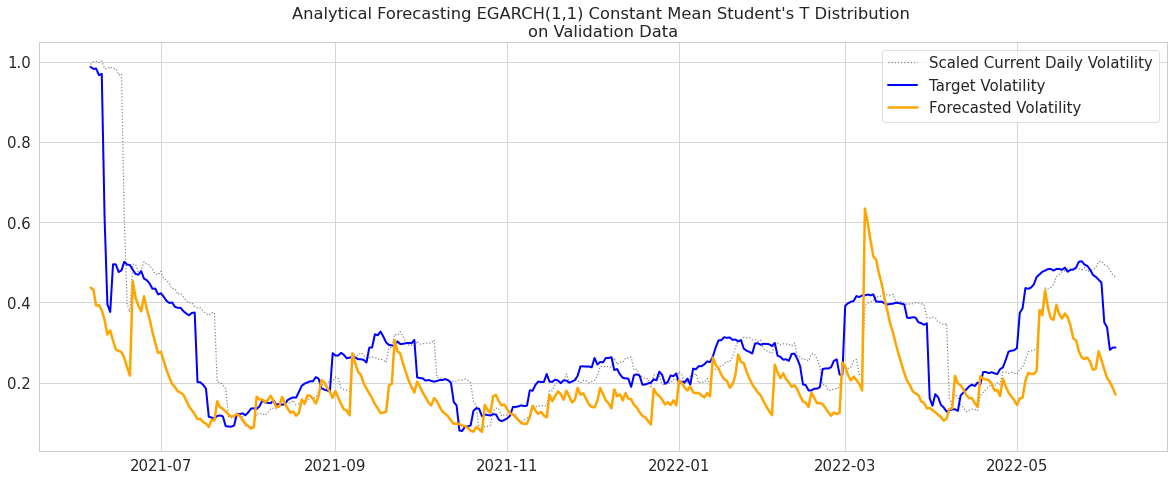

In [196]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, e_sm1_preds_scaled, 
          "Analytical Forecasting EGARCH(1,1) Constant Mean Student's T Distribution")

In [197]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, e_sm1_preds_scaled, 
         "EGARCH(1,1), Constant Mean, Student t Dist")

Model  \
0                                                Mean Baseline   
1                      GARCH (1,1), Constant Mean, Normal Dist   
2       Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                        ARCH(1,1), Constant Mean, Normal Dist   
4              ARCH(1,1), Constant Mean, Skewed Student t Dist   
5              Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6             Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7            Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                          ARCH, Constant Mean, Student t Dist   
9                    ARCH, Constant Mean,Skewed Student t Dist   
10                   GARCH(1,1), Constant Mean, Student t Dist   
11     Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12  Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   
13            Bootstrap TARCH(1,1), Constant Mean, Normal Dist   
14           Simulation TARCH(1,1), Constant Mean, Normal Dist   
15           Bootstrap TARCH(1,1), Constant Mean, Student Dist   
16        Simulation TARCH(1,1), Constant Mean, Student t Dist   
17                  EGARCH(1,1), Constant Mean, Student t Dist   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726  
13          0.281446         0.103197  
14          0.273308         0.098561  
15          0.301558         0.109637  
16          0.302569         0.110078  
17          0.337235         0.126315

In [198]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

egarch_gm2 = arch_model(r_train, p=1, q=1, o=1, 
                    vol='EGARCH')
result_15 = egarch_gm2.fit(disp='off')
print(result_15.summary())

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3897.33
Distribution:                  Normal   AIC:                           7804.67
Method:            Maximum Likelihood   BIC:                           7830.42
                                        No. Observations:                 1275
Date:                Thu, Aug 18 2022   Df Residuals:                     1274
Time:                        02:33:01   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.2539      0.138      1.839  6.593e-02 [-1.67

In [199]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_egarch, scaled_egarch_cond_vol = scale_tf_cond_vol(result_15)




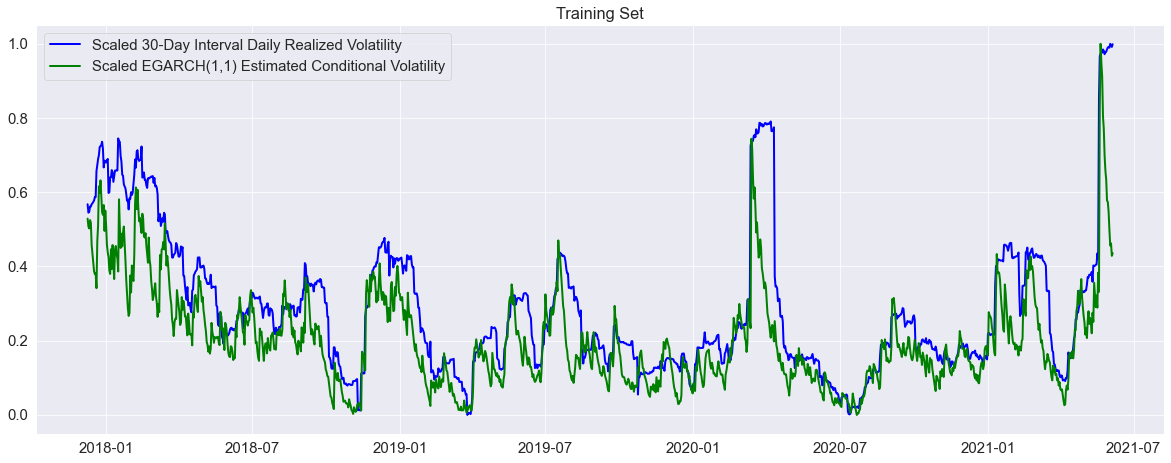

In [200]:
viz_cond_vol(scaled_egarch_cond_vol, 'EGARCH(1,1)')

In [201]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, o=1, q=1)
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING SIMULATION METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

e_sm2_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [202]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
e_sm2_preds_scaled = transform_volatility_to_scaler(scaler_egarch, e_sm2_preds)

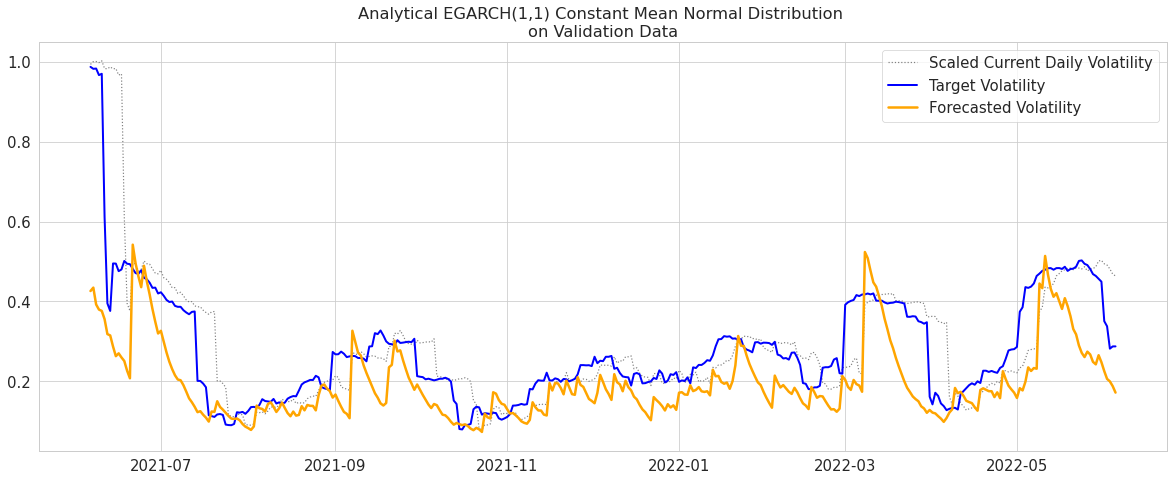

In [203]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, e_sm2_preds_scaled, 
          "Analytical EGARCH(1,1) Constant Mean Normal Distribution")

In [204]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, e_sm2_preds_scaled, 
         "EGARCH(1,1), Constant Mean, Normal Dist")

Model  \
0                                                Mean Baseline   
1                      GARCH (1,1), Constant Mean, Normal Dist   
2       Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                        ARCH(1,1), Constant Mean, Normal Dist   
4              ARCH(1,1), Constant Mean, Skewed Student t Dist   
5              Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6             Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7            Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                          ARCH, Constant Mean, Student t Dist   
9                    ARCH, Constant Mean,Skewed Student t Dist   
10                   GARCH(1,1), Constant Mean, Student t Dist   
11     Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12  Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   
13            Bootstrap TARCH(1,1), Constant Mean, Normal Dist   
14           Simulation TARCH(1,1), Constant Mean, Normal Dist   
15           Bootstrap TARCH(1,1), Constant Mean, Student Dist   
16        Simulation TARCH(1,1), Constant Mean, Student t Dist   
17                  EGARCH(1,1), Constant Mean, Student t Dist   
18                     EGARCH(1,1), Constant Mean, Normal Dist   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726  
13          0.281446         0.103197  
14          0.273308         0.098561  
15          0.301558         0.109637  
16          0.302569         0.110078  
17          0.337235         0.126315  
18          0.328201         0.123151

### Trying to predict for TARCH (1,1) 

This is just to understand how Time-Series based statistical models work

In [205]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(test_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, o=1, q=1, power=1.0,dist='t')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING SIMULATION METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False,
                             method='simulation').variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

t_sm3_preds = pd.DataFrame(rolling_forecasts, index=test_idx)

In [206]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
t_sm3_preds_scaled = transform_volatility_to_scaler(scaler_tarch, t_bs2_preds)

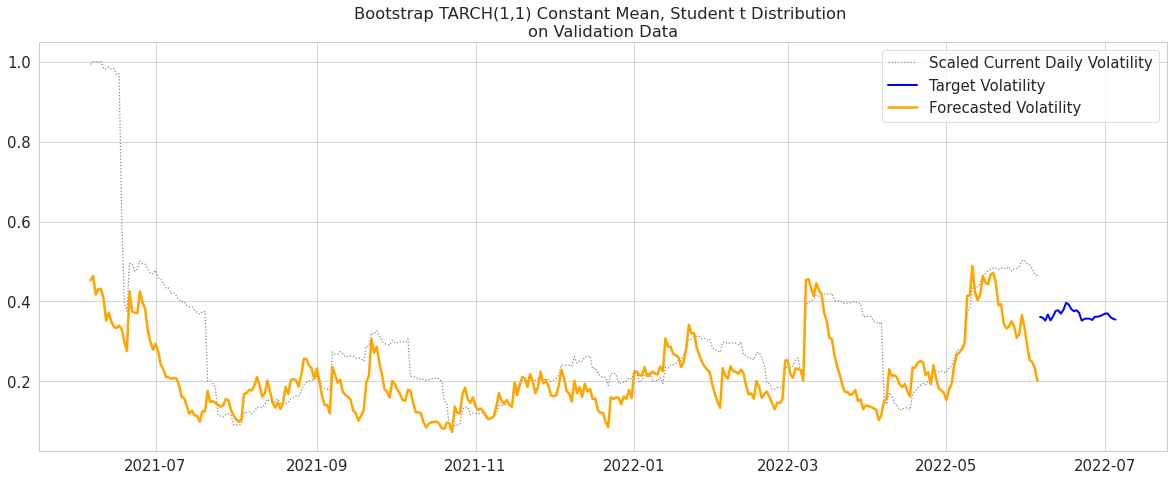

In [207]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_test_scaled, t_sm3_preds_scaled, 
          "Bootstrap TARCH(1,1) Constant Mean, Student t Distribution")

The following model doesn't really give a clear picture, so we will go ahead with using Deep Learning models as well.

In [208]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, o=1, q=1,
                       dist='t')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING SIMULATION METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

e_sm1_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [209]:
print(result_15.summary())

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3897.33
Distribution:                  Normal   AIC:                           7804.67
Method:            Maximum Likelihood   BIC:                           7830.42
                                        No. Observations:                 1275
Date:                Thu, Aug 18 2022   Df Residuals:                     1274
Time:                        02:33:01   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.2539      0.138      1.839  6.593e-02 [-1.67

In [210]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_egarch, scaled_egarch_cond_vol = scale_tf_cond_vol(result_15)





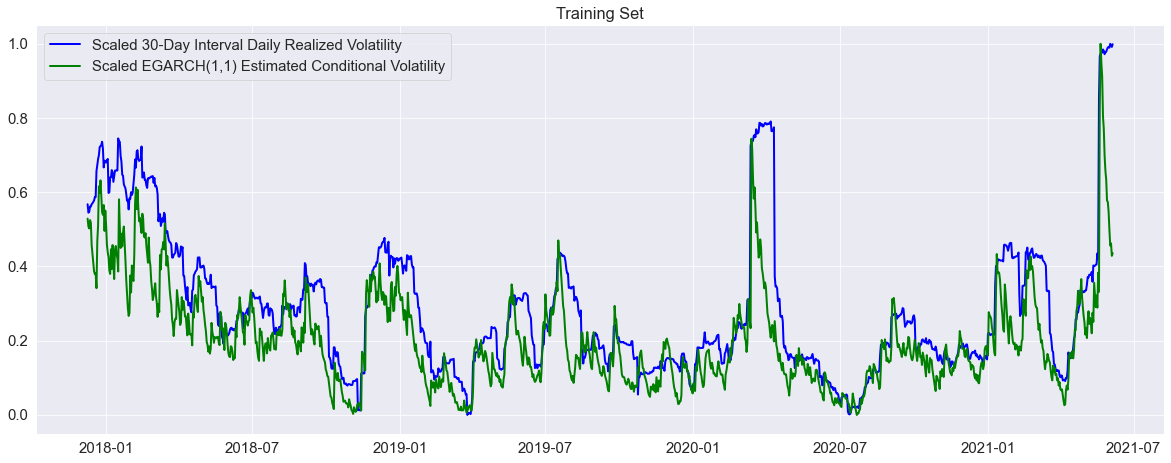

In [211]:
viz_cond_vol(scaled_egarch_cond_vol, 'EGARCH(1,1)')

In [212]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, o=1, q=1)
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING SIMULATION METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

e_sm2_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [213]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
e_sm2_preds_scaled = transform_volatility_to_scaler(scaler_egarch, e_sm2_preds)

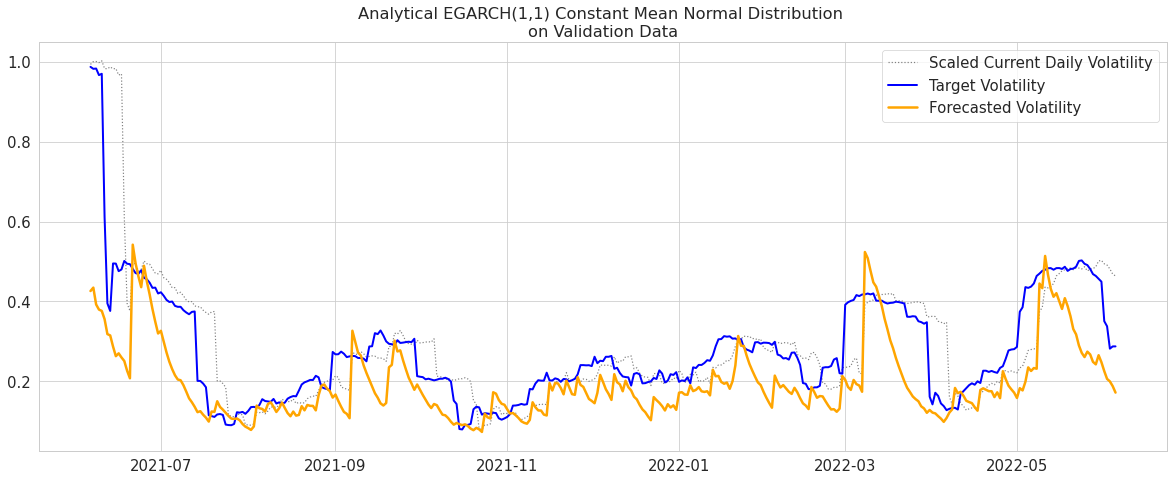

In [214]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, e_sm2_preds_scaled, 
          "Analytical EGARCH(1,1) Constant Mean Normal Distribution")

In [215]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, e_sm2_preds_scaled, 
         "EGARCH(1,1), Constant Mean, Normal Dist")

Model  \
0                                                Mean Baseline   
1                      GARCH (1,1), Constant Mean, Normal Dist   
2       Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                        ARCH(1,1), Constant Mean, Normal Dist   
4              ARCH(1,1), Constant Mean, Skewed Student t Dist   
5              Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6             Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7            Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                          ARCH, Constant Mean, Student t Dist   
9                    ARCH, Constant Mean,Skewed Student t Dist   
10                   GARCH(1,1), Constant Mean, Student t Dist   
11     Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12  Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   
13            Bootstrap TARCH(1,1), Constant Mean, Normal Dist   
14           Simulation TARCH(1,1), Constant Mean, Normal Dist   
15           Bootstrap TARCH(1,1), Constant Mean, Student Dist   
16        Simulation TARCH(1,1), Constant Mean, Student t Dist   
17                  EGARCH(1,1), Constant Mean, Student t Dist   
18                     EGARCH(1,1), Constant Mean, Normal Dist   
19                     EGARCH(1,1), Constant Mean, Normal Dist   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726  
13          0.281446         0.103197  
14          0.273308         0.098561  
15          0.301558         0.109637  
16          0.302569         0.110078  
17          0.337235         0.126315  
18          0.328201         0.123151  
19          0.328201         0.123151

## Model - #6 Neural Networks

While GARCH remains the gold standard for volatility prediction within traditional financial institutions, there has been an increasing numbers of professionals and researchers turning to Machine Learning, especially Neural Networks, to gain insights into the financial markets in recent years.

(Reference: Positional Option Trading - Euan Sinclair)

Traders' theory of the market being inherently efficient (Efficient Market Hypothesis or EHM) states that share prices reflects all information and consistently outperforming the overall market is impossible. The more efficient a market is, the more random and unpredictable the returns will be, and thus a perfectly efficient market will be completely unpredictable.

There are other arguments against EMH, and ones of the most prominent one is based on Behavioral Finance: compared to the human history of 200,000 years, the market has not been around for that long. For example, equity options have only been traded in liquid, transparent market since the CBOE opened in 1973; and the average lifetime of an S&P500 company is approx. 20 years. It means that some psychological tendencies of human beings have 200,000 years of evidence behind them, and that a lot of the movements of the markets that were driven by participants' behaviors will likely repeat itself at a later point. Therefore the market system cannot be totally random, it must have some patterns. Those patterns are extremely difficult to exploit due to the multitude of factors that interact and drive the market.

Neural Networks would be a very good candidate for that.

In [216]:
#!pip install tensorflow

In [217]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K
from decimal import Decimal

In [218]:
# CONVERT INPUT & OUTPUT SERIES TO MATRIX DATASETS
def windowed_dataset(x_series, y_series, lookback_window):
    dataX, dataY = [], []
    for i in range((lookback_window-1), len(x_series)):
        start_idx = x_series.index[i-lookback_window+1]
        end_idx = x_series.index[i]
        a = x_series[start_idx:end_idx].values
        dataX.append(a)
        dataY.append(y_series[end_idx])

    return np.array(dataX), np.array(dataY)

In [219]:
def rmspe(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays
    that can be used as metrics for NN during training
    '''
    loss = K.sqrt(K.mean(K.square((y_true - y_pred) / y_true)))

    return loss

In [220]:
def forecast(model, range_idx):
    '''
    Generate predictions for a time period 'range_idx' 
    using fitted 'model' with 'n_past' value preassigned
    '''
    start_idx = range_idx[0] - timedelta(n_past - 1)
    end_idx = range_idx[-1]
    mat_X, _ = windowed_dataset(df.vol_current[start_idx:end_idx], 
                                    df.vol_future[range_idx], n_past)
    preds = pd.Series(model.predict(mat_X)[:, 0],
                      index=range_idx)

    return preds

In [221]:
def scale(scaler, y_series):
    '''
    Transform y_series using fitted scaler
    into another series with the same datetime index
    '''
    scaled = pd.Series(scaler.transform(y_series.values.reshape(-1,1))[:, 0],
                       index=y_series.index)
    return scaled

In [222]:
def viz_train_val_metrics(model_hist):
    with sns.axes_style("white"):
        fig, ax = plt.subplots(figsize=(15,6))

        # PLOT MSE - LEFT Y-AXIS
        # TRAINING
        ln11 = ax.plot(range(len(model_hist.history['loss'])), 
                    model_hist.history['loss'], color='lightblue',
                    label='Training MSE', lw=2)
        # VALIDATION
        ln12 = ax.plot(range(len(model_hist.history['loss'])),
                    model_hist.history['val_loss'], color='darkblue',
                    label='Validation MSE', lw=2)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('MSE')

        # PLOT RMSE - RIGHT Y-AXIS
        ax2 = ax.twinx()
        ln21 = ax2.plot(range(len(model_hist.history['loss'])), 
                    model_hist.history['rmspe'], color='pink', lw=2,
                    label='Training RMSPE')
        ln22 = ax2.plot(range(len(model_hist.history['loss'])), 
                    model_hist.history['val_rmspe'], color='red', lw=2,
                    label='Validation RMSPE')
        ax2.set_ylabel('RMSPE')

        # COMBINING LALBELS FOR 4 LINES INTO 1 LEGEND
        lns = ln11 + ln12 + ln21 + ln22
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, loc='best')

        ax.set_title('Training vs. Validation Learning Curves')
        plt.show();

## Neural Network Baseline Metrics


Creating a baseline model first. Note: You use 'tf.keras.backend.clear_session()' to clear the model each time you add newer layers/parameters

In [223]:
# CLEARING ANY INTERNAL VARIABLES TO PREVENT MODELS
# FROM IMPACTING LATER VERSIONS OF THEMSELVES
tf.keras.backend.clear_session()
np.random.seed(seed)

n_past = 14
batch_size = 64

mat_X_train, mat_y_train = windowed_dataset(x_train, y_train, n_past)

snn_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[n_past, 1]),                          
    # DENSE OUTPUT LAYER
    tf.keras.layers.Dense(1)
])

snn_1.compile(loss='mse', 
              optimizer='adam', 
              metrics=[rmspe])

print(snn_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14)                0         
                                                                 
 dense (Dense)               (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
None


2022-08-18 02:34:09.565212: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [224]:
# FIT MODEL TO TRAINING DATASET 
snn_1_res = snn_1.fit(mat_X_train, mat_y_train, epochs=90,validation_split=0.2,verbose=0, batch_size=batch_size, shuffle=True)

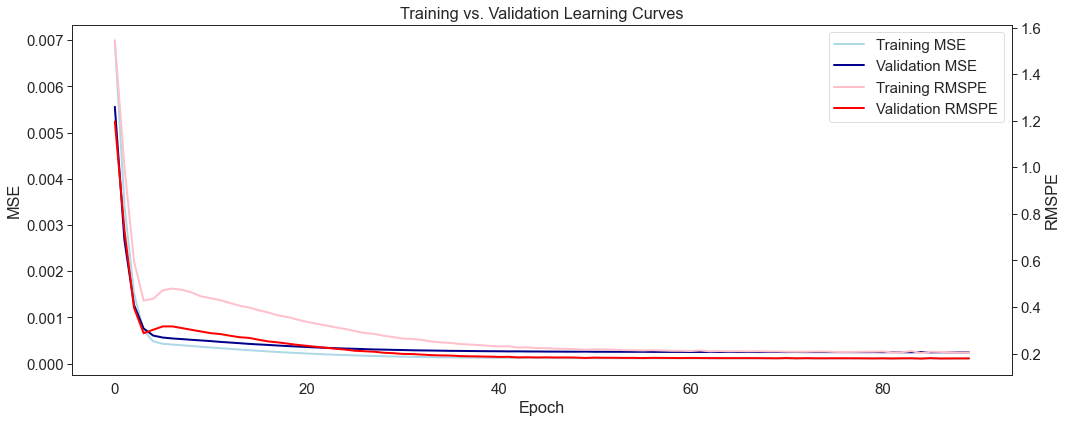

In [225]:
viz_train_val_metrics(snn_1_res)

In [226]:
# FORECASTING ON VALIDATION SET
snn_1_preds = forecast(snn_1, val_idx)

# SCALING OUTPUT TO MINMAXSCALER FITTED TO TRAINING CURRENT VOLUME
snn_1_preds_scaled = scale(scaler_vol, snn_1_preds)

12/12 [==============================] - 0s 2ms/step


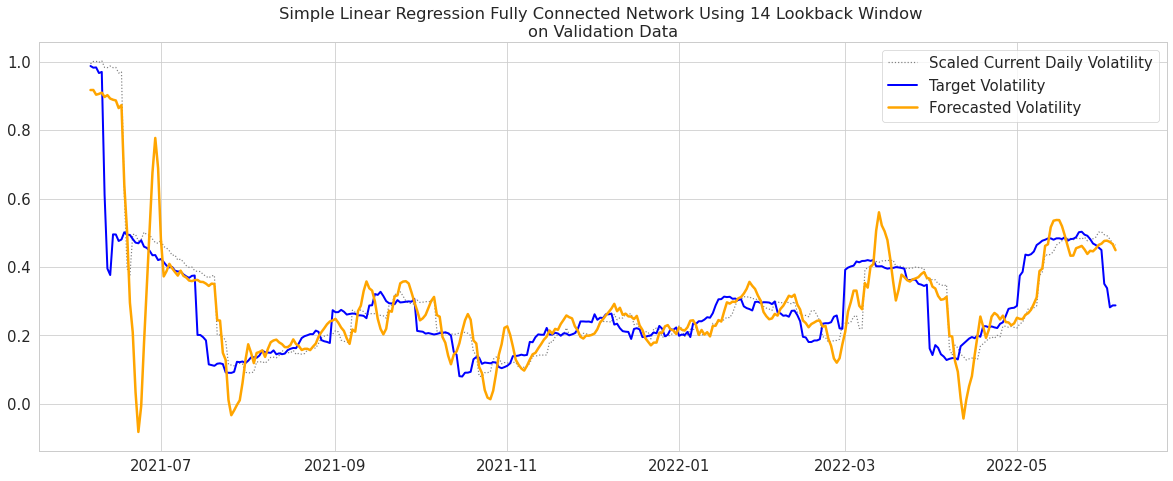

In [227]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, snn_1_preds_scaled, 
          f"Simple Linear Regression Fully Connected Network Using {n_past} Lookback Window")

In [228]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, snn_1_preds_scaled,
         f"Simple LR Fully Connected NN, n_past={n_past}")

Model  \
0                                                Mean Baseline   
1                      GARCH (1,1), Constant Mean, Normal Dist   
2       Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                        ARCH(1,1), Constant Mean, Normal Dist   
4              ARCH(1,1), Constant Mean, Skewed Student t Dist   
5              Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6             Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7            Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                          ARCH, Constant Mean, Student t Dist   
9                    ARCH, Constant Mean,Skewed Student t Dist   
10                   GARCH(1,1), Constant Mean, Student t Dist   
11     Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12  Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   
13            Bootstrap TARCH(1,1), Constant Mean, Normal Dist   
14           Simulation TARCH(1,1), Constant Mean, Normal Dist   
15           Bootstrap TARCH(1,1), Constant Mean, Student Dist   
16        Simulation TARCH(1,1), Constant Mean, Student t Dist   
17                  EGARCH(1,1), Constant Mean, Student t Dist   
18                     EGARCH(1,1), Constant Mean, Normal Dist   
19                     EGARCH(1,1), Constant Mean, Normal Dist   
20                     Simple LR Fully Connected NN, n_past=14   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726  
13          0.281446         0.103197  
14          0.273308         0.098561  
15          0.301558         0.109637  
16          0.302569         0.110078  
17          0.337235         0.126315  
18          0.328201         0.123151  
19          0.328201         0.123151  
20          0.474939         0.108808

## Univariate Long Short-Term Memory (LSTM)

In [229]:
# CLEARING ANY INTERNAL VARIABLES TO PREVENT MODELS
# FROM IMPACTING LATER VERSIONS OF THEMSELVES
tf.keras.backend.clear_session()

# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

n_past = 14
batch_size = 64

mat_X_train, mat_y_train = windowed_dataset(x_train, y_train, n_past)

lstm_1 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), 
                           input_shape=[None]),                            
    # ADDING 1 LSTM LAYER
    tf.keras.layers.LSTM(20),
    # DENSE OUTPUT LAYER
    tf.keras.layers.Dense(1)
])

lstm_1.compile(loss='mse', 
               optimizer="adam", 
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_1.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

# STOPPING THE TRAINING IF VALIDATION RMSPE IS NOT IMPROVING 
early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, None, 1)           0         
                                                                 
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None


In [230]:
# FIT TO TRAINING DATA
lstm_1_res = lstm_1.fit(mat_X_train, mat_y_train, 
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2, shuffle=True,
                        verbose=0, batch_size=batch_size, epochs=200)

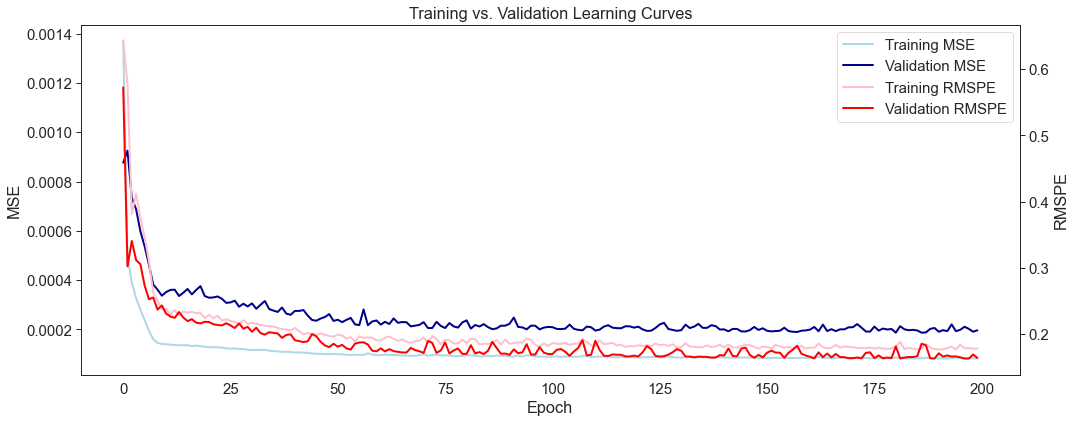

In [231]:
# VISUALIZE TRAINING VS. VALIDATION LOSS METRICS
viz_train_val_metrics(lstm_1_res)

In [232]:
# FORECASTING ON VALIDATION SET
lstm_1_preds = forecast(lstm_1, val_idx)

# SCALING OUTPUT TO MINMAXSCALER FITTED TO TRAINING CURRENT VOLUME
lstm_1_preds_scaled = scale(scaler_vol, lstm_1_preds)

12/12 [==============================] - 0s 3ms/step


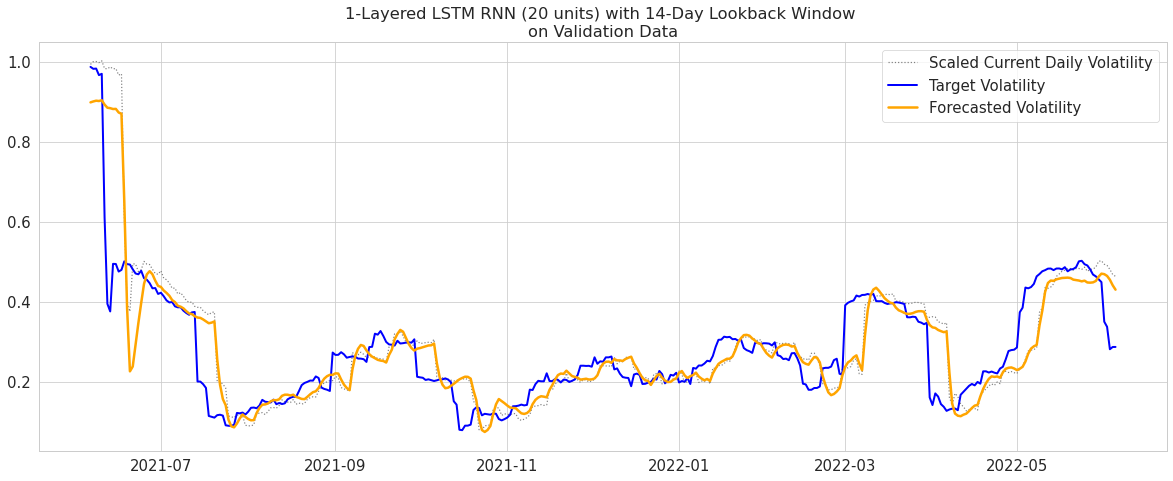

In [233]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, lstm_1_preds_scaled, 
          f"1-Layered LSTM RNN (20 units) with {n_past}-Day Lookback Window")

In [234]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, lstm_1_preds_scaled, 
         f"LSTM 1 layer 20 units, n_past={n_past}")

Model  \
0                                                Mean Baseline   
1                      GARCH (1,1), Constant Mean, Normal Dist   
2       Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                        ARCH(1,1), Constant Mean, Normal Dist   
4              ARCH(1,1), Constant Mean, Skewed Student t Dist   
5              Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6             Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7            Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                          ARCH, Constant Mean, Student t Dist   
9                    ARCH, Constant Mean,Skewed Student t Dist   
10                   GARCH(1,1), Constant Mean, Student t Dist   
11     Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12  Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   
13            Bootstrap TARCH(1,1), Constant Mean, Normal Dist   
14           Simulation TARCH(1,1), Constant Mean, Normal Dist   
15           Bootstrap TARCH(1,1), Constant Mean, Student Dist   
16        Simulation TARCH(1,1), Constant Mean, Student t Dist   
17                  EGARCH(1,1), Constant Mean, Student t Dist   
18                     EGARCH(1,1), Constant Mean, Normal Dist   
19                     EGARCH(1,1), Constant Mean, Normal Dist   
20                     Simple LR Fully Connected NN, n_past=14   
21                            LSTM 1 layer 20 units, n_past=14   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726  
13          0.281446         0.103197  
14          0.273308         0.098561  
15          0.301558         0.109637  
16          0.302569         0.110078  
17          0.337235         0.126315  
18          0.328201         0.123151  
19          0.328201         0.123151  
20          0.474939         0.108808  
21          0.399346         0.089397

In [235]:
## Bidirectional LSTM

In [236]:
# CLEARING ANY INTERNAL VARIABLES TO PREVENT MODELS
# FROM IMPACTING LATER VERSIONS OF THEMSELVES
tf.keras.backend.clear_session()

# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

# INCREASING LOOKBACK WINDOW TO 1 MONTH
n_past = 30
batch_size = 64

mat_X_train, mat_y_train = windowed_dataset(x_train, y_train, n_past)

lstm_2 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), 
                           input_shape=[None]),                            
    # ADDING 1st BIDIRECTIONAL LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    # ADDING 2nd BIDIRECTIONAL LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    # DENSE OUTPUT LAYER
    tf.keras.layers.Dense(1)
])

lstm_2.compile(loss='mse', 
               optimizer="adam", 
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_2.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

# STOPPING THE TRAINING IF VALIDATION RMSPE IS NOT IMPROVING 
early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, None, 1)           0         
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         8704      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 19,105
Trainable params: 19,105
Non-trainable params: 0
_________________________________________________________________
None


In [237]:
# FITTING lstm_2 TO TRAINING DATA
lstm_2_res = lstm_2.fit(mat_X_train, mat_y_train, 
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2, shuffle=True,
                        verbose=0, batch_size=batch_size, epochs=200)

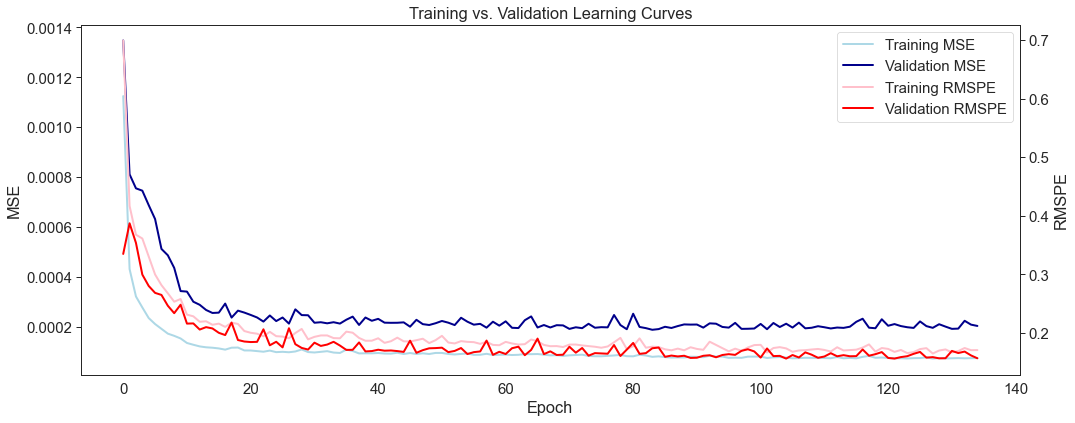

In [238]:
# VISUALIZING PERFORMANCE METRICS
viz_train_val_metrics(lstm_2_res)


In [239]:
# FORECASTING ON VALIDATION SET
lstm_2_preds = forecast(lstm_2, val_idx)

# SCALING OUTPUT TO MINMAXSCALER FITTED TO TRAINING CURRENT VOLUME
lstm_2_preds_scaled = scale(scaler_vol, lstm_2_preds)

12/12 [==============================] - 2s 11ms/step


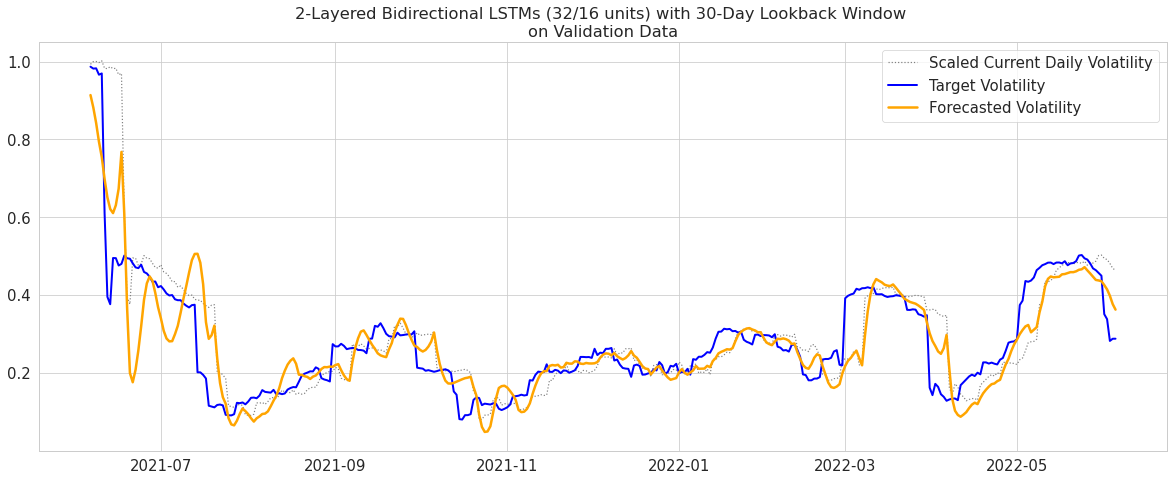

In [240]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, lstm_2_preds_scaled, 
          f"2-Layered Bidirectional LSTMs (32/16 units) with {n_past}-Day Lookback Window")

In [241]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, lstm_2_preds_scaled, 
         f"2 layers Bidirect LSTM (32/16 units), n_past={n_past}")

Model  \
0                                                Mean Baseline   
1                      GARCH (1,1), Constant Mean, Normal Dist   
2       Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                        ARCH(1,1), Constant Mean, Normal Dist   
4              ARCH(1,1), Constant Mean, Skewed Student t Dist   
5              Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6             Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7            Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                          ARCH, Constant Mean, Student t Dist   
9                    ARCH, Constant Mean,Skewed Student t Dist   
10                   GARCH(1,1), Constant Mean, Student t Dist   
11     Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12  Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   
13            Bootstrap TARCH(1,1), Constant Mean, Normal Dist   
14           Simulation TARCH(1,1), Constant Mean, Normal Dist   
15           Bootstrap TARCH(1,1), Constant Mean, Student Dist   
16        Simulation TARCH(1,1), Constant Mean, Student t Dist   
17                  EGARCH(1,1), Constant Mean, Student t Dist   
18                     EGARCH(1,1), Constant Mean, Normal Dist   
19                     EGARCH(1,1), Constant Mean, Normal Dist   
20                     Simple LR Fully Connected NN, n_past=14   
21                            LSTM 1 layer 20 units, n_past=14   
22             2 layers Bidirect LSTM (32/16 units), n_past=30   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726  
13          0.281446         0.103197  
14          0.273308         0.098561  
15          0.301558         0.109637  
16          0.302569         0.110078  
17          0.337235         0.126315  
18          0.328201         0.123151  
19          0.328201         0.123151  
20          0.474939         0.108808  
21          0.399346         0.089397  
22          0.356508         0.077938

In [242]:
## Adding 1D Convolutional Layers

In [243]:
# Ref: https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/supplement/DM4fi/convolutional-neural-networks-course

# CLEARING ANY INTERNAL VARIABLES TO PREVENT MODELS
# FROM IMPACTING LATER VERSIONS OF THEMSELVES
tf.keras.backend.clear_session()

# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

# INCREASING n_past TO 2 MONTHS
n_past = 60
batch_size = 64

mat_X_train, mat_y_train = windowed_dataset(x_train, y_train, n_past)

lstm_3 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), 
                           input_shape=[None]),
    # ADDING 1D CONVOLUTIONAL LAYER 
    tf.keras.layers.Conv1D(filters=32, kernel_size=4,
                           # DOWNSAMPLE INPUT SEQUENCE BY A FACTOR OF 2
                           strides=2, padding="valid",    
                           activation="relu",
                           input_shape=[None, 1]),                            
    # ADDING 1st LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu',
                                                       return_sequences=True)),
    # ADDING 2nd LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, activation='relu')),

    # DENSE OUTPUT LAYER
    tf.keras.layers.Dense(1)
])

lstm_3.compile(loss='mse', 
               optimizer="adam", 
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_3.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

# STOPPING THE TRAINING IF VALIDATION RMSPE IS NOT IMPROVING 
early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')
print(lstm_3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, None, 1)           0         
                                                                 
 conv1d (Conv1D)             (None, None, 32)          160       
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 27,201
Trainable params: 27,201
Non-traina

In [244]:
# FITTING MODEL TO TRAINING DATA
lstm_3_res = lstm_3.fit(mat_X_train, mat_y_train, 
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2, shuffle=True,
                        verbose=0, batch_size=batch_size, epochs=200)


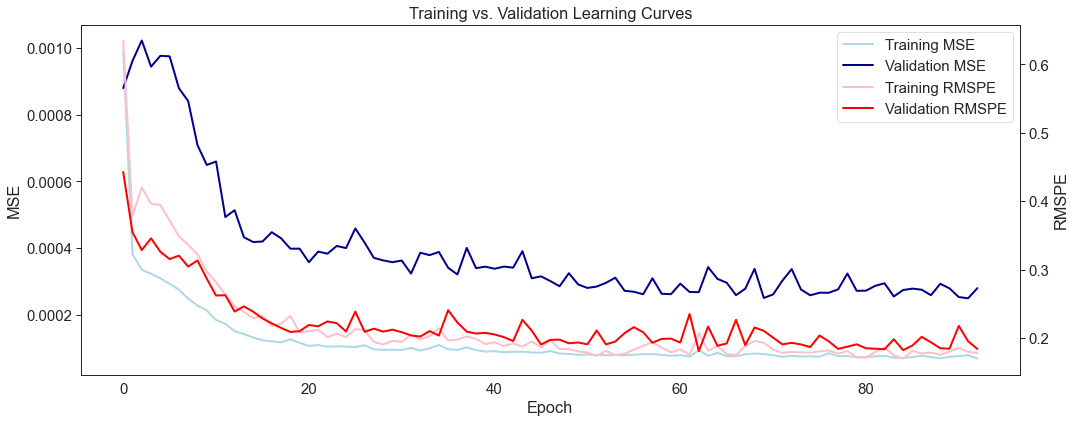

In [245]:
# VISUALIZING TRAINING/VALIDATION METRICS
viz_train_val_metrics(lstm_3_res)

In [246]:
# FORECASTING ON VALIDATION SET
lstm_3_preds = forecast(lstm_3, val_idx)

# SCALING OUTPUT TO MINMAXSCALER FITTED TO TRAINING CURRENT VOLUME
lstm_3_preds_scaled = scale(scaler_vol, lstm_3_preds)

12/12 [==============================] - 1s 11ms/step


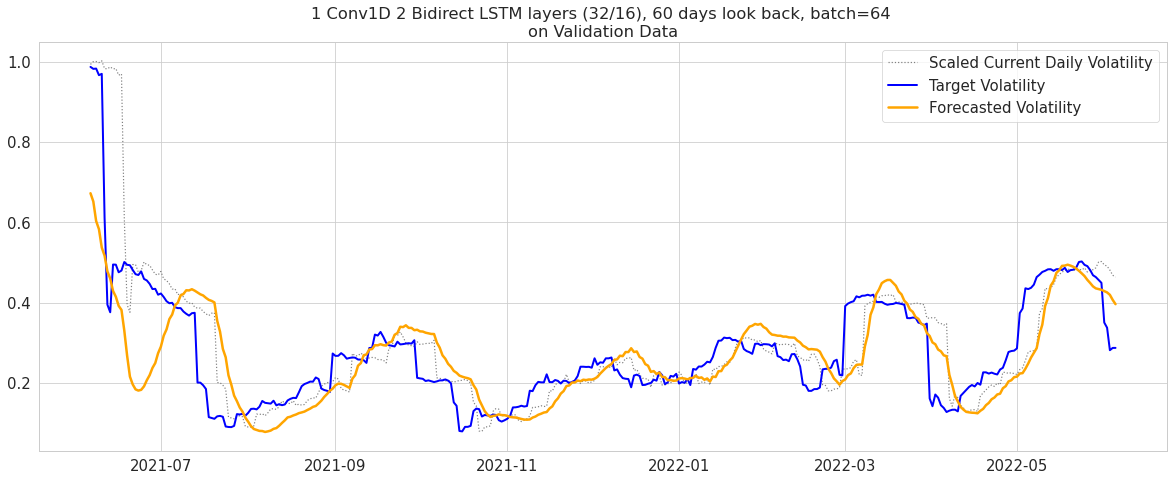

In [247]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, lstm_3_preds_scaled, 
          f"1 Conv1D 2 Bidirect LSTM layers (32/16), {n_past} days look back, batch={batch_size}")

In [248]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, lstm_3_preds_scaled, 
         f"1 Conv1D 2 Bidirect LSTM layers (32/16), n_past={n_past}, batch={batch_size}")

Model  \
0                                                  Mean Baseline   
1                        GARCH (1,1), Constant Mean, Normal Dist   
2         Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                          ARCH(1,1), Constant Mean, Normal Dist   
4                ARCH(1,1), Constant Mean, Skewed Student t Dist   
5                Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6               Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7              Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                            ARCH, Constant Mean, Student t Dist   
9                      ARCH, Constant Mean,Skewed Student t Dist   
10                     GARCH(1,1), Constant Mean, Student t Dist   
11       Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12    Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   
13              Bootstrap TARCH(1,1), Constant Mean, Normal Dist   
14             Simulation TARCH(1,1), Constant Mean, Normal Dist   
15             Bootstrap TARCH(1,1), Constant Mean, Student Dist   
16          Simulation TARCH(1,1), Constant Mean, Student t Dist   
17                    EGARCH(1,1), Constant Mean, Student t Dist   
18                       EGARCH(1,1), Constant Mean, Normal Dist   
19                       EGARCH(1,1), Constant Mean, Normal Dist   
20                       Simple LR Fully Connected NN, n_past=14   
21                              LSTM 1 layer 20 units, n_past=14   
22               2 layers Bidirect LSTM (32/16 units), n_past=30   
23  1 Conv1D 2 Bidirect LSTM layers (32/16), n_past=60, batch=64   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726  
13          0.281446         0.103197  
14          0.273308         0.098561  
15          0.301558         0.109637  
16          0.302569         0.110078  
17          0.337235         0.126315  
18          0.328201         0.123151  
19          0.328201         0.123151  
20          0.474939         0.108808  
21          0.399346         0.089397  
22          0.356508         0.077938  
23          0.481367         0.100649

In [249]:
## Learning Rate Tuning

In [250]:
# Ref: https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/supplement/DM4fi/convolutional-neural-networks-course

# CLEARING ANY INTERNAL VARIABLES TO PREVENT MODELS
# FROM IMPACTING LATER VERSIONS OF THEMSELVES
tf.keras.backend.clear_session()

# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

n_past = 30
batch_size = 64

mat_X_train, mat_y_train = windowed_dataset(x_train, y_train, n_past)

lstm_4 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), 
                           input_shape=[None]),                            
    # ADDING 1st BIDIRECTIONAL LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    # ADDING 2nd BIDIRECTIONAL LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    # DENSE OUTPUT LAYER
    tf.keras.layers.Dense(1)
])

# EXPONENTIALLY INCREASE LEARNING RATE 
# BY THE POWER OF 10 EVERY 20 EPOCHS
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
lstm_4.compile(loss='mse',
               optimizer=optimizer,
               metrics=[rmspe])

lstm_4_res = lstm_4.fit(mat_X_train, mat_y_train, epochs=160,
                        callbacks=[lr_schedule],
                        validation_split=0.2,
                        verbose=0, batch_size=batch_size, shuffle=True)

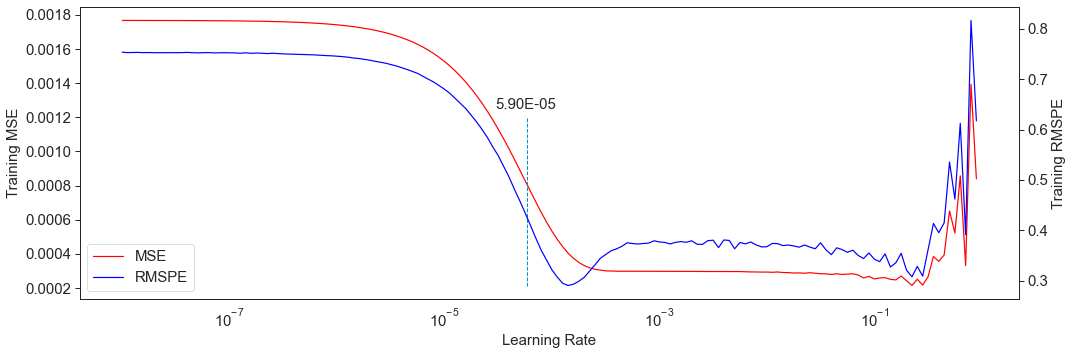

In [251]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(15,5))

    # PLOT MSE - LEFT Y-AXIS
    ln1 = ax.semilogx(lstm_4_res.history['lr'], lstm_4_res.history['loss'], 
                color='red', label='MSE')
    ax.set_xlabel('Learning Rate', fontsize=15)
    ax.set_ylabel('Training MSE', fontsize=15)

    # PLOT RMSE - RIGHT Y-AXIS
    ax2 = ax.twinx()
    ln2 = ax2.semilogx(lstm_4_res.history['lr'], lstm_4_res.history['rmspe'],
                color='blue', label='RMSPE')
    ax2.set_ylabel('Training RMSPE', fontsize=15)

    # COMBINING LALBELS FOR 2 LINES INTO 1 LEGEND
    lns = ln1 + ln2
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc='lower left')

    best_lr = 5.9e-5

    ax.vlines(x=best_lr, ls='--', lw=1,
            ymin=np.min(lstm_4_res.history["loss"]),
            ymax=0.0012)

    ax.text(3e-5, 0.00125, '%.2E' % Decimal(best_lr), fontsize=15)

    plt.show();

In [252]:
# CLEARING ANY INTERNAL VARIABLES TO PREVENT MODELS
# FROM IMPACTING LATER VERSIONS OF THEMSELVES
tf.keras.backend.clear_session()

# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

n_past = 30
batch_size = 64

mat_X_train, mat_y_train = windowed_dataset(x_train, y_train, n_past)

lstm_4 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), 
                           input_shape=[None]),                            
    # ADDING 1st BIDIRECTIONAL LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    # ADDING 2nd BIDIRECTIONAL LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    # DENSE OUTPUT LAYER
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(lr=best_lr, momentum=0.9)
lstm_4.compile(loss='mse',
               optimizer=optimizer,
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_4.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

# STOPPING THE TRAINING IF VALIDATION RMSPE IS NOT IMPROVING 
early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

lstm_4_res = lstm_4.fit(mat_X_train, mat_y_train, epochs=200,
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2,
                        verbose=0, batch_size=batch_size, shuffle=True)


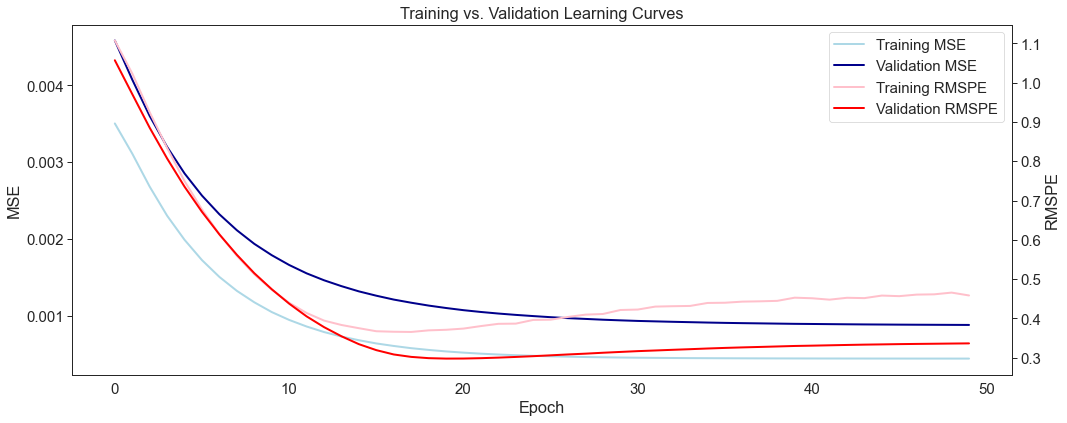

In [253]:
# VISUALIZING TRAINING/VALIDATION LEARNING CURVES
viz_train_val_metrics(lstm_4_res)

In [254]:
# FORECASTING ON VALIDATION SET
lstm_4_preds = forecast(lstm_4, val_idx)

# SCALING OUTPUT TO MINMAXSCALER FITTED TO TRAINING CURRENT VOLUME
lstm_4_preds_scaled = scale(scaler_vol, lstm_4_preds)

12/12 [==============================] - 2s 10ms/step


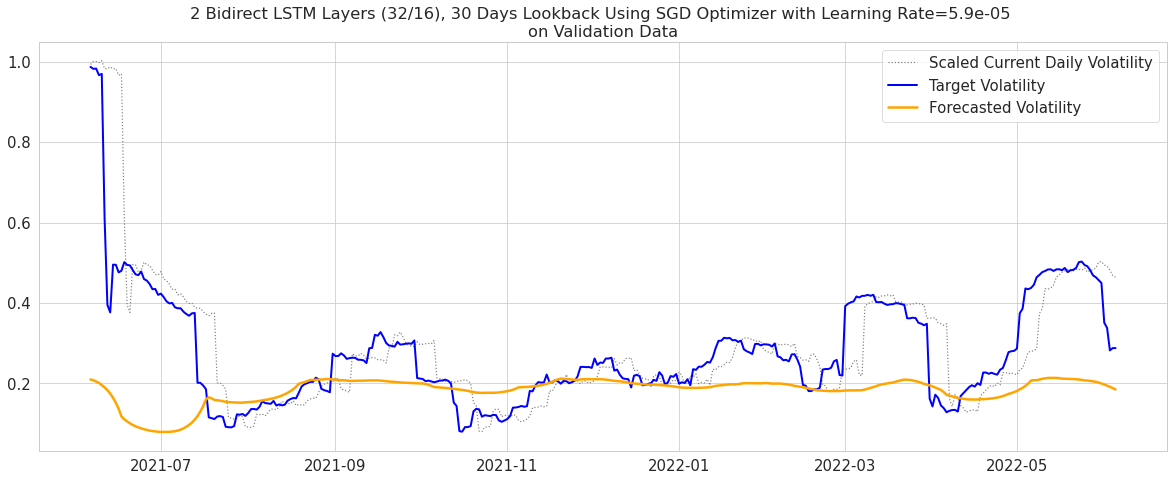

In [255]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, lstm_4_preds_scaled, 
          f"2 Bidirect LSTM Layers (32/16), {n_past} Days Lookback Using SGD Optimizer with Learning Rate={best_lr}")


In [256]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, lstm_4_preds_scaled, 
         f"2 Bidirect LSTMs (32/16), n_past={n_past}, batch={batch_size}, SGD lr={best_lr}")

Model  \
0                                                   Mean Baseline   
1                         GARCH (1,1), Constant Mean, Normal Dist   
2          Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                           ARCH(1,1), Constant Mean, Normal Dist   
4                 ARCH(1,1), Constant Mean, Skewed Student t Dist   
5                 Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6                Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7               Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                             ARCH, Constant Mean, Student t Dist   
9                       ARCH, Constant Mean,Skewed Student t Dist   
10                      GARCH(1,1), Constant Mean, Student t Dist   
11        Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12     Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   
13               Bootstrap TARCH(1,1), Constant Mean, Normal Dist   
14              Simulation TARCH(1,1), Constant Mean, Normal Dist   
15              Bootstrap TARCH(1,1), Constant Mean, Student Dist   
16           Simulation TARCH(1,1), Constant Mean, Student t Dist   
17                     EGARCH(1,1), Constant Mean, Student t Dist   
18                        EGARCH(1,1), Constant Mean, Normal Dist   
19                        EGARCH(1,1), Constant Mean, Normal Dist   
20                        Simple LR Fully Connected NN, n_past=14   
21                               LSTM 1 layer 20 units, n_past=14   
22                2 layers Bidirect LSTM (32/16 units), n_past=30   
23   1 Conv1D 2 Bidirect LSTM layers (32/16), n_past=60, batch=64   
24  2 Bidirect LSTMs (32/16), n_past=30, batch=64, SGD lr=5.9e-05   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726  
13          0.281446         0.103197  
14          0.273308         0.098561  
15          0.301558         0.109637  
16          0.302569         0.110078  
17          0.337235         0.126315  
18          0.328201         0.123151  
19          0.328201         0.123151  
20          0.474939         0.108808  
21          0.399346         0.089397  
22          0.356508         0.077938  
23          0.481367         0.100649  
24          0.417200         0.172704

In [257]:
# Multivariate LSTM

In [258]:
df.head()

Open        High         Low       Close     Volume  \
Date                                                                    
2017-12-09  277.265991  281.398010  250.388000  262.532990  161152000   
2017-12-10  262.898987  262.898987  220.768997  245.332993  142120000   
2017-12-11  244.951004  281.032990  244.143005  279.669006  152496992   
2017-12-12  281.490997  319.897003  281.187988  308.066986  271785984   
2017-12-13  307.431000  330.346008  284.743988  305.744995  248583008   

              returns  log_returns  vol_current  vol_future  
Date                                                         
2017-12-09  -5.135070    -0.052716     0.086809    0.087544  
2017-12-10  -6.551556    -0.067760     0.084088    0.088005  
2017-12-11  13.995677     0.130990     0.084414    0.089126  
2017-12-12  10.154139     0.096710     0.086060    0.089131  
2017-12-13  -0.753729    -0.007566     0.086069    0.097508

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1670 entries, 2017-12-09 to 2022-07-05
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1670 non-null   float64
 1   High         1670 non-null   float64
 2   Low          1670 non-null   float64
 3   Close        1670 non-null   float64
 4   Volume       1670 non-null   int64  
 5   returns      1670 non-null   float64
 6   log_returns  1670 non-null   float64
 7   vol_current  1670 non-null   float64
 8   vol_future   1670 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 195.0 KB


In [260]:
df.describe()

Open         High          Low        Close        Volume  \
count  1670.000000  1670.000000  1670.000000  1670.000000  1.670000e+03   
mean    149.368772   155.308159   142.694368   149.238582  2.904277e+08   
std      92.459360    97.478586    86.639965    92.349535  1.132871e+09   
min      33.084614    36.645374    26.703888    33.010323  1.016030e+07   
25%      68.260761    69.990538    66.609571    68.261690  6.663065e+07   
50%     120.774166   124.922836   116.686668   120.775150  1.256759e+08   
75%     216.778561   224.959274   206.170273   215.457462  2.222378e+08   
max     483.709991   517.620239   453.390991   483.583618  2.895912e+10   

           returns  log_returns  vol_current   vol_future  
count  1670.000000  1670.000000  1670.000000  1670.000000  
mean      0.106247    -0.000489     0.053149     0.053050  
std       5.517007     0.056153     0.022082     0.021988  
min     -41.385965    -0.534196     0.018738     0.018738  
25%      -2.598683    -0.026330     0.037416     0.037416  
50%       0.170202     0.001701     0.047323     0.047323  
75%       2.926678     0.028847     0.063685     0.063302  
max      41.192489     0.344954     0.138917     0.138917

In [261]:
# Feature Engineering

In [262]:
df['HL_sprd'] = np.log((df.High - df.Low) / df.Close)
df['CO_sprd'] = (df.Close - df.Open) / df.Open
df['Volume'] = np.log(df.Volume)

In [344]:
p=df.head(10)

In [345]:
import pandas as pd
import dataframe_image as dfi

dfi.export(p, 'second_table_monero.png')

objc[23956]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5d2b5ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/104.0.5112.79/Libraries/libGLESv2.dylib (0x115cc3590). One of the two will be used. Which one is undefined.
[0818/215842.718500:INFO:headless_shell.cc(660)] Written to file /var/folders/xx/h5xnb_fn2hj7z297mdw669vw0000gn/T/tmp6vqsilnj/temp.png.


In [264]:
features = ['HL_sprd', 'CO_sprd', 'Volume', 'vol_current']

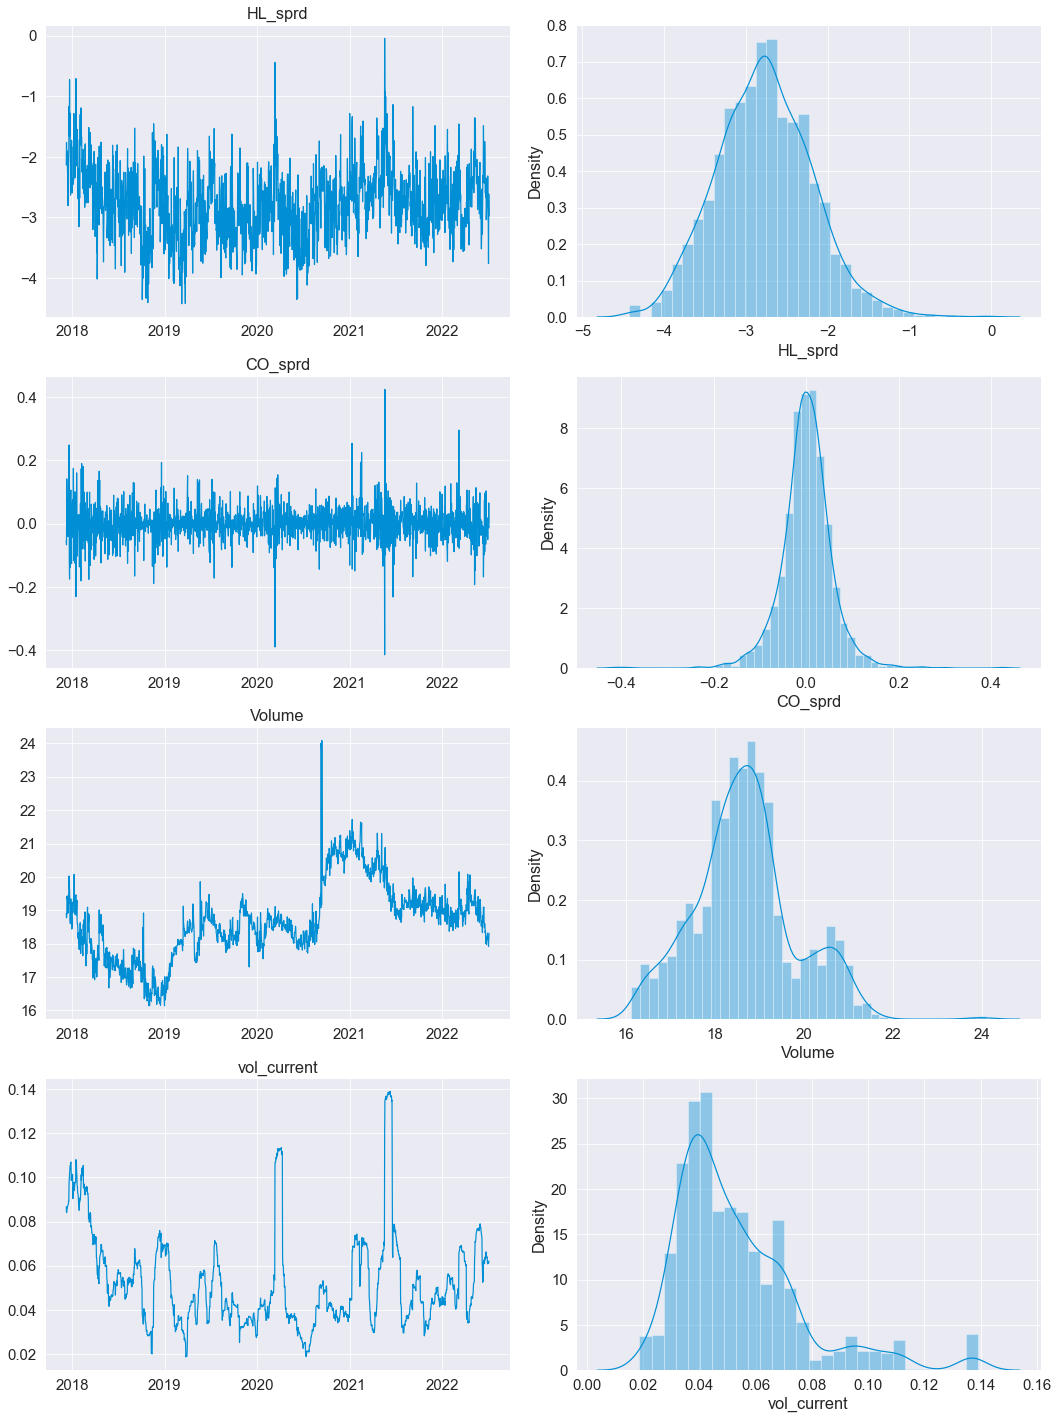

In [265]:

# PLOT EACH NUMERICAL COLUMN
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

    for i, c in enumerate(features):
        ax1, ax2 = axes[i][0], axes[i][1]
        ax1.plot(df[c])
        ax1.set_title(c)

        sns.distplot(df[c], ax=ax2)

    plt.tight_layout()

    plt.show();

In [266]:
# Input Reshaping

In [267]:
# PRINT OUT FIRST 5 ROWS OF INPUT DATAFRAME
input_df = df[features]

# SEPARATE TRAINING INPUT
X_train = input_df.loc[train_idx]

In [268]:
X_train.head()

HL_sprd   CO_sprd     Volume  vol_current
Date                                                  
2017-12-09 -2.136067 -0.053137  18.897859     0.086809
2017-12-10 -1.761857 -0.066817  18.772182     0.084088
2017-12-11 -2.025667  0.141734  18.842655     0.084414
2017-12-12 -2.074245  0.094412  19.420525     0.086060
2017-12-13 -1.902799 -0.005484  19.331287     0.086069

In [269]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1670 entries, 2017-12-09 to 2022-07-05
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HL_sprd      1670 non-null   float64
 1   CO_sprd      1670 non-null   float64
 2   Volume       1670 non-null   float64
 3   vol_current  1670 non-null   float64
dtypes: float64(4)
memory usage: 129.8 KB


In [270]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1275 entries, 2017-12-09 to 2021-06-05
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HL_sprd      1275 non-null   float64
 1   CO_sprd      1275 non-null   float64
 2   Volume       1275 non-null   float64
 3   vol_current  1275 non-null   float64
dtypes: float64(4)
memory usage: 49.8 KB


In [271]:
def forecast_multi(model, range_idx):
    '''
    Generate predictions for a time period 'range_idx' 
    using fitted 'model' with 'n_past' value preassigned
    for Multivariate LSTM
    '''
    start_idx = range_idx[0] - timedelta(n_past - 1)
    end_idx = range_idx[-1]
    mat_X, _ = windowed_dataset(input_df[start_idx:end_idx], 
                                df.vol_future[range_idx], n_past)
    preds = pd.Series(model.predict(mat_X)[:, 0],
                      index=range_idx)

    return preds

In [272]:
# Multivariate 3-Layered Bidirectional LSTM

In [273]:
tf.keras.backend.clear_session()

# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

n_past = 30
batch_size = 64
n_dims = input_df.shape[1]

mat_X_train, mat_y_train = windowed_dataset(X_train, y_train, n_past)

# CONSTRUCTING MULTIVARIATE BIDIRECTIONAL LSTM NN
lstm_6 = tf.keras.models.Sequential([  
    tf.keras.layers.InputLayer(input_shape=[n_past, n_dims]),
    # normalize,
    # BATCH NORMALIZATION
    tf.keras.layers.BatchNormalization(), 
    # ADDING 1st LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.1),

    # ADDING 2nd LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Dropout(0.1),

    # ADDING 3rd LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dropout(0.1),
    
    # DENSE OUTPUT LAYER
    tf.keras.layers.Dense(1)
])

lstm_6.compile(loss='mse', 
               optimizer="adam", 
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_6.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

# STOPPING THE TRAINING IF VALIDATION RMSPE IS NOT IMPROVING 
early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_6.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 30, 4)            16        
 ormalization)                                                   
                                                                 
 bidirectional (Bidirectiona  (None, 30, 128)          35328     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 30, 64)           41216     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0         
                                                        

In [274]:
lstm_6_res = lstm_6.fit(mat_X_train, mat_y_train, epochs=500,
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2,
                        verbose=0, batch_size=batch_size, shuffle=True)


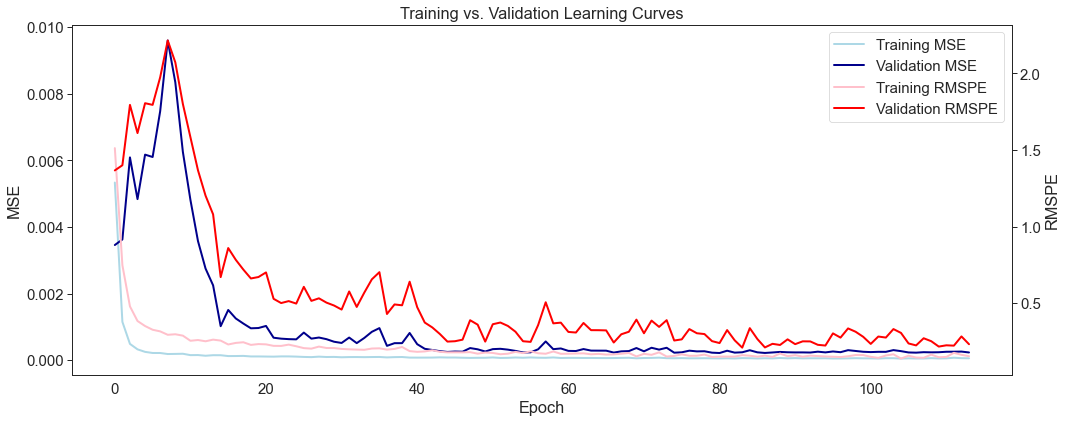

In [275]:
# VISUALIZING LEARNING CURVES
viz_train_val_metrics(lstm_6_res)

In [276]:
# FORECASTING ON VALIDATION SET
lstm_6_preds = forecast_multi(lstm_6, val_idx)

# SCALING OUTPUT TO MINMAXSCALER FITTED TO TRAINING CURRENT VOLUME
lstm_6_preds_scaled = scale(scaler_vol, lstm_6_preds)

12/12 [==============================] - 3s 18ms/step


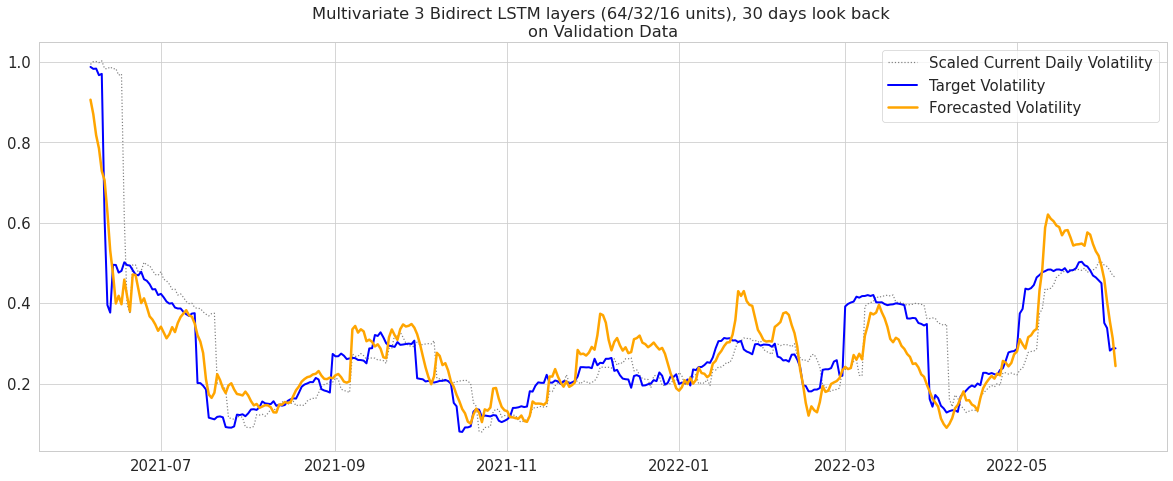

In [277]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, lstm_6_preds_scaled, 
          f"Multivariate 3 Bidirect LSTM layers (64/32/16 units), {n_past} days look back")

In [278]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, lstm_6_preds_scaled,
         f"Multivariate Bidirect LSTM 3 layers (64/32/16 units), n_past={n_past}")

Model  \
0                                                     Mean Baseline   
1                           GARCH (1,1), Constant Mean, Normal Dist   
2            Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                             ARCH(1,1), Constant Mean, Normal Dist   
4                   ARCH(1,1), Constant Mean, Skewed Student t Dist   
5                   Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6                  Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7                 Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                               ARCH, Constant Mean, Student t Dist   
9                         ARCH, Constant Mean,Skewed Student t Dist   
10                        GARCH(1,1), Constant Mean, Student t Dist   
11          Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12       Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   
13                 Bootstrap TARCH(1,1), Constant Mean, Normal Dist   
14                Simulation TARCH(1,1), Constant Mean, Normal Dist   
15                Bootstrap TARCH(1,1), Constant Mean, Student Dist   
16             Simulation TARCH(1,1), Constant Mean, Student t Dist   
17                       EGARCH(1,1), Constant Mean, Student t Dist   
18                          EGARCH(1,1), Constant Mean, Normal Dist   
19                          EGARCH(1,1), Constant Mean, Normal Dist   
20                          Simple LR Fully Connected NN, n_past=14   
21                                 LSTM 1 layer 20 units, n_past=14   
22                  2 layers Bidirect LSTM (32/16 units), n_past=30   
23     1 Conv1D 2 Bidirect LSTM layers (32/16), n_past=60, batch=64   
24    2 Bidirect LSTMs (32/16), n_past=30, batch=64, SGD lr=5.9e-05   
25  Multivariate Bidirect LSTM 3 layers (64/32/16 units), n_past=30   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726  
13          0.281446         0.103197  
14          0.273308         0.098561  
15          0.301558         0.109637  
16          0.302569         0.110078  
17          0.337235         0.126315  
18          0.328201         0.123151  
19          0.328201         0.123151  
20          0.474939         0.108808  
21          0.399346         0.089397  
22          0.356508         0.077938  
23          0.481367         0.100649  
24          0.417200         0.172704  
25          0.275665         0.068224

In [279]:
# Multivariate 4-Layered Bidirectional LSTM

In [280]:
tf.keras.backend.clear_session()

# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

n_past = 30
batch_size = 64
n_dims = input_df.shape[1]

mat_X_train, mat_y_train = windowed_dataset(X_train, y_train, n_past)

# CONSTRUCTING MULTIVARIATE BIDIRECTIONAL LSTM NN
lstm_7 = tf.keras.models.Sequential([  
    tf.keras.layers.InputLayer(input_shape=[n_past, n_dims]),
    # BATCH NORMALIZATION  
    tf.keras.layers.BatchNormalization(), 

    # ADDING 1st LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Dropout(0.1),
    # ADDING 2nd LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.1),
    # ADDING 3rd LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Dropout(0.1),
    # ADDING 4th LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dropout(0.1),

    # DENSE OUTPUT LAYER
    tf.keras.layers.Dense(1)
])

lstm_7.compile(loss='mse', 
               optimizer="adam", 
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_7.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

# STOPPING THE TRAINING IF VALIDATION RMSPE IS NOT IMPROVING 
early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_7.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 30, 4)            16        
 ormalization)                                                   
                                                                 
 bidirectional (Bidirectiona  (None, 30, 256)          136192    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 30, 128)          164352    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                        

In [281]:
# FITTING TO TRAINING DATA
lstm_7_res = lstm_7.fit(mat_X_train, mat_y_train, epochs=200,
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2,
                        verbose=0, batch_size=batch_size, shuffle=True)

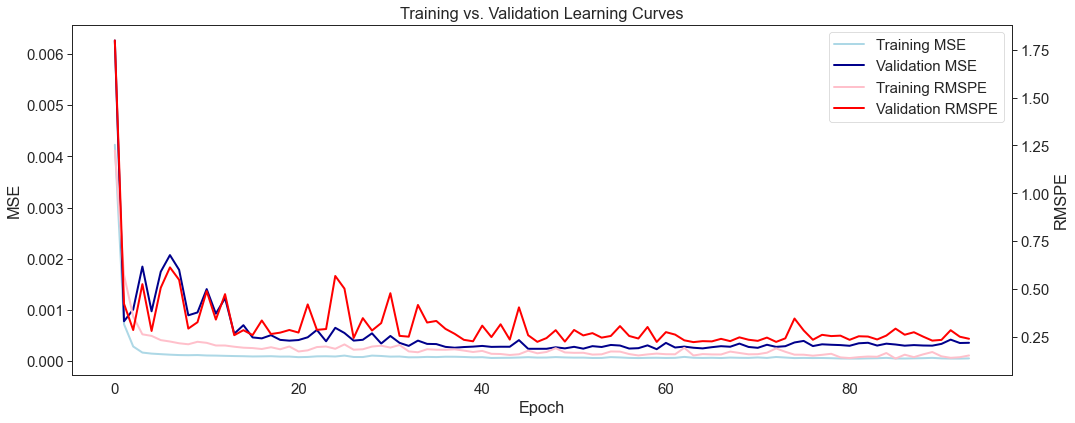

In [282]:
# VISUALIZING LEARNING CURVES
viz_train_val_metrics(lstm_7_res)

In [283]:
# FORECASTING ON VALIDATION SET
lstm_7_preds = forecast_multi(lstm_7, val_idx)

# SCALING OUTPUT TO MINMAXSCALER FITTED TO TRAINING CURRENT VOLUME
lstm_7_preds_scaled = scale(scaler_vol, lstm_7_preds)

12/12 [==============================] - 4s 48ms/step


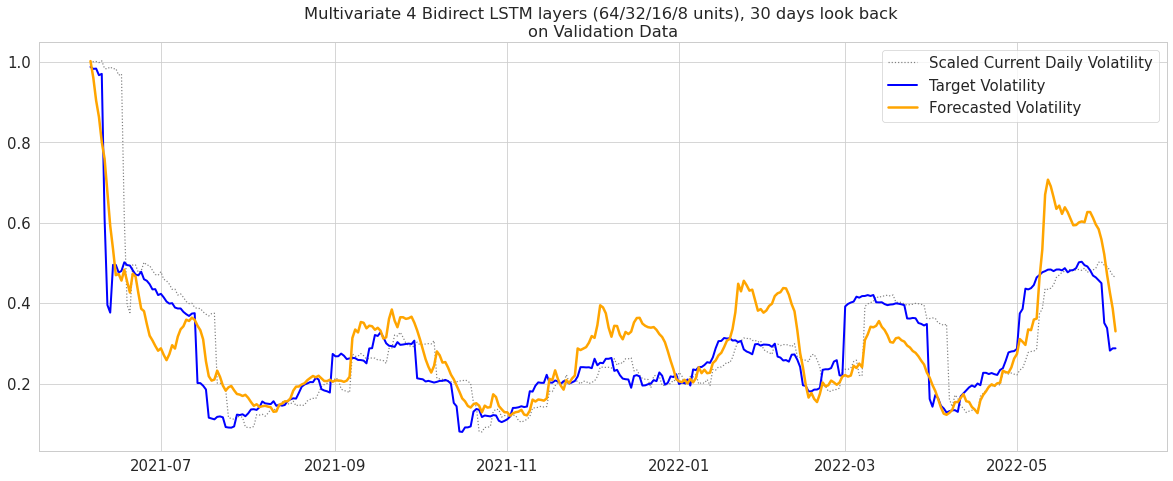

In [284]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, lstm_7_preds_scaled, 
          f"Multivariate 4 Bidirect LSTM layers (64/32/16/8 units), {n_past} days look back")
plt.savefig('lstm_7_preds.png', dpi=300, bbox_inches='tight')
plt.show();

In [285]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, lstm_7_preds_scaled, 
         f"Multivariate 4 Bidirect LSTM layers (128/64/32/16 units), n_past={n_past}, batch={batch_size}")

Model  \
0                                                                   Mean Baseline   
1                                         GARCH (1,1), Constant Mean, Normal Dist   
2                          Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                                           ARCH(1,1), Constant Mean, Normal Dist   
4                                 ARCH(1,1), Constant Mean, Skewed Student t Dist   
5                                 Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6                                Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7                               Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                                             ARCH, Constant Mean, Student t Dist   
9                                       ARCH, Constant Mean,Skewed Student t Dist   
10                                      GARCH(1,1), Constant Mean, Student t Dist   
11                        Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12                     Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   
13                               Bootstrap TARCH(1,1), Constant Mean, Normal Dist   
14                              Simulation TARCH(1,1), Constant Mean, Normal Dist   
15                              Bootstrap TARCH(1,1), Constant Mean, Student Dist   
16                           Simulation TARCH(1,1), Constant Mean, Student t Dist   
17                                     EGARCH(1,1), Constant Mean, Student t Dist   
18                                        EGARCH(1,1), Constant Mean, Normal Dist   
19                                        EGARCH(1,1), Constant Mean, Normal Dist   
20                                        Simple LR Fully Connected NN, n_past=14   
21                                               LSTM 1 layer 20 units, n_past=14   
22                                2 layers Bidirect LSTM (32/16 units), n_past=30   
23                   1 Conv1D 2 Bidirect LSTM layers (32/16), n_past=60, batch=64   
24                  2 Bidirect LSTMs (32/16), n_past=30, batch=64, SGD lr=5.9e-05   
25                Multivariate Bidirect LSTM 3 layers (64/32/16 units), n_past=30   
26  Multivariate 4 Bidirect LSTM layers (128/64/32/16 units), n_past=30, batch=64   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726  
13          0.281446         0.103197  
14          0.273308         0.098561  
15          0.301558         0.109637  
16          0.302569         0.110078  
17          0.337235         0.126315  
18          0.328201         0.123151  
19          0.328201         0.123151  
20          0.474939         0.108808  
21          0.399346         0.089397  
22          0.356508         0.077938  
23          0.481367         0.100649  
24          0.417200         0.172704  
25          0.275665         0.068224  
26          0.339234         0.085065

In [286]:
# LSTM Network Tuning

In [287]:
#!pip install talos

In [288]:
import talos

In [289]:
def lstm_network(X_tr, y_tr, X_v, y_v, params):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.InputLayer(input_shape=[n_past, n_dims]))

    # HIDDEN LAYERS
    for layer in range(params['lstm_layers'],1,-1):
        # FOR THE LAST LAYER - return_sequences NEEDS TO BE False
        # ALL OTHER LAYERS - returns_sequences = True
        seq = False if layer == 1 else True
        
        model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(2**(layer+3),
                                                                     return_sequences=seq,
                                                                     activation=params['activation'])))
        model.add(tf.keras.layers.Dropout(params['dropout']))

    model.add(tf.keras.layers.Dense(1))

    # COMPILE
    model.compile(loss='mse', 
                  optimizer='adam', 
                  metrics=[rmspe])
    
    # STOPPING THE TRAINING IF VALIDATION RMSPE IS NOT IMPROVING 
    early_stopping_cb = EarlyStopping(patience=3,
                                      restore_best_weights=True,
                                      monitor='val_rmspe')
    # FIT
    res = model.fit(X_tr, y_tr, 
                    validation_data=(X_v, y_v),
                    batch_size=params['batch_size'],
                    epochs=10,
                    verbose=0,
                    callbacks=[early_stopping_cb])
    
    return res, model

In [290]:
params = {'dropout': [0.1, 0.2], 
          'activation': ['relu', 'tanh', 'sigmoid'], 
          'lstm_layers': [2,3,4],
          'batch_size': [32,64]}

In [291]:
tf.keras.backend.clear_session()

# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

n_past = 30
n_dims = input_df.shape[1]

mat_X_train, mat_y_train = windowed_dataset(X_train, y_train, n_past)

from_i = val_idx[0] - timedelta(n_past - 1)
to_i = val_idx[-1]
mat_X_val, mat_y_val = windowed_dataset(input_df[from_i:to_i], 
                                        df.vol_future[val_idx], n_past)

results = talos.Scan(x=mat_X_train, y=mat_y_train, 
                     x_val=mat_X_val, y_val=mat_y_val,
                     params=params, 
                     model=lstm_network,
                     experiment_name='grid',
                  reduction_metric='rmspe',
                     minimize_loss=True)

100%|███████████████████████████████████████████| 36/36 [15:09<00:00, 25.26s/it]


In [292]:
results.data.sort_values(by='val_rmspe', ascending=True)[:3]

start              end   duration  round_epochs      loss  \
28  08/18/22-025836  08/18/22-025931  54.874626            10  0.001262   
6   08/18/22-025006  08/18/22-025018  11.495380            10  0.000694   
32  08/18/22-030041  08/18/22-030058  16.920211             7  0.001072   

       rmspe  val_loss  val_rmspe  dropout activation  lstm_layers  batch_size  
28  0.787755  0.000303   0.241933      0.2       tanh            4          32  
6   0.550809  0.000284   0.243621      0.1       tanh            2          32  
32  0.717464  0.000293   0.248921      0.2    sigmoid            3          32

In [293]:
tf.keras.backend.clear_session()

# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

n_past = 30
batch_size = 32
n_dims = input_df.shape[1]

mat_X_train, mat_y_train = windowed_dataset(X_train, y_train, n_past)

# CONSTRUCTING MULTIVARIATE BIDIRECTIONAL LSTM NN
lstm_8 = tf.keras.models.Sequential([  
    tf.keras.layers.InputLayer(input_shape=[n_past, n_dims]),
    # normalize,
    # BATCH NORMALIZATION
    tf.keras.layers.BatchNormalization(), 

    # ADDING 1st LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True,
                                                       activation='tanh')),
    tf.keras.layers.Dropout(0.1),

    # ADDING 3rd LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, activation='tanh')),
    tf.keras.layers.Dropout(0.1),
    
    # DENSE OUTPUT LAYER
    tf.keras.layers.Dense(1)
])

lstm_8.compile(loss='mse', 
               optimizer="adam", 
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_8.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

# STOPPING THE TRAINING IF VALIDATION RMSPE IS NOT IMPROVING 
early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_8.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 30, 4)            16        
 ormalization)                                                   
                                                                 
 bidirectional (Bidirectiona  (None, 30, 64)           9472      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

In [294]:
# FITTING TO TRAINING DATA
lstm_8_res = lstm_8.fit(mat_X_train, mat_y_train, epochs=200,
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2,
                        verbose=0, batch_size=batch_size, shuffle=True)

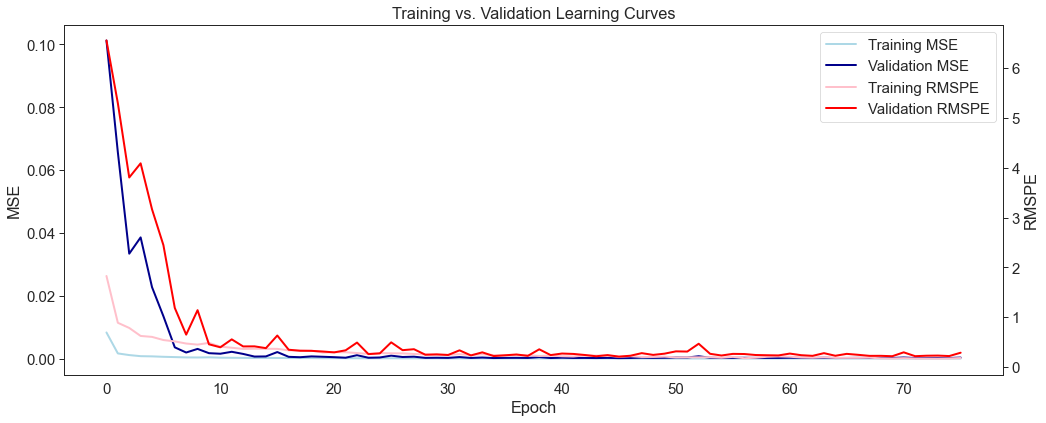

In [295]:
# VISUALIZING LEARNING CURVES
viz_train_val_metrics(lstm_8_res)

In [296]:
# FORECASTING ON VALIDATION SET
lstm_8_preds = forecast_multi(lstm_8, val_idx)

# SCALING OUTPUT TO MINMAXSCALER FITTED TO TRAINING CURRENT VOLUME
lstm_8_preds_scaled = scale(scaler_vol, lstm_8_preds)

12/12 [==============================] - 2s 9ms/step


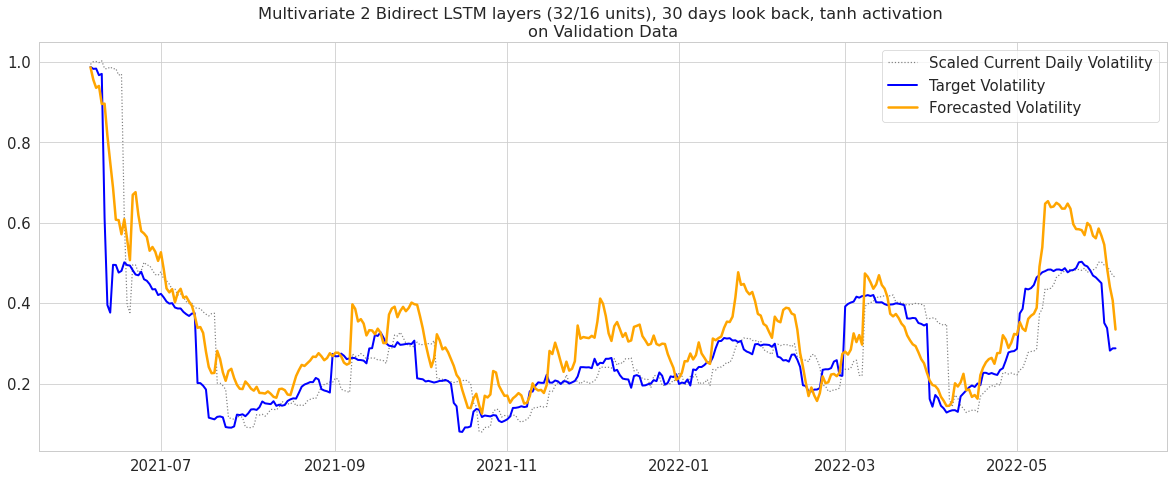

In [297]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, lstm_8_preds_scaled, 
          f"Multivariate 2 Bidirect LSTM layers (32/16 units), {n_past} days look back, tanh activation")
plt.savefig("lstm_8_preds.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=50)
plt.show();

In [298]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, lstm_8_preds_scaled, 
         f"Multivariate 2 Bidirect LSTM layers (32/16 units), n_past={n_past}, batch={batch_size}, tanh")

Model  \
0                                                                   Mean Baseline   
1                                         GARCH (1,1), Constant Mean, Normal Dist   
2                          Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist   
3                                           ARCH(1,1), Constant Mean, Normal Dist   
4                                 ARCH(1,1), Constant Mean, Skewed Student t Dist   
5                                 Bootstrap TARCH(1,1), Constant Mean, Skewt Dist   
6                                Simulation TARCH(1,1), Constant Mean, Skewt Dist   
7                               Analytical EGARCH(1,1), Constant Mean, Skewt Dist   
8                                             ARCH, Constant Mean, Student t Dist   
9                                       ARCH, Constant Mean,Skewed Student t Dist   
10                                      GARCH(1,1), Constant Mean, Student t Dist   
11                        Analytical GJR-GARCH(1,1,1), Constant Mean, Normal Dist   
12                     Analytical GJR-GARCH(1,1,1), Constant Mean, Student t Dist   
13                               Bootstrap TARCH(1,1), Constant Mean, Normal Dist   
14                              Simulation TARCH(1,1), Constant Mean, Normal Dist   
15                              Bootstrap TARCH(1,1), Constant Mean, Student Dist   
16                           Simulation TARCH(1,1), Constant Mean, Student t Dist   
17                                     EGARCH(1,1), Constant Mean, Student t Dist   
18                                        EGARCH(1,1), Constant Mean, Normal Dist   
19                                        EGARCH(1,1), Constant Mean, Normal Dist   
20                                        Simple LR Fully Connected NN, n_past=14   
21                                               LSTM 1 layer 20 units, n_past=14   
22                                2 layers Bidirect LSTM (32/16 units), n_past=30   
23                   1 Conv1D 2 Bidirect LSTM layers (32/16), n_past=60, batch=64   
24                  2 Bidirect LSTMs (32/16), n_past=30, batch=64, SGD lr=5.9e-05   
25                Multivariate Bidirect LSTM 3 layers (64/32/16 units), n_past=30   
26  Multivariate 4 Bidirect LSTM layers (128/64/32/16 units), n_past=30, batch=64   
27   Multivariate 2 Bidirect LSTM layers (32/16 units), n_past=30, batch=32, tanh   

    Validation RMSPE  Validation RMSE  
0           0.659298         0.139745  
1           0.554754         0.183075  
2           0.520993         0.175141  
3           0.554754         0.183075  
4           0.448152         0.180987  
5           0.302612         0.109863  
6           0.303471         0.110372  
7           0.338984         0.126899  
8           0.842267         0.277471  
9           0.840806         0.277167  
10          0.522773         0.174257  
11          0.552331         0.181174  
12          0.519879         0.174726  
13          0.281446         0.103197  
14          0.273308         0.098561  
15          0.301558         0.109637  
16          0.302569         0.110078  
17          0.337235         0.126315  
18          0.328201         0.123151  
19          0.328201         0.123151  
20          0.474939         0.108808  
21          0.399346         0.089397  
22          0.356508         0.077938  
23          0.481367         0.100649  
24          0.417200         0.172704  
25          0.275665         0.068224  
26          0.339234         0.085065  
27          0.401912         0.088503

In [338]:
import pandas as pd
import dataframe_image as dfi

dfi.export(perf_df, 'dataframe3.png')

objc[21593]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5d2b5ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/104.0.5112.79/Libraries/libGLESv2.dylib (0x11dd00590). One of the two will be used. Which one is undefined.
[0818/183455.885512:INFO:headless_shell.cc(660)] Written to file /var/folders/xx/h5xnb_fn2hj7z297mdw669vw0000gn/T/tmplykx27cx/temp.png.
objc[21606]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5d2b5ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/104.0.5112.79/Libraries/libGLESv2.dylib (0x105ec1590). One of the two will be used. Which one is undefined.
[0818/183457.404300:INFO:headless_shell.cc(6

## Final Model

In [339]:
z=perf_df.sort_values(by='Validation RMSPE', ascending=True)

In [340]:
import pandas as pd
import dataframe_image as dfi

dfi.export(z, 'dataframe_c.png')

objc[22345]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5d2b5ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/104.0.5112.79/Libraries/libGLESv2.dylib (0x114c6c590). One of the two will be used. Which one is undefined.
[0818/194132.590662:INFO:headless_shell.cc(660)] Written to file /var/folders/xx/h5xnb_fn2hj7z297mdw669vw0000gn/T/tmpt8q8ptt1/temp.png.
objc[22358]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5d2b5ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/104.0.5112.79/Libraries/libGLESv2.dylib (0x10f5d8590). One of the two will be used. Which one is undefined.
[0818/194133.662788:INFO:headless_shell.cc(6

For the final model, I'll use model #25 (Multivariate Bidirect LSTM 3 layers (64/32/16 units), n_past=30) n_past = 30
batch_size = 64. I'm not choosing model #14 as the difference in Validation RMSPE is quite negligible between both the models but there is a higher difference in Validation RMSE. However, I'll extend the training to include the validation set as well. This is important in time series data since the more recent time steps would most likely carry more relevant information for successful forecasting than data from a year ago.

Since the validation MSE and RMSPE lines have been very unstable, I will extend the training epochs to 500 to seee if that could help capture better weights.

In [324]:
# CREATE DATASET THAT COMBINES BOTH TRAINING & VALIDATION
tv_df = input_df[:split_time_2]
tv_y = df.vol_future[:split_time_2]

In [325]:
tf.keras.backend.clear_session()

# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

n_past = 30
batch_size = 64
n_dims = input_df.shape[1]

mat_X_tv, mat_y_tv = windowed_dataset(tv_df, tv_y, n_past)

# CONSTRUCTING MULTIVARIATE BIDIRECTIONAL LSTM NN
lstm_final = tf.keras.models.Sequential([  
    tf.keras.layers.InputLayer(input_shape=[n_past, n_dims]),   
    # BATCH NORMALIZATION  
    tf.keras.layers.BatchNormalization(), 

    # ADDING 1st LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Dropout(0.1),
    
    # ADDING 2nd LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dropout(0.1),

    # DENSE OUTPUT LAYER
    tf.keras.layers.Dense(1)
])

lstm_final.compile(loss='mse', 
                    optimizer="adam", 
                    metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_final.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

# STOPPING THE TRAINING IF VALIDATION RMSPE IS NOT IMPROVING 
early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_final.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 30, 4)            16        
 ormalization)                                                   
                                                                 
 bidirectional (Bidirectiona  (None, 30, 64)           9472      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

In [326]:
lstm_final_res = lstm_final.fit(mat_X_tv, mat_y_tv, epochs=500,
                                validation_split=0.2,
                                callbacks=[checkpoint_cb, early_stopping_cb],
                                verbose=0, batch_size=batch_size, shuffle=True)

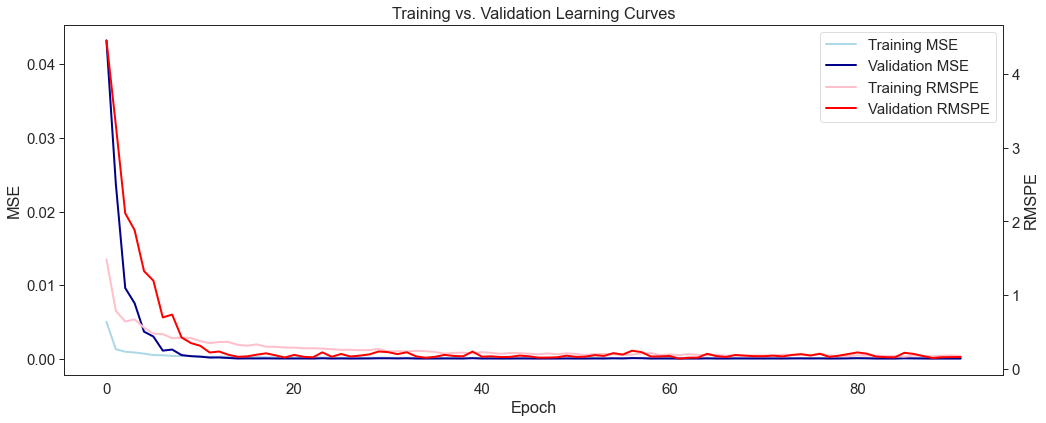

In [303]:
viz_train_val_metrics(lstm_final_res)

In [304]:
## Final Model's Predictions on Test Set

In [305]:
# FORECASTING ON VALIDATION SET
y_test_preds = forecast_multi(lstm_final, test_idx)

1/1 [==============================] - 2s 2s/step


In [306]:
y_test_preds.describe()


count    30.000000
mean      0.060341
std       0.007457
min       0.046136
25%       0.059257
50%       0.062684
75%       0.065319
max       0.069225
dtype: float64

In [307]:
y_test.describe()

count    30.000000
mean      0.062691
std       0.001395
min       0.060949
25%       0.061552
50%       0.062272
75%       0.063684
max       0.066327
Name: vol_future, dtype: float64

In [308]:
# GETTING DAILY VOLATILITY QUANTILES
q1 = df.vol_current[:split_time_2].describe()['25%']

q2 = df.vol_current[:split_time_2].describe()['50%']

q3 = df.vol_current[:split_time_2].describe()['75%']

In [309]:
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates


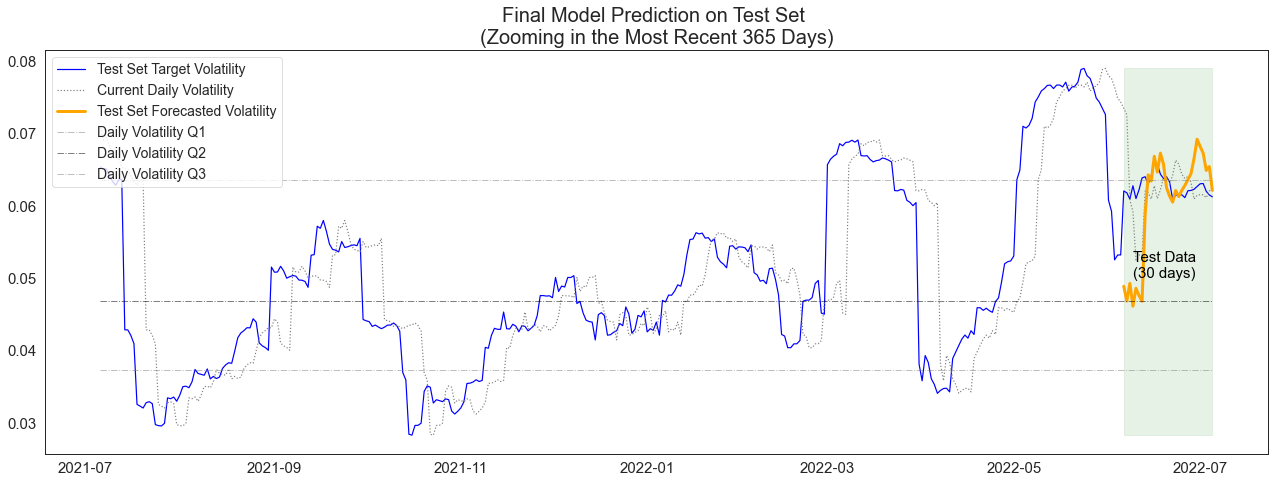

In [310]:
# Ref: https://stackoverflow.com/questions/31162780/how-to-plot-a-rectangle-on-a-datetime-axis-using-matplotlib

# PLOTTING MODEL PREDICTIONS VS. TARGET VALUES
with sns.axes_style("white"):
    fig, ax1 = plt.subplots(figsize=(18,7))
    # ZOOMING IN THE LAST n_display VALUES
    n_display = 365

    ax1.plot(df.vol_future[-n_display:], color='blue', 
                label=f"Test Set Target Volatility")
    ax1.plot(df.vol_current[-n_display:], color='gray',  ls=':',
                label=f"Current Daily Volatility")
    ax1.plot(y_test_preds, color='orange', lw=3,
                label=f'Test Set Forecasted Volatility')
    
    q_colors = ['gray', 'black', 'gray']
    for i, q in enumerate([q1, q2, q3]):
        ax1.hlines(y=q, color=q_colors[i], alpha=0.5, label=f'Daily Volatility Q{i+1}', ls='-.', lw=1,
                    xmin=df.vol_future[-n_display:].index[0],
                    xmax=df.vol_future[-n_display:].index[-1])
        
    # ADD RECTANGLE TO PLOT AS BACKGROUND FOR TEST DATA    
    w = len(test_idx) - 1 
    h = df.vol_future[-n_display:].max() - df.vol_future[-n_display:].min()
    x0 = mdates.date2num(df.index[split_time_2])
    y0 = df.vol_future[-n_display:].min()
    rect = Rectangle((x0, y0), w, h, color ='green', alpha=0.1)
    ax1.add_patch(rect)

    # ADD TEXT
    ax1.text(df.index[(split_time_2 + 3)], 0.05, 
             'Test Data\n(30 days)', 
             fontsize=15, color='black')

    plt.title(f'Final Model Prediction on Test Set \n(Zooming in the Most Recent {n_display} Days)', fontsize=20)
    ax1.legend(loc='upper left', prop={'size': 14})
    plt.tight_layout()
    plt.savefig("final_lstm_test_preds.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=50)
    plt.show();

In [311]:
# GENERATING PREDICTIONS ON THE WHOLE DATASET (7 years)
mat_X_all, _ = windowed_dataset(input_df, df.vol_future, n_past)
preds_all = pd.Series(lstm_final.predict(mat_X_all)[:,0], 
                      index=df.index[-(mat_X_all).shape[0]:])

52/52 [==============================] - 0s 9ms/step


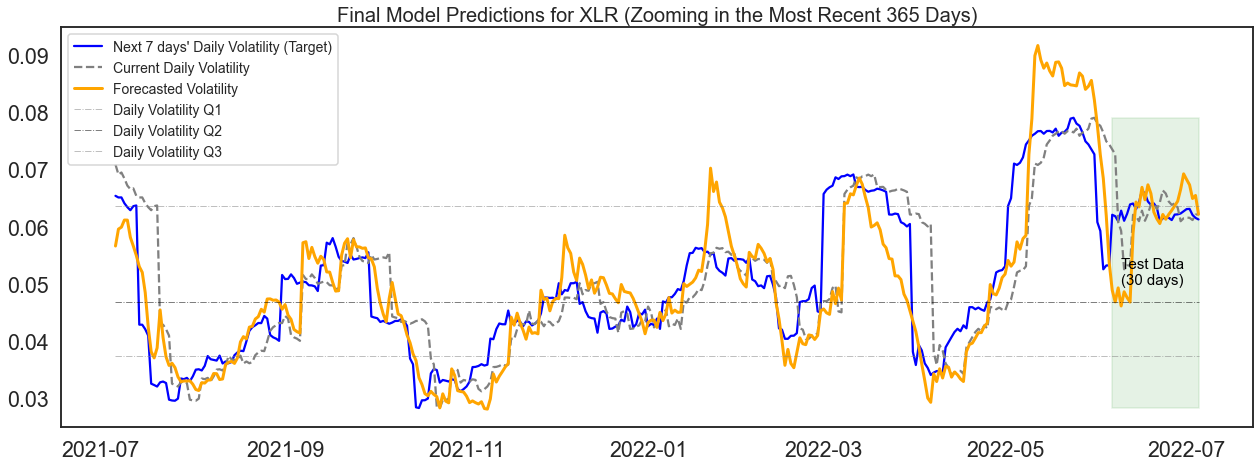

In [341]:
# Ref: https://stackoverflow.com/questions/31162780/how-to-plot-a-rectangle-on-a-datetime-axis-using-matplotlib
# PLOTTING MODEL PREDICTIONS VS. TARGET VALUES
with sns.axes_style("white"):
    fig, ax1 = plt.subplots(figsize=(18,7))
    # ZOOMING IN THE LAST n_display VALUES
    n_display = 365

    ax1.plot(df.vol_future[-n_display:], color='blue', 
                label=f"Next {n_future} days' Daily Volatility (Target)")
    ax1.plot(df.vol_current[-n_display:], color='gray',  ls='--',
                label=f"Current Daily Volatility")
    ax1.plot(preds_all[-n_display:], color='orange', lw=3,
                label=f'Forecasted Volatility')

    q_colors = ['gray', 'black', 'gray']
    for i, q in enumerate([q1, q2, q3]):
        ax1.hlines(y=q,
                   xmin=df.vol_future[-n_display:].index[0],
                   xmax=df.vol_future[-n_display:].index[-1],
                   label=f'Daily Volatility Q{i+1}',
                   ls='-.', lw=1, color=q_colors[i], alpha=0.5)
    
    # ADD RECTANGLE TO PLOT AS BACKGROUND FOR TEST DATA    
    w = len(test_idx) - 1 
    h = df.vol_future[-n_display:].max() - df.vol_future[-n_display:].min()
    x0 = mdates.date2num(df.index[split_time_2])
    y0 = df.vol_future[-n_display:].min()
    rect = Rectangle((x0, y0), w, h, color ='green', alpha=0.1)
    ax1.add_patch(rect)

    # ADD TEXT
    ax1.text(df.index[(split_time_2 + 3)], 0.05, 
             'Test Data\n(30 days)', 
             fontsize=15, color='black')

    plt.title(f'Final Model Predictions for XLR (Zooming in the Most Recent {n_display} Days)', fontsize=20)
    ax1.legend(loc='upper left', prop={'size': 14})
    plt.tight_layout()
    plt.savefig("final_lstm_preds.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=50)

    plt.show();

In [327]:
perf_df.to_pickle("performance_df_monero.pkl")

In [328]:
print('RMSPE on Test Set:', RMSPE(y_test, y_test_preds))

RMSPE on Test Set: 0.11927269213239636


In [329]:
1-RMSPE(y_test, y_test_preds)

0.8807273078676037